In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import glob
%matplotlib qt

In [3]:
images = glob.glob('./camera_cal/calibration*.jpg')
objpoints = []
imgpoints = []

In [4]:
import numpy as np
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [5]:
import cv2

In [6]:
images

['./camera_cal/calibration3.jpg',
 './camera_cal/calibration7.jpg',
 './camera_cal/calibration12.jpg',
 './camera_cal/calibration1.jpg',
 './camera_cal/calibration4.jpg',
 './camera_cal/calibration11.jpg',
 './camera_cal/calibration19.jpg',
 './camera_cal/calibration6.jpg',
 './camera_cal/calibration5.jpg',
 './camera_cal/calibration20.jpg',
 './camera_cal/calibration17.jpg',
 './camera_cal/calibration9.jpg',
 './camera_cal/calibration16.jpg',
 './camera_cal/calibration2.jpg',
 './camera_cal/calibration18.jpg',
 './camera_cal/calibration10.jpg',
 './camera_cal/calibration14.jpg',
 './camera_cal/calibration8.jpg',
 './camera_cal/calibration13.jpg',
 './camera_cal/calibration15.jpg']

In [7]:

for image in images:
    img = mpimg.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        #img = cv2.drawChessboardCorners(img,(9,6),corners,ret)
        
        #plt.imshow(img)
img = mpimg.imread("./camera_cal/calibration15.jpg")
plt.figure()
#plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(dst)

In [9]:
%matplotlib inline

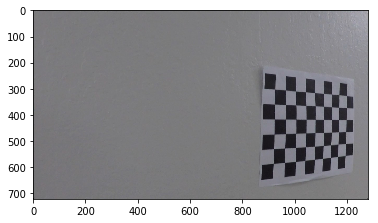

In [10]:
plt.figure()
plt.imshow(img)

In [437]:
test_img = mpimg.imread("./frame6.jpg")
test_dst = cv2.undistort(test_img, mtx, dist, None, mtx)


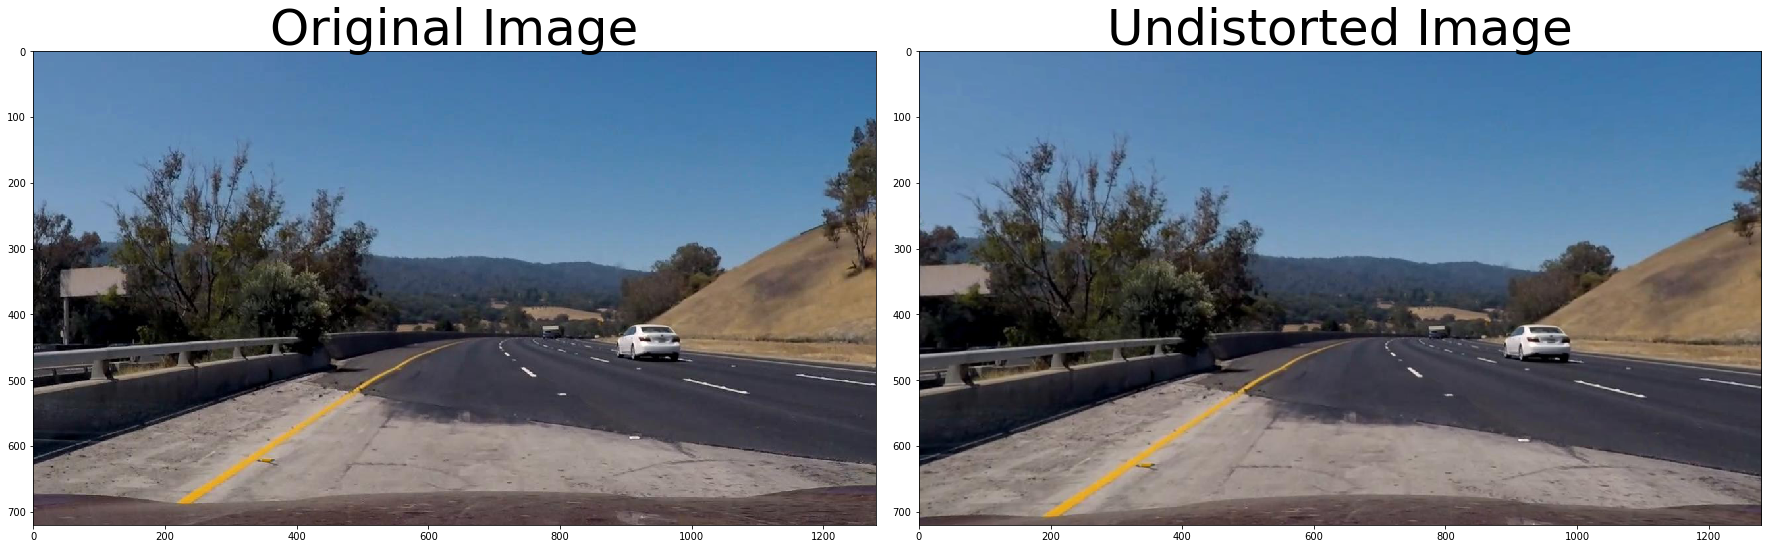

In [438]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(test_dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [443]:
#src = np.float32([[200,700],
#                [500,500],
#                [800,500],
#                [1075,700]])

src = np.float32([[160,700],
                [530,490],
                [780,490],
                [1180,700]])


dst = np.float32([[325,700],
                [325,0],
                [900,0],
                [900,700]])


In [13]:
src[0][0]


200.0

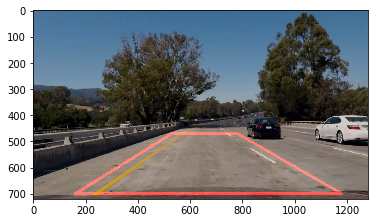

In [382]:
line_image = np.copy(test_dst)*0
cv2.line(line_image,(160,700),(530,470),(255,0,0),10)
#cv2.line(line_image,(src[0]),(src[1]),(255,0,0),10)
cv2.line(line_image,(780,470),(530,470),(255,0,0),10)
#cv2.line(line_image,(800,500),(1075,700),(255,0,0),10)
cv2.line(line_image,(780,470),(1180,700),(255,0,0),10)
#cv2.line(line_image,(200,700),(1075,700),(255,0,0),10)
cv2.line(line_image,(160,700),(1180,700),(255,0,0),10)
test_dst1 = cv2.addWeighted(test_dst, 0.8, line_image, 1, 0)
plt.imshow(test_dst1)

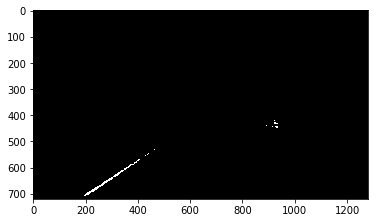

In [440]:
hls = cv2.cvtColor(test_dst,cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(test_dst,cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(test_dst,cv2.COLOR_RGB2HSV)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
V = hsv[:,:,2]
R = test_dst[:,:,0]
G = test_dst[:,:,1]
B = test_dst[:,:,2]
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
s_thresh=(100, 255)
sx_thresh=(20, 100)
v_thresh = (220,255)
r_thresh = (220,255)

#sxbinary = np.zeros_like(scaled_sobel)
#sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(S)
s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1

v_binary = np.zeros_like(V)
v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1

r_binary = np.zeros_like(R)
r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1

# Stack each channel
# Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
# be beneficial to replace this channel with something else.
#color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
#plt.imshow(sxbinary, cmap='gray')

combined_binary = np.zeros_like(s_binary)
combined_binary[(s_binary == 1) & (v_binary == 1) &(r_binary == 1)] = 1
plt.imshow(combined_binary, cmap='gray')

In [16]:
V

array([[196, 195, 195, ..., 192, 192, 192],
       [196, 196, 196, ..., 191, 192, 192],
       [196, 196, 196, ..., 192, 192, 192],
       ..., 
       [ 89,  90,  91, ..., 131, 129, 126],
       [ 93,  93,  93, ..., 124, 125, 124],
       [ 95,  95,  95, ..., 116, 116, 119]], dtype=uint8)

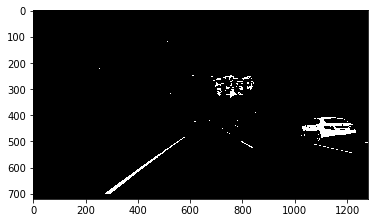

In [158]:
v_thresh = (220,255)
v_binary = np.zeros_like(V)
v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1
plt.imshow(v_binary, cmap='gray')

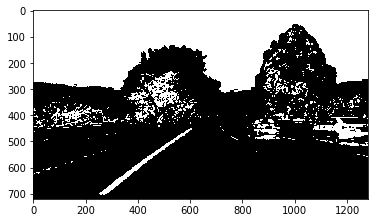

In [327]:
s_thresh = (100,255)
s_binary = np.zeros_like(S)
s_binary[(S>=s_thresh[0]) & (S <= s_thresh[1])] = 1
plt.imshow(s_binary, cmap='gray')

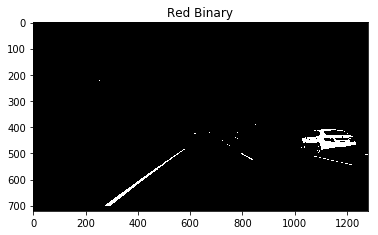

In [160]:
r_thresh = (220,255)
g_thresh = (220,255)
b_thresh = (100,255)
r_binary = np.zeros_like(R)
g_binary = np.zeros_like(G)
b_binary = np.zeros_like(B)

r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1
g_binary[(G>=g_thresh[0]) & (G <= g_thresh[1])] = 1
b_binary[(B>=b_thresh[0]) & (B <= b_thresh[1])] = 1

#fig = plt.figure()
#plt.subplot(121)
plt.imshow(r_binary,cmap='gray')
plt.title('Red Binary')

#plt.subplot(122)




#fig.tight_layout()

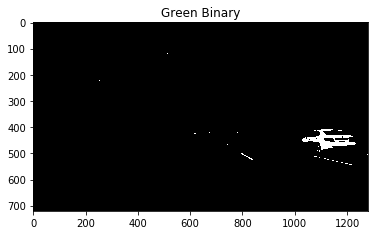

In [100]:
plt.imshow(g_binary,cmap='gray')
plt.title('Green Binary')

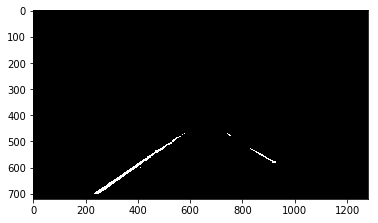

In [384]:
mask = np.zeros_like(combined_binary)
ignore_mask_color = 255
#combined_binary.shape
#cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
#vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
#vertices = np.array([src], dtype=np.int32)
cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
#mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
masked_image = cv2.bitwise_and(combined_binary, mask)
plt.imshow(masked_image, cmap='gray')

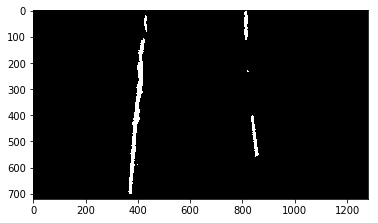

In [385]:
#src = np.float32([[200,700],
#                [550,500],
#                [775,500],
#                [1075,700]])
#dst = np.float32([[325,700],
#                [325,0],
#                [975,0],
#                [975,700]])



M = cv2.getPerspectiveTransform(src, dst)
img_size = (combined_binary.shape[1], combined_binary.shape[0])
warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped, cmap='gray')

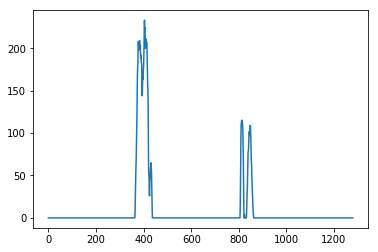

In [386]:
#histogram = np.sum(warped[warped.shape[0]//2:,:],axis=0)
#sample.shape
histogram = np.sum(warped[:,:],axis=0)
plt.plot(histogram)

In [387]:
out_img = np.dstack((warped, warped, warped))*255
#out_img.shape
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint
leftx_base,rightx_base
out_img[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

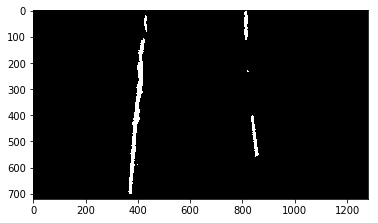

In [388]:
plt.imshow(out_img)

leftfit[0] leftfit[1] leftfit[2] 1.28947283792e-05 -0.097910810995 432.047576527
rightfit[0] rightfit[1] rightfit[2] 0.000104727239009 0.0197847774168 811.952168262


(720, 0)

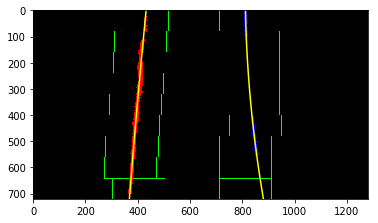

In [389]:
nwindows = 9
window_height = np.int(warped.shape[0]/nwindows)
nonzero = warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
leftx_current = leftx_base
rightx_current = rightx_base
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
left_lane_inds = []
right_lane_inds = []
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = warped.shape[0] - (window+1)*window_height
    win_y_high = warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

print('leftfit[0] leftfit[1] leftfit[2]',left_fit[0],left_fit[1],left_fit[2])
print('rightfit[0] rightfit[1] rightfit[2]',right_fit[0],right_fit[1],right_fit[2])

ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

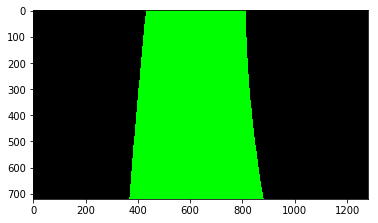

In [390]:
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
plt.imshow(color_warp)
# Warp the blank back to original image space using inverse perspective matrix (Minv)
Minv = cv2.getPerspectiveTransform(dst, src)
newwarp = cv2.warpPerspective(color_warp, Minv, (warped.shape[1], warped.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(test_img, 1, newwarp, 0.3, 0)


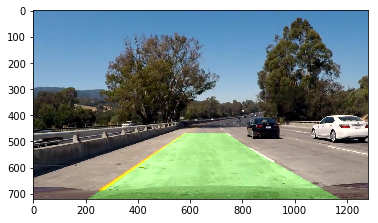

In [391]:
plt.imshow(result)

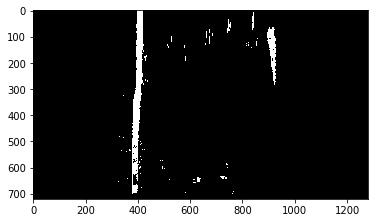

In [22]:
test_img_next = mpimg.imread("./test_images/test4.jpg")
test_dst_next = cv2.undistort(test_img_next, mtx, dist, None, mtx)
hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
s_thresh=(170, 255)
sx_thresh=(20, 100)
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(S)
s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
# Stack each channel
# Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
# be beneficial to replace this channel with something else.
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
#plt.imshow(sxbinary, cmap='gray')

combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
plt.imshow(combined_binary, cmap='gray')

mask = np.zeros_like(combined_binary)
ignore_mask_color = 255
#combined_binary.shape
#cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
#vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
#vertices = np.array([src], dtype=np.int32)
cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
#mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
masked_image = cv2.bitwise_and(combined_binary, mask)
plt.imshow(masked_image, cmap='gray')

M = cv2.getPerspectiveTransform(src, dst)
img_size = (combined_binary.shape[1], combined_binary.shape[0])
binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(binary_warped, cmap='gray')

(720, 0)

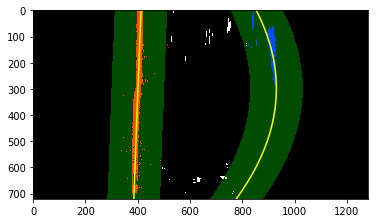

In [23]:
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

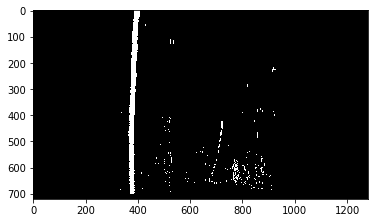

In [24]:
test_img_next = mpimg.imread("./test_images/test1.jpg")
test_dst_next = cv2.undistort(test_img_next, mtx, dist, None, mtx)
hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
s_thresh=(170, 255)
sx_thresh=(20, 100)
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(S)
s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
# Stack each channel
# Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
# be beneficial to replace this channel with something else.
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
#plt.imshow(sxbinary, cmap='gray')

combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
plt.imshow(combined_binary, cmap='gray')

mask = np.zeros_like(combined_binary)
ignore_mask_color = 255
#combined_binary.shape
#cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
#vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
#vertices = np.array([src], dtype=np.int32)
cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
#mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
masked_image = cv2.bitwise_and(combined_binary, mask)
plt.imshow(masked_image, cmap='gray')

M = cv2.getPerspectiveTransform(src, dst)
img_size = (combined_binary.shape[1], combined_binary.shape[0])
binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(binary_warped, cmap='gray')

(720, 0)

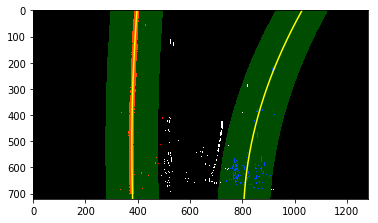

In [25]:
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

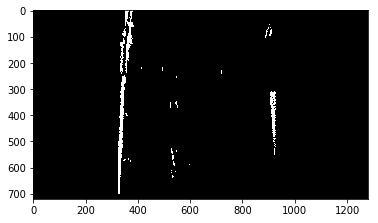

In [26]:
test_img_next = mpimg.imread("./test_images/test5.jpg")
test_dst_next = cv2.undistort(test_img_next, mtx, dist, None, mtx)
hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
s_thresh=(170, 255)
sx_thresh=(20, 100)
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(S)
s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
# Stack each channel
# Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
# be beneficial to replace this channel with something else.
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
#plt.imshow(sxbinary, cmap='gray')

combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
plt.imshow(combined_binary, cmap='gray')

mask = np.zeros_like(combined_binary)
ignore_mask_color = 255
#combined_binary.shape
#cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
#vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
#vertices = np.array([src], dtype=np.int32)
cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
#mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
masked_image = cv2.bitwise_and(combined_binary, mask)
plt.imshow(masked_image, cmap='gray')

M = cv2.getPerspectiveTransform(src, dst)
img_size = (combined_binary.shape[1], combined_binary.shape[0])
binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(binary_warped, cmap='gray')

(720, 0)

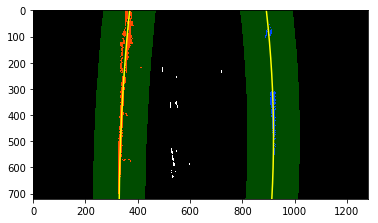

In [27]:
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

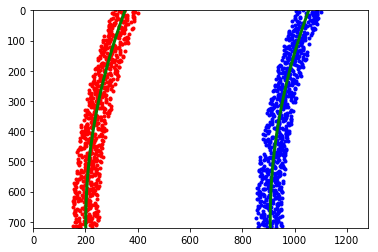

In [28]:
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [29]:
y_eval = np.max(ploty)
y_eval

719.0

In [30]:
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48


1637.92921845 1625.84844086


In [31]:
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')

537.896967248 m 533.785032252 m


In [32]:
Minv = cv2.getPerspectiveTransform(dst, src)



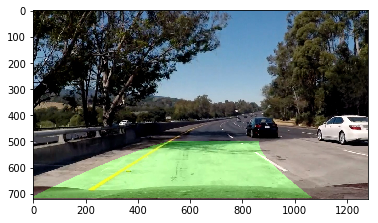

In [33]:
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(test_img_next, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [34]:
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [240]:
def process_image(inputimage):
    #test_img_next = mpimg.imread(inputimage)
    global mtx,dist,src,dst, returned_image
    test_dst_next = cv2.undistort(inputimage, mtx, dist, None, mtx)
    hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
    gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HSV)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    V = hsv[:,:,2]
    R = test_dst_next[:,:,0]
    G = test_dst_next[:,:,1]
    B = test_dst_next[:,:,2]
    
    s_thresh=(170, 255)
    s_binary = np.zeros_like(S)
    s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
    
    v_thresh = (220,255)
    r_thresh = (220,255)
    
    
    v_binary = np.zeros_like(V)
    v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1

    r_binary = np.zeros_like(R)
    r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1
   

    combined_binary = np.zeros_like(s_binary)
    combined_binary[(s_binary == 1) & (v_binary == 1) &(r_binary == 1)] = 1
    
    mask = np.zeros_like(combined_binary)
    ignore_mask_color = 255
    #combined_binary.shape
    #cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
    #vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
    #vertices = np.array([src], dtype=np.int32)
    cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
    #mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
    masked_image = cv2.bitwise_and(combined_binary, mask)
    
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (combined_binary.shape[1], combined_binary.shape[0])
    binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
    
    #nonzero = binary_warped.nonzero()
    #nonzeroy = np.array(nonzero[0])
    #nonzerox = np.array(nonzero[1])
    #margin = 100
    #left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    #right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    histogram = np.sum(binary_warped[:,:],axis=0)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#out_img.shape
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    left_lane_inds = []
    right_lane_inds = []
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
     
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    if (leftx == None or lefty == None or rightx == None or righty == None):
        return returned_image
    if (leftx.size == 0 or lefty.size == 0 or rightx.size == 0 or righty.size == 0):
        return returned_image
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)


    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    y_eval = np.max(ploty)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    curvature_string = 'left_curve =' + str(left_curverad) + ' right_curve =' + str(right_curverad)
    camera_position = inputimage.shape[1]/2
    lane_center = (left_fitx[719] + right_fitx[719])/2.0
    offset = abs(camera_position - lane_center)
    offset_string = 'offset =' + str(offset) 
    print(offset)
    #print (left_fitx[719], right_fitx[719])
    #print (left_fit_cr.shape(),"m")
    Minv = cv2.getPerspectiveTransform(dst, src)
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    #print (pts_left[719], pts_right[719])
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    image_no_text = cv2.addWeighted(inputimage, 1, newwarp, 0.3, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    image_curvature = cv2.putText(image_no_text,curvature_string,(100,40), font, 1, (255,255,255), 2, cv2.LINE_AA)
    result = cv2.putText(image_curvature,offset_string,(100,100), font, 1, (255,255,255), 2, cv2.LINE_AA)
    returned_image = result
    return result


In [ ]:
hls = cv2.cvtColor(test_dst,cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(test_dst,cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(test_dst,cv2.COLOR_RGB2HSV)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
V = hsv[:,:,2]
R = test_dst[:,:,0]
G = test_dst[:,:,1]
B = test_dst[:,:,2]
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
s_thresh=(100, 255)
sx_thresh=(20, 100)
v_thresh = (220,255)
r_thresh = (220,255)

#sxbinary = np.zeros_like(scaled_sobel)
#sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(S)
s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1

v_binary = np.zeros_like(V)
v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1

r_binary = np.zeros_like(R)
r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1

# Stack each channel
# Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
# be beneficial to replace this channel with something else.
#color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
#plt.imshow(sxbinary, cmap='gray')

combined_binary = np.zeros_like(s_binary)
combined_binary[(s_binary == 1) & (v_binary == 1) &(r_binary == 1)] = 1


2728.66886981 m 3628.2958119 m
12.5815178274


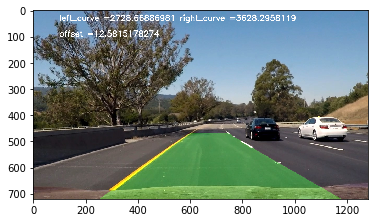

In [261]:
image = mpimg.imread("./test_images/test6.jpg")
color_image = np.copy(image)
returned_image = process_image(color_image)
plt.imshow(returned_image)

First left fit frame. Add it
1090.34460692 m 384.308762548 m
0.132049390346


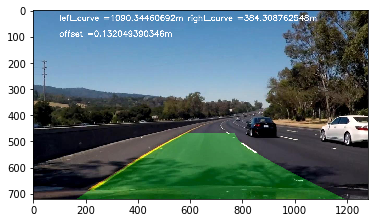

In [397]:
global_leftfit.clear()
global_rightfit.clear()
image = mpimg.imread("./frame7.jpg")
color_image = np.copy(image)
returned_image = process_image_2(color_image)
#process_image_1(color_image)
plt.imshow(returned_image)

In [458]:
global_leftfit.clear()
global_rightfit.clear()
white_output = 'white.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image_2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

First left fit frame. Add it
6767.39947002 m 865.454083597 m
0.0188976668913
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

6767.39947002 m 865.454083597 m
0.0188976668913


  0%|          | 3/1261 [00:00<03:40,  5.69it/s]

5519.75966097 m 1743.93361801 m
0.0404969371601
4198.41294629 m 977.344611648 m
0.0392791567458


  0%|          | 5/1261 [00:00<03:32,  5.92it/s]

3430.29725754 m 987.011167609 m
0.0445643832267
3144.99967986 m 4443.71978172 m
0.0482031389439


  1%|          | 7/1261 [00:01<03:20,  6.27it/s]

3115.16193914 m 5199.73208508 m
0.0512028560551
3439.96302611 m 2810.3889984 m
0.0525714619069


  1%|          | 9/1261 [00:01<03:13,  6.46it/s]

3177.62738659 m 29254.0890607 m
0.0827934207163
3346.74638625 m 67387.0680042 m
0.0805928974261


  1%|          | 11/1261 [00:01<03:10,  6.55it/s]

3572.27294596 m 6396.51951437 m
0.0847754452066
3744.78477447 m 4154.2621808 m
0.0801442048619


  1%|          | 13/1261 [00:02<03:05,  6.73it/s]

3951.38314634 m 6847.53726551 m
0.0729613185576
3830.43673287 m 1616.74643815 m
0.0420761112468


  1%|          | 15/1261 [00:02<03:03,  6.78it/s]

3586.20112918 m 8078.12661561 m
0.061454697058
3345.37297201 m 23557.5926382 m
0.0548825771784


  1%|▏         | 17/1261 [00:02<03:03,  6.76it/s]

3258.63633546 m 4971.15229838 m
0.0467927783839
2957.77678749 m 2882.11238023 m
0.0407281791553


  2%|▏         | 19/1261 [00:02<03:03,  6.76it/s]

2728.10972802 m 3172.96957341 m
0.0381689023727
2779.18274405 m 5731.28272819 m
0.0398988086287


  2%|▏         | 21/1261 [00:03<03:06,  6.66it/s]

2960.52231358 m 6714.61377925 m
0.0387135490929
3923.53803277 m 26871.5642415 m
0.0600061471457


  2%|▏         | 22/1261 [00:03<03:15,  6.33it/s]

5668.02739401 m 4505.57331894 m
0.0666955688886
6455.64590061 m 3753.01883957 m
0.054085404037


  2%|▏         | 25/1261 [00:03<03:15,  6.33it/s]

9233.19592234 m 3046.60026443 m
0.0471030071575
12671.404243 m 4512.20539035 m
0.0313865354294


  2%|▏         | 27/1261 [00:04<03:07,  6.57it/s]

24353.9724986 m 1468.02476708 m
0.00438062365521
277525.367771 m 6059.84838301 m
0.0138513162491


  2%|▏         | 29/1261 [00:04<03:10,  6.46it/s]

510929.680948 m 2736.99244583 m
0.0116386379231
100592.068469 m 3157.38181738 m
0.0124403010886


  2%|▏         | 31/1261 [00:04<03:09,  6.48it/s]

9666.80091502 m 3080.88628362 m
0.0051738180093
5744.20703658 m 2689.61200854 m
0.00386820956608


  3%|▎         | 33/1261 [00:05<03:10,  6.46it/s]

4242.97660336 m 2190.22541723 m
0.000382098214587
4178.44012678 m 4016.48033304 m
0.00635184547497


  3%|▎         | 35/1261 [00:05<03:09,  6.46it/s]

3708.32049826 m 1360458.20028 m
0.0384217757763
4019.87280792 m 19657.2350774 m
0.0362550238348


  3%|▎         | 37/1261 [00:05<03:05,  6.59it/s]

3719.5989881 m 5406.22662543 m
0.0365990778062
4185.34734928 m 15867.7028547 m
0.0293892807978


  3%|▎         | 39/1261 [00:06<03:01,  6.72it/s]

3947.89037714 m 1214.06244406 m
0.00890646018784
4049.5645295 m 1399.5190496 m
0.00117060482203


  3%|▎         | 41/1261 [00:06<03:01,  6.73it/s]

3643.24509027 m 3453.40903479 m
0.0216721411236
3537.32322799 m 9915.25740218 m
0.016501279736


  3%|▎         | 43/1261 [00:06<03:06,  6.52it/s]

3573.15011988 m 3975.95723151 m
0.0189050706504
3293.04861471 m 3514.97547959 m
0.0206584497362


  3%|▎         | 44/1261 [00:06<03:18,  6.12it/s]

3136.07150356 m 2706.67697101 m
0.0199195270177
2870.43761858 m 3105.78772273 m
0.0237066768152


  4%|▎         | 47/1261 [00:07<03:26,  5.87it/s]

2818.43484525 m 46989.6895165 m
0.0647242788553
2696.62138182 m 6588.63696912 m
0.0440142731541


  4%|▍         | 49/1261 [00:07<03:23,  5.95it/s]

2667.80339605 m 11585.7128025 m
0.0463963048103
2863.15155818 m 4994.85573233 m
0.0427155400937


  4%|▍         | 50/1261 [00:07<03:25,  5.89it/s]

2941.26556952 m 629713.9788 m
0.0339682126663
2852.69925372 m 3972.98721642 m
0.0271576376678


  4%|▍         | 53/1261 [00:08<03:30,  5.74it/s]

2912.01321925 m 12532.8338592 m
0.027233533573
2904.52561822 m 4336.79143263 m
0.0295012873696


  4%|▍         | 54/1261 [00:08<03:46,  5.34it/s]

2965.73981152 m 19208.2626274 m
0.0221924526862
2943.03833113 m 2675.2927857 m
0.0205160160933


  4%|▍         | 56/1261 [00:08<03:36,  5.57it/s]

2869.90345023 m 2858.80685467 m
0.0198179390061
3055.3015636 m 3119.05451306 m
0.0212778927338


  5%|▍         | 58/1261 [00:09<03:49,  5.25it/s]

3060.01409731 m 3471.20754232 m
0.0169981608648
3542.58252703 m 7636.8370208 m
0.039812918179


  5%|▍         | 60/1261 [00:09<03:44,  5.35it/s]

4424.231387 m 40588.6393339 m
0.0324874156456
6522.39597465 m 20480.2822363 m
0.0272913768036


  5%|▍         | 63/1261 [00:10<03:39,  5.46it/s]

11053.6907327 m 22729.4832026 m
0.017736589606
14741.8387626 m 1112.12426924 m
0.0230035348129


  5%|▌         | 64/1261 [00:10<03:33,  5.60it/s]

24434.4159944 m 1695.28697521 m
0.0109094836491
29410.6161041 m 6281.35724314 m
0.00895801280635


  5%|▌         | 66/1261 [00:10<04:03,  4.90it/s]

19435.3728439 m 2162.79631345 m
0.0163960675304


  5%|▌         | 67/1261 [00:11<04:10,  4.76it/s]

31861.428604 m 3333.70586461 m
0.0194363915522


  5%|▌         | 68/1261 [00:11<04:13,  4.71it/s]

12797.5845932 m 3992.01969489 m
0.0264781479102


  5%|▌         | 69/1261 [00:11<04:16,  4.64it/s]

5992.67911444 m 9932.5738866 m
0.0312001954139


  6%|▌         | 70/1261 [00:11<04:17,  4.62it/s]

4631.57936937 m 8818.66283922 m
0.0368890529819


  6%|▌         | 71/1261 [00:11<04:17,  4.63it/s]

3632.08537305 m 31502.5826868 m
0.024418606475
2980.15834522 m 7360.76989037 m
0.0264992014968


  6%|▌         | 73/1261 [00:12<03:50,  5.15it/s]

2818.2135157 m 2511.87724631 m
0.0152078836546


  6%|▌         | 74/1261 [00:12<04:10,  4.73it/s]

2795.42343534 m 2532.95051774 m
0.0279971139762


  6%|▌         | 75/1261 [00:12<04:06,  4.80it/s]

2750.27968747 m 7230.19741791 m
0.0415330594365


  6%|▌         | 76/1261 [00:13<04:12,  4.69it/s]

2905.65968761 m 1547.8129518 m
0.0718657640526


  6%|▌         | 77/1261 [00:13<04:14,  4.65it/s]

3273.21238114 m 2696.56239979 m
0.061286143427
3669.79185482 m 10824.1978614 m
0.0522103151288


  6%|▋         | 79/1261 [00:13<03:58,  4.95it/s]

4976.15026392 m 8815.00092982 m
0.055158285258
6276.27975289 m 3709.82343864 m
0.0607516199538


  6%|▋         | 81/1261 [00:14<04:06,  4.80it/s]

11176.2735217 m 5022.594575 m
0.0636499854448
18863.0095391 m 3409.20805271 m
0.0690000864188


  7%|▋         | 84/1261 [00:14<03:40,  5.35it/s]

165022.919413 m 5060.09420393 m
0.0701300168449
111781.396288 m 43023.4011186 m
0.0461502278978


  7%|▋         | 85/1261 [00:14<03:31,  5.56it/s]

305373.840003 m 10845.4794082 m
0.0437967613174
35537.1140263 m 13032.019889 m
0.0597167727195


  7%|▋         | 87/1261 [00:15<03:33,  5.50it/s]

22527.9111059 m 8752.10881417 m
0.0665521035084
13641.1552032 m 1855.52316486 m
0.051488063237


  7%|▋         | 89/1261 [00:15<03:33,  5.48it/s]

10854.3871664 m 2854.43618984 m
0.0921405117364
9555.55732922 m 4221.68836515 m

  7%|▋         | 92/1261 [00:16<03:25,  5.69it/s]


0.080782402417
8833.58315205 m 2471.83408051 m
0.0873740175935
11420.5457805 m 2757.63376786 m
0.0821298702668


  7%|▋         | 93/1261 [00:16<03:28,  5.61it/s]

7016.09549829 m 3012.00516103 m
0.0842048283037
5787.88264413 m 4667.34952298 m
0.0816387919662


  8%|▊         | 95/1261 [00:16<03:35,  5.42it/s]

4569.44454057 m 7962.11828105 m
0.0847574293179
3804.8722412 m 64865.3583898 m
0.077507207544


  8%|▊         | 97/1261 [00:16<03:30,  5.53it/s]

3581.36524318 m 3882.97403611 m
0.0524614945196
3578.53687222 m 3419.31940909 m
0.0576837534421


  8%|▊         | 100/1261 [00:17<03:24,  5.67it/s]

3228.59090734 m 1950.34600535 m
0.0560347451454
3555.14347506 m 4490.95833746 m
0.0693951056443


  8%|▊         | 102/1261 [00:17<03:26,  5.61it/s]

3549.66394065 m 1155.66090514 m
0.113464022023
3958.08627471 m 2005.20518512 m
0.0946279198214


  8%|▊         | 103/1261 [00:18<03:25,  5.62it/s]

4378.97623039 m 52255.5223045 m
0.0779408075338
4890.48920865 m 3913.74544463 m
0.0734092057054


  8%|▊         | 105/1261 [00:18<03:34,  5.38it/s]

6261.79636438 m 3117.86136935 m
0.0659101549771


  8%|▊         | 106/1261 [00:18<03:54,  4.93it/s]

5265.54765455 m 3228.47623603 m
0.0618400540533


  8%|▊         | 107/1261 [00:18<03:58,  4.84it/s]

5619.59015782 m 2949.25545773 m
0.0562703091788
4822.83514647 m 3369.60041431 m
0.0509393867379


  9%|▊         | 109/1261 [00:19<03:53,  4.93it/s]

5030.61750894 m 4248.9421094 m
0.0354914692762


  9%|▊         | 110/1261 [00:19<04:05,  4.70it/s]

4789.17982114 m 5039.08995392 m
0.0260307833873


  9%|▉         | 112/1261 [00:19<03:46,  5.06it/s]

4648.1872324 m 6354.72155251 m
0.0348029012467
5096.46823965 m 25388.1959049 m
0.0211296863629


  9%|▉         | 113/1261 [00:20<03:45,  5.09it/s]

5012.77552603 m 74229.698068 m
0.0201180698934


  9%|▉         | 114/1261 [00:20<03:50,  4.99it/s]

4377.07108107 m 131686.856915 m
0.0188453024842


  9%|▉         | 115/1261 [00:20<03:58,  4.80it/s]

4128.27841778 m 3653.98053284 m
0.0152698855008
4200.26590242 m 5209.70373842 m
0.022740259314


  9%|▉         | 117/1261 [00:20<03:47,  5.04it/s]

4361.56355297 m 12569.6396163 m
0.0238828728944
3973.72831818 m 6151.56422227 m
0.0251473541655


 10%|▉         | 120/1261 [00:21<03:22,  5.64it/s]

3823.14220015 m 3723.28781285 m
0.0243442671398
3507.78198219 m 3330.34231876 m
0.0212619791905


 10%|▉         | 121/1261 [00:21<03:22,  5.63it/s]

3401.65789217 m 3719.84824594 m
0.0183038223249


 10%|▉         | 122/1261 [00:21<03:38,  5.21it/s]

3512.24124388 m 15790.3437123 m
0.0115681243313
3633.03993706 m 75772.555675 m
0.0130774412915


 10%|▉         | 125/1261 [00:22<03:21,  5.65it/s]

3811.97856283 m 4327.24146496 m
0.0172690854593
3846.25835657 m 7885.66759965 m
0.0128587015452


 10%|█         | 127/1261 [00:22<03:16,  5.77it/s]

3969.7713004 m 28468.4384838 m
0.0157070933657
3640.59105998 m 2421.62913384 m
0.000849878430009


 10%|█         | 129/1261 [00:22<03:18,  5.71it/s]

3672.20047871 m 1979.7832698 m
0.0202298424866
3714.33825014 m 4992.65552175 m
0.0126251800117


 10%|█         | 130/1261 [00:23<03:30,  5.38it/s]

3329.0728112 m 2874.32341006 m
0.00955760962532


 10%|█         | 131/1261 [00:23<03:34,  5.27it/s]

3163.21129793 m 2478.07756916 m
0.0112751180663
2970.65776199 m 2591.98625627 m
0.0152699098249


 11%|█         | 133/1261 [00:23<03:37,  5.19it/s]

2853.33259541 m 2710.2195685 m
0.0205915050018
3078.15349081 m 4381.10475016 m
0.0406674742051


 11%|█         | 135/1261 [00:24<03:34,  5.25it/s]

3024.58436107 m 4742.25309834 m
0.0446237722768
3307.78282204 m 3387.63354543 m
0.031736231527


 11%|█         | 137/1261 [00:24<03:29,  5.36it/s]

3766.54089041 m 66664.140285 m
0.0518566620924
3818.13512711 m 5614.39478912 m
0.0466394587486


 11%|█         | 139/1261 [00:24<03:22,  5.54it/s]

4078.99498 m 2569.75997841 m
0.03702262734
5073.80566332 m 3494.83077931 m
0.0541686010713


 11%|█         | 141/1261 [00:25<03:25,  5.45it/s]

7871.5298951 m 5711.30215885 m
0.047638021573
11194.9970393 m 16254.9308817 m
0.0413538325857


 11%|█▏        | 144/1261 [00:25<03:11,  5.82it/s]

7144.53456522 m 4185.63792363 m
0.0351861047863
6374.59417848 m 3336.86559707 m
0.0277535429043


 11%|█▏        | 145/1261 [00:25<03:19,  5.60it/s]

5587.10439809 m 2944.74946959 m
0.0266060844924


 12%|█▏        | 146/1261 [00:26<03:28,  5.34it/s]

4716.1682915 m 2760.96659673 m
0.0240165512971
4163.86213133 m 4401.96306234 m
0.0370672354725


 12%|█▏        | 148/1261 [00:26<03:32,  5.24it/s]

3389.1400837 m 6726.37202456 m
0.0326069057798
3228.12366726 m 7251.73094902 m
0.0457080773915


 12%|█▏        | 150/1261 [00:26<03:52,  4.77it/s]

3323.54481344 m 30091.8499283 m
0.0407406686915
3841.71229608 m 9777.75770244 m
0.0328114559291


 12%|█▏        | 152/1261 [00:27<03:41,  5.02it/s]

4039.9390333 m 4306.93812027 m
0.0244421201801
4212.28084442 m 2351.45256736 m
0.0341167559526


 12%|█▏        | 155/1261 [00:27<03:19,  5.53it/s]

6391.51383358 m 4366.67452744 m
0.0255103003804
8036.79734711 m 3009.83667773 m
0.0233612303549


 12%|█▏        | 156/1261 [00:28<03:12,  5.73it/s]

10445.5585412 m 8175.97784195 m
0.0190723543614
14899.519871 m 5621.12802049 m
0.0140608302377


 13%|█▎        | 158/1261 [00:28<03:12,  5.74it/s]

12286.0534676 m 2998.09940966 m
0.00378613973191
9002.09504002 m 1783.76839689 m
0.0366652689575


 13%|█▎        | 160/1261 [00:28<03:13,  5.69it/s]

7295.97362927 m 1842.93039036 m
0.0221991562612
5546.59159477 m 12427.6899982 m
0.0103933319369


 13%|█▎        | 162/1261 [00:29<03:18,  5.54it/s]

4855.56799847 m 3298.95203607 m
0.0136392065446
4517.91671296 m 9076.21912825 m
0.0021544162522


 13%|█▎        | 164/1261 [00:29<03:23,  5.38it/s]

4211.67571835 m 1688.44693403 m
0.0153683512
4091.63441357 m 3655.11113768 m
0.00923405920902


 13%|█▎        | 167/1261 [00:30<03:07,  5.83it/s]

4419.68084001 m 933.666638177 m
0.0205416372795
4682.52046858 m 1370.26256291 m
0.0134848853237


 13%|█▎        | 168/1261 [00:30<03:16,  5.55it/s]

4590.60562348 m 4230.08521024 m
0.0104137340567
4675.45863457 m 6531.29564128 m
0.0112844232404


 13%|█▎        | 170/1261 [00:30<03:12,  5.67it/s]

4044.26603907 m 5587.94238573 m
0.0178872163409
4207.71046499 m 13699.7169408 m
0.0247417611602


 14%|█▎        | 173/1261 [00:31<03:08,  5.77it/s]

3777.9838259 m 6984.61931875 m
0.0297924074984
3803.09069031 m 5913.00966349 m
0.0162537602516


 14%|█▍        | 175/1261 [00:31<03:02,  5.94it/s]

3710.20323295 m 4293.23299462 m
0.0246900812894
3589.02631873 m 15258.975496 m
0.035805618921


 14%|█▍        | 176/1261 [00:31<03:05,  5.83it/s]

3503.3470327 m 1323641.46872 m
0.0391690175169
3669.22621886 m 5874.09310299 m
0.040032732079


 14%|█▍        | 178/1261 [00:31<03:04,  5.87it/s]

4110.19888932 m 3645.42355922 m
0.0386799280204
5428.89860882 m 86995.7410756 m
0.0387627257211


 14%|█▍        | 180/1261 [00:32<03:09,  5.70it/s]

7377.26681193 m 3327.699051 m
0.036697264416
12591.5402465 m 2909.63042923 m
0.0363427246417


 15%|█▍        | 183/1261 [00:32<03:02,  5.92it/s]

37398.5983944 m 2097.2097442 m
0.0376872468416
30357.6012894 m 2111.72388253 m
0.0362977704457


 15%|█▍        | 185/1261 [00:33<03:02,  5.90it/s]

18498.0498845 m 2691.95642566 m
0.0240751520116
95086.0396742 m 2537.84573302 m
0.0355031757033


 15%|█▍        | 186/1261 [00:33<03:12,  5.59it/s]

7374.75522625 m 4438.4244921 m
0.0315232718258
4443.13467636 m 2523.64423217 m
0.0371475913843


 15%|█▍        | 188/1261 [00:33<03:14,  5.51it/s]

3083.10744449 m 1010.48709165 m
0.0560803673798
2349.50416411 m 1893.40404298 m
0.0401543840883


 15%|█▌        | 190/1261 [00:34<03:16,  5.44it/s]

2220.49710908 m 3276.68306746 m
0.0306267114558
2266.19940444 m 1718.8610764 m
0.0261216022693


 15%|█▌        | 192/1261 [00:34<03:14,  5.49it/s]

2251.03131492 m 2316.98808619 m
0.0193544004674
2644.75488983 m 2444.78137242 m
0.00874196449077


 15%|█▌        | 194/1261 [00:34<03:28,  5.11it/s]

3046.23062358 m 2172.82249273 m
0.00449715085314


 15%|█▌        | 195/1261 [00:35<03:32,  5.01it/s]

3414.72135391 m 2566.10986027 m
0.000957783461346
3678.34190819 m 3134.00313421 m
0.00494495462823


 16%|█▌        | 197/1261 [00:35<03:16,  5.40it/s]

4280.12499719 m 5980.47023543 m
0.0170825814298
4004.12532807 m 9756.90760506 m
0.00830154818108


 16%|█▌        | 200/1261 [00:35<03:09,  5.59it/s]

4747.20503732 m 33393.4065504 m
0.00666336711554
4541.0511429 m 39426.1218929 m
0.00408660552978


 16%|█▌        | 202/1261 [00:36<03:03,  5.76it/s]

4503.18806239 m 2817.02702741 m
0.0140194662947
4213.16654542 m 1337.61002978 m
0.00699463356622


 16%|█▌        | 203/1261 [00:36<03:01,  5.83it/s]

4044.04680019 m 7021.70277673 m
0.0145212615096
3569.04766662 m 2804.32242847 m
0.0216277660877


 16%|█▋        | 205/1261 [00:36<03:04,  5.71it/s]

3358.20096203 m 3781.77443318 m
0.0288628986743
3641.27097085 m 3131.39510316 m
0.0280493468991


 16%|█▋        | 208/1261 [00:37<03:04,  5.71it/s]

3418.88246351 m 2591.34995016 m
0.0278348047266
3681.65260377 m 17720.6274764 m
0.0291327934573


 17%|█▋        | 209/1261 [00:37<03:07,  5.61it/s]

4769.84571203 m 3182.7734458 m
0.0173712230588
6364.02966856 m 7570.80731334 m
0.0065850615515


 17%|█▋        | 212/1261 [00:38<03:04,  5.69it/s]

8234.04488776 m 92726.4420171 m
0.00310618777427
9638.22437456 m 4196.09937764 m
0.0111488130977


 17%|█▋        | 213/1261 [00:38<03:03,  5.72it/s]

10902.4946748 m 6112.17572563 m
0.0107068206385
7055.33691668 m 19338.8051586 m
0.0136105120683


 17%|█▋        | 215/1261 [00:38<03:00,  5.78it/s]

5356.41661249 m 2396.24804832 m
0.020429090078
3696.77476414 m 5102.44360757 m
0.0343740612346


 17%|█▋        | 218/1261 [00:39<03:03,  5.68it/s]

2864.26490781 m 4746.15122924 m
0.0456360616463
2618.02858409 m 3536.99149815 m
0.0526592427818


 17%|█▋        | 219/1261 [00:39<03:00,  5.76it/s]

2439.20994687 m 2552.24479295 m
0.05588659587
2643.16945487 m 2613.34514095 m
0.0548519856852


 18%|█▊        | 222/1261 [00:39<03:00,  5.74it/s]

2855.96494223 m 1723.20906052 m
0.0703087514277
3433.80812459 m 1714.79955129 m
0.0648317488614


 18%|█▊        | 223/1261 [00:39<03:06,  5.57it/s]

3875.8307168 m 3727.83203106 m
0.0440693405437
4525.81238973 m 3238.2724962 m
0.04657601986


 18%|█▊        | 225/1261 [00:40<03:17,  5.25it/s]

4099.27919914 m 3577.35473748 m
0.0429248747235
3970.88316414 m 1025.02432529 m
0.070486280769


 18%|█▊        | 227/1261 [00:40<03:18,  5.20it/s]

3822.21019506 m 5866.13388398 m
0.0575388201138


 18%|█▊        | 229/1261 [00:41<03:08,  5.47it/s]

3858.92650256 m 1962.54793149 m
0.0659160997659
3504.84528582 m 41534.333523 m
0.0717905149151


 18%|█▊        | 230/1261 [00:41<03:08,  5.48it/s]

3794.9590875 m 51973.6623921 m
0.0788234607718
4139.58480598 m 21314.0334744 m
0.0853227171961


 18%|█▊        | 232/1261 [00:41<03:04,  5.58it/s]

5637.61666919 m 6365.21049096 m
0.0940948877606
6444.40898545 m 6438.89525392 m
0.090225888937


 19%|█▊        | 235/1261 [00:42<03:05,  5.54it/s]

8464.6155907 m 9131.99554053 m
0.0884434231895
8585.33766268 m 55579.5303287 m
0.0958005902842


 19%|█▉        | 237/1261 [00:42<03:02,  5.62it/s]

6457.15063969 m 26656.2039498 m
0.100167584581
6664.7976108 m 2495.71733906 m
0.0879640857826


 19%|█▉        | 238/1261 [00:42<02:58,  5.74it/s]

6665.9703667 m 1161.43141309 m
0.137424267098
6621.69300011 m 1361.3532999 m
0.133603017026


 19%|█▉        | 240/1261 [00:43<03:01,  5.63it/s]

8723.91451214 m 2036.81680128 m
0.127053142104
8649.78123303 m 3104.46641981 m
0.128437397796


 19%|█▉        | 242/1261 [00:43<03:02,  5.58it/s]

14283.0516794 m 4396.86873183 m
0.127505414301
12695.8501729 m 3828.05104576 m
0.130598491569


 19%|█▉        | 244/1261 [00:43<03:02,  5.56it/s]

12633.1388991 m 3716.38981383 m
0.136215373576
9859.37732464 m 2651.39104774 m
0.145338784522


 20%|█▉        | 246/1261 [00:44<03:05,  5.48it/s]

7377.15433863 m 3567.94144373 m
0.141171976099
7026.84259562 m 5554.18564732 m
0.139771143924


 20%|█▉        | 248/1261 [00:44<03:04,  5.49it/s]

4763.57219599 m 14444.0882783 m
0.137247297571
4766.29662725 m 1593.36119231 m
0.10431460394


 20%|█▉        | 251/1261 [00:45<02:50,  5.92it/s]

4107.61977515 m 2840.61396499 m
0.147790302373
4794.70728877 m 5540.20647144 m
0.145881539841


 20%|█▉        | 252/1261 [00:45<02:46,  6.05it/s]

7180.65295255 m 5917.95702299 m
0.140024017048
6986.28029898 m 26147.98492 m
0.146734929285


 20%|██        | 254/1261 [00:45<02:48,  5.97it/s]

8066.28725182 m 3363.81838075 m
0.146955243646
5827.94958404 m 3253.58816218 m
0.146744045163


 20%|██        | 256/1261 [00:45<02:58,  5.64it/s]

5061.35889523 m 4063.48619442 m
0.148516492817
3793.35269471 m 3657.2724867 m
0.146453083812


 20%|██        | 258/1261 [00:46<02:58,  5.63it/s]

3442.486977 m 3309.17563928 m
0.147758747602
3290.40005099 m 3337.73565961 m
0.145675027292


 21%|██        | 260/1261 [00:46<02:56,  5.68it/s]

3493.87134506 m 256372.549011 m
0.12838076268
4461.44994275 m 13185.0912166 m
0.119678214146


 21%|██        | 263/1261 [00:47<02:52,  5.77it/s]

5701.02111595 m 3969.58859846 m
0.110665684343
7483.67478479 m 1873.67295709 m
0.138276132109


 21%|██        | 264/1261 [00:47<02:54,  5.70it/s]

10905.5735929 m 7882.12065695 m
0.126966035417
10990.9529829 m 12807.7884314 m
0.127980056516


 21%|██        | 267/1261 [00:47<02:52,  5.78it/s]

8504.24750576 m 4372.02145238 m
0.131280110027
6623.64708234 m 4606.60325942 m
0.129745644668


 21%|██▏       | 268/1261 [00:48<02:53,  5.72it/s]

5265.11340829 m 2980.24357504 m
0.1332520447
4942.05632051 m 2862.06887426 m
0.132907430843


 21%|██▏       | 271/1261 [00:48<02:55,  5.66it/s]

4533.70067249 m 1667.15439565 m
0.15720267742
4759.87046539 m 2558.63417032 m
0.13055208674


 22%|██▏       | 273/1261 [00:48<02:49,  5.83it/s]

4844.4365508 m 3303.16716263 m
0.121263888149
5350.41083286 m 2246.56133256 m
0.122550371413


 22%|██▏       | 274/1261 [00:49<02:45,  5.95it/s]

5440.59711806 m 910.765715345 m
0.134261644521
5507.01430276 m 1876.24221047 m
0.113462066039


 22%|██▏       | 277/1261 [00:49<02:51,  5.73it/s]

5897.64899417 m 6112.07300924 m
0.100864555447
5746.10581442 m 8004.990583 m
0.102061672507


 22%|██▏       | 278/1261 [00:49<02:49,  5.81it/s]

5460.3023215 m 8859.86573018 m
0.101787080464
4631.97151194 m 6075.68619936 m
0.102556123364


 22%|██▏       | 280/1261 [00:50<02:56,  5.54it/s]

4555.93555543 m 3506.13156997 m
0.104145301588
4557.92559979 m 1715.1495748 m
0.139753331731


 22%|██▏       | 282/1261 [00:50<02:47,  5.84it/s]

5281.52143241 m 4319.27813193 m
0.0931554755755
5398.22766838 m 5420.77244334 m
0.0903117513741


 23%|██▎       | 285/1261 [00:51<02:48,  5.81it/s]

5506.13490002 m 6692.62595962 m
0.0860875205147
5661.75009458 m 5679.44469889 m
0.0734677108308


 23%|██▎       | 287/1261 [00:51<02:48,  5.80it/s]

6111.44823585 m 1917.37710587 m
0.0790527767904
6370.24289876 m 3339.04936855 m
0.0711753676772


 23%|██▎       | 288/1261 [00:51<02:46,  5.83it/s]

6338.51827134 m 14476.9701329 m
0.0618698974952
5742.03310651 m 12723.3374125 m
0.0610059714544


 23%|██▎       | 291/1261 [00:52<02:43,  5.92it/s]

6156.10160789 m 5858.08005631 m
0.059548294478
5926.99753575 m 5383.80800287 m
0.0571600704607


 23%|██▎       | 292/1261 [00:52<02:39,  6.08it/s]

6325.88825521 m 6762.76753559 m
0.054405846721
6737.82733404 m 1910.78150688 m
0.0978870196951


 23%|██▎       | 295/1261 [00:52<02:53,  5.57it/s]

6515.09413835 m 4485.85094291 m
0.0468765455318
7053.13859835 m 23128.1389452 m
0.03595446417


 24%|██▎       | 297/1261 [00:53<02:38,  6.07it/s]

7220.97607956 m 7811.10801244 m
0.0330076446723
8584.98930372 m 11958.3865238 m
0.0359112920931


 24%|██▎       | 299/1261 [00:53<02:36,  6.16it/s]

10790.2314903 m 1434.52418475 m
0.0613659626391
13350.2131281 m 4589.65910235 m
0.0447415193296


 24%|██▍       | 300/1261 [00:53<02:41,  5.94it/s]

16559.4998305 m 2786.09490232 m
0.0433078942062
15957.3671897 m 3076.78381791 m
0.0435314589432


 24%|██▍       | 302/1261 [00:53<02:44,  5.84it/s]

18928.6636687 m 7135.83799322 m
0.0431781057793
12717.3062489 m 6103.57853112 m
0.0448193037562


 24%|██▍       | 304/1261 [00:54<02:47,  5.72it/s]

8568.47591411 m 5308.93095382 m
0.0482741686826
7513.74341791 m 2438.99795993 m
0.0700417976741


 24%|██▍       | 306/1261 [00:54<02:48,  5.66it/s]

7439.82762099 m 3019.04724676 m
0.0565987119485
7288.59452312 m 17695.3628618 m
0.0336482836989


 25%|██▍       | 309/1261 [00:55<02:44,  5.78it/s]

7363.96782147 m 28950.9452983 m
0.0333619986644
6596.56082395 m 4387.84793986 m
0.0348047458629


 25%|██▍       | 310/1261 [00:55<02:42,  5.85it/s]

8162.83274494 m 1177.52575047 m
0.0533215167442
11482.5437991 m 6022.60136975 m
0.0327936730149


 25%|██▍       | 312/1261 [00:55<02:38,  6.00it/s]

23928.9046246 m 3990.72245812 m
0.0294527839304
118687.731327 m 8328.49958684 m
0.0291760601933


 25%|██▍       | 315/1261 [00:56<02:42,  5.81it/s]

191028.871325 m 9740.65770739 m
0.029437825442
70094.9292146 m 11167.7445917 m
0.0297727232669


 25%|██▌       | 317/1261 [00:56<02:43,  5.78it/s]

28757.2314949 m 809821.594377 m
0.0301193307832
15835.018028 m 35265.9767666 m
0.0366821715596


 25%|██▌       | 318/1261 [00:56<02:39,  5.90it/s]

10110.0162802 m 13696.0977589 m
0.0238486405346
9431.97681091 m 3004.82184796 m
0.011082626465


 25%|██▌       | 320/1261 [00:57<02:48,  5.60it/s]

9170.28663302 m 2757.93632307 m
0.0177300233671
12731.0529117 m 80718.1219458 m
0.0315714034489


 26%|██▌       | 323/1261 [00:57<02:42,  5.78it/s]

18424.4975143 m 3055.06937449 m
0.0409898208622
40420.9297648 m 43083.5025416 m
0.0299962918111


 26%|██▌       | 325/1261 [00:57<02:41,  5.80it/s]

84166.379796 m 3689.93805803 m
0.0322559353745
32535.625392 m 19247.6162354 m
0.0289328152721


 26%|██▌       | 326/1261 [00:58<02:44,  5.69it/s]

22021.4669413 m 30485.8911054 m
0.0291715533514
18649.4661634 m 18291.7521055 m
0.0302952420177


 26%|██▌       | 328/1261 [00:58<02:47,  5.55it/s]

42238.7678739 m 7119.56814221 m
0.0334536368755
34560.3669754 m 2947.72479724 m
0.060681830801


 26%|██▌       | 330/1261 [00:58<02:41,  5.75it/s]

39782.8827466 m 6285.48551327 m
0.0303408308143
352008.788295 m 4782.07533505 m
0.0101725387248


 26%|██▋       | 333/1261 [00:59<02:42,  5.70it/s]

76821.328476 m 35311.540941 m
0.0257858299505
66492.8313447 m 3975.58267145 m
0.0402887340826


 27%|██▋       | 335/1261 [00:59<02:37,  5.87it/s]

34931.8005859 m 4486.24872991 m
0.0348994976175
24136.286671 m 63114.3234839 m
0.0278537706087


 27%|██▋       | 336/1261 [00:59<02:44,  5.63it/s]

26116.491454 m 8717.5593984 m
0.0256145410247
20585.5776224 m 8619.02015513 m
0.0217632067037


 27%|██▋       | 338/1261 [01:00<02:46,  5.56it/s]

14386.9969552 m 10415.5372507 m
0.021975030971
17271.2578369 m 14499.4571192 m
0.0224068894725


 27%|██▋       | 340/1261 [01:00<02:47,  5.49it/s]

73887.9116474 m 38617.1817369 m
0.0231400852884
53766.9353049 m 16810.4435236 m
0.027206630782


 27%|██▋       | 342/1261 [01:01<02:39,  5.75it/s]

19387.7437499 m 13344.993015 m
0.0136688946221
15709.1711908 m 5629.90069577 m
0.0154185321942


 27%|██▋       | 344/1261 [01:01<02:39,  5.74it/s]

13979.5043427 m 4652.41809032 m
0.0176447343147
14611.7366152 m 6536.55820176 m
0.0163865471761


 27%|██▋       | 346/1261 [01:01<02:46,  5.49it/s]

15821.5870358 m 16703.6698297 m
0.0169298383673
18640.051462 m 1981.64415794 m
0.00854436115487


 28%|██▊       | 348/1261 [01:02<02:49,  5.39it/s]

38851.4260124 m 4246.67589984 m
0.0141385023222


 28%|██▊       | 349/1261 [01:02<02:55,  5.21it/s]

60494.8130325 m 2624.71192525 m
0.013390708276
13733.8740765 m 10068.2571198 m
0.0164491322065


 28%|██▊       | 352/1261 [01:02<02:37,  5.79it/s]

10267.9987519 m 10837.946496 m
0.017104186585
7813.81168231 m 15032.6713276 m
0.0180010602655


 28%|██▊       | 353/1261 [01:02<02:40,  5.67it/s]

8550.76265188 m 352199.805655 m
0.0198368373973
8009.71442675 m 6427.64342414 m
0.00247773031882


 28%|██▊       | 356/1261 [01:03<02:36,  5.78it/s]

11675.0890054 m 2234.08046347 m
0.0158268131972
19332.9479658 m 1677.66768764 m
0.00665008289865


 28%|██▊       | 357/1261 [01:03<02:36,  5.79it/s]

19742.1880373 m 2433.94770737 m
0.0116412587221
87359.3400785 m 18092.3348713 m
0.0299145610903


 28%|██▊       | 359/1261 [01:04<02:33,  5.88it/s]

24112.4717306 m 7822.99539811 m
0.0271162340512
10735.082692 m 42177.350169 m
0.0273186501776


 29%|██▊       | 361/1261 [01:04<02:35,  5.77it/s]

9443.8480835 m 3686.80126523 m
0.0238712573647
7910.38468723 m 10347.1203351 m
0.0266230419347


 29%|██▉       | 364/1261 [01:04<02:35,  5.77it/s]

6486.09738391 m 12651.7169668 m
0.021486839164
6074.76646184 m 9317.66648312 m
0.0193420137928


 29%|██▉       | 365/1261 [01:05<02:35,  5.75it/s]

6342.77381263 m 2027.51142378 m
0.0648793569566
6301.40967839 m 24106.3865924 m
0.00339878825501


 29%|██▉       | 367/1261 [01:05<02:37,  5.67it/s]

8057.3116799 m 2955.10042932 m
0.0190397383127
16671.0351668 m 3078.97206117 m
0.0172412320977


 29%|██▉       | 370/1261 [01:05<02:31,  5.90it/s]

173678.800666 m 2929.69528065 m
0.0166593637407
15456.7125244 m 1393.07365682 m
0.0292073028534


 29%|██▉       | 371/1261 [01:06<02:35,  5.73it/s]

7578.20850484 m 21072.3416762 m
0.00810281888191
4999.62898779 m 21035.9179009 m
0.00943631727151


 30%|██▉       | 373/1261 [01:06<02:36,  5.67it/s]

3734.68018796 m 4756.77391935 m
0.0131338651507
3554.96048371 m 42875.5031199 m
0.0194779527939


 30%|██▉       | 375/1261 [01:06<02:39,  5.54it/s]

3599.18453728 m 1476348.51324 m
0.0251132869101
3776.92328926 m 101287.357197 m
0.0317245087358


 30%|██▉       | 377/1261 [01:07<02:40,  5.52it/s]

4350.272491 m 13722.8874234 m
0.0412568682387
5529.75270379 m 31946.0900771 m
0.0421936474559


 30%|███       | 379/1261 [01:07<02:45,  5.33it/s]

6634.48110391 m 3295.3904552 m
0.0212349660712
7916.67541581 m 2445.14877333 m
0.0179601743457


 30%|███       | 382/1261 [01:08<02:41,  5.44it/s]

9269.19712528 m 5456.56347713 m
0.0312487565251
13051.9840075 m 10771.155969 m
0.0452577285361


 30%|███       | 383/1261 [01:08<02:40,  5.45it/s]

13434.8533743 m 6770.27880387 m
0.0454867837534
20692.0979773 m 2243.57489886 m
0.0478546220519


 31%|███       | 386/1261 [01:08<02:37,  5.56it/s]

41682.0528894 m 7205.02145435 m
0.038635537139
21015.5740051 m 25163.7089557 m
0.0427308506045


 31%|███       | 387/1261 [01:09<02:37,  5.54it/s]

13734.0528091 m 22096.9660803 m
0.0399540323278
8943.88159161 m 10834.7566949 m
0.0392105952858


 31%|███       | 390/1261 [01:09<02:36,  5.57it/s]

6658.0952347 m 23492.0787021 m
0.040569874626
6632.90465157 m 7659.13579762 m
0.0258991710436


 31%|███       | 391/1261 [01:09<02:34,  5.63it/s]

7053.88039814 m 8146.74359849 m
0.0378733427821
8456.43329409 m 4671.12103855 m
0.0334771667448


 31%|███       | 394/1261 [01:10<02:26,  5.90it/s]

11596.4733313 m 4466.93667664 m
0.0313363648416
88763.6506294 m 1811.14744402 m
0.0625945024497


 31%|███▏      | 396/1261 [01:10<02:28,  5.83it/s]

30388.8958256 m 65955.1082824 m
0.0430257841442
12514.2452165 m 8641.10280875 m
0.0462442288799


 31%|███▏      | 397/1261 [01:10<02:34,  5.59it/s]

9452.95790826 m 6037.08152043 m
0.0445925689072
11650.214764 m 10096.412107 m
0.0476460478048


 32%|███▏      | 400/1261 [01:11<02:28,  5.80it/s]

15325.5598022 m 26974.0387993 m
0.0497338508672
56408.1474599 m 18708.6522239 m
0.0525528039449


 32%|███▏      | 402/1261 [01:11<02:23,  5.97it/s]

71947.7244059 m 31890.3383248 m
0.0539667629868
28616.3469187 m 13327.9483171 m
0.0453419719741


 32%|███▏      | 404/1261 [01:12<02:26,  5.85it/s]

15646.3001603 m 2975.82203989 m
0.0344192760545
10323.0139713 m 4295.83575883 m
0.0544345849759


 32%|███▏      | 406/1261 [01:12<02:26,  5.82it/s]

7651.50071653 m 2966.40498818 m
0.0505417585191
7728.31471237 m 5409.98844118 m
0.076658633092


 32%|███▏      | 407/1261 [01:12<02:31,  5.64it/s]

7472.93632029 m 16885.1663384 m
0.0733705535841
11697.0090704 m 5042.45458762 m
0.0706380899444


 32%|███▏      | 409/1261 [01:12<02:31,  5.61it/s]

54620.19576 m 17383.5770676 m
0.0723098815306
93933.5401427 m 152540.6964 m
0.075180416342


 33%|███▎      | 411/1261 [01:13<02:30,  5.64it/s]

29313.3781748 m 82686.7912642 m
0.0777706873031
11731.2440336 m 73301.3483636 m
0.0793128969951


 33%|███▎      | 413/1261 [01:13<02:35,  5.46it/s]

8262.0350197 m 224017.601929 m
0.0832602930346
8854.67493629 m 87037.4169164 m
0.0889888420263


 33%|███▎      | 415/1261 [01:14<02:38,  5.34it/s]

19554.7038859 m 112400.634679 m
0.0946864925674
31665.7443629 m 6283.77351649 m
0.0924291037903


 33%|███▎      | 417/1261 [01:14<02:39,  5.30it/s]

31646.2963463 m 5754.58927158 m
0.0935064047844
30681.2242703 m 1664.42168413 m
0.124644016544


 33%|███▎      | 419/1261 [01:14<02:31,  5.54it/s]

112043.000201 m 10587.2950233 m
0.101468366092
47070.9891703 m 4606.18805937 m
0.101588627458


 33%|███▎      | 422/1261 [01:15<02:29,  5.62it/s]

200027.92391 m 3291.92418006 m
0.104043081755
53336.2066463 m 34256.3687806 m
0.109382947441


 34%|███▎      | 423/1261 [01:15<02:28,  5.63it/s]

28320.7447981 m 599640.368565 m
0.113071016375


 34%|███▎      | 424/1261 [01:15<02:37,  5.30it/s]

22140.7477194 m 379207.32017 m
0.11650185839
18180.88391 m 9387.74366046 m
0.119273622898

 34%|███▎      | 425/1261 [01:15<02:38,  5.28it/s]


13643.9953025 m 81164.3266864 m
0.127211144907


 34%|███▍      | 428/1261 [01:16<02:22,  5.84it/s]

11257.5423975 m 5881.17116228 m
0.113870031086
12540.9209216 m 2358.44622031 m
0.108899556387


 34%|███▍      | 430/1261 [01:16<02:19,  5.94it/s]

17330.1151376 m 5178.72050132 m
0.128531641202
21082.8570762 m 4433.98636956 m
0.12704845973


 34%|███▍      | 432/1261 [01:17<02:16,  6.06it/s]

24444.9364328 m 3310.44636754 m
0.130007590007
30384.9433277 m 1556.38179719 m
0.128999783858


 34%|███▍      | 434/1261 [01:17<02:13,  6.21it/s]

305791.307664 m 2862.14216088 m
0.13627519749
43522.2704348 m 20423.9448335 m
0.140483809752


 35%|███▍      | 436/1261 [01:17<02:17,  6.01it/s]

50943.1349225 m 16752.1832012 m
0.142604677036
35336.1476621 m 30474.6480014 m
0.143778682786


 35%|███▍      | 437/1261 [01:17<02:24,  5.71it/s]

66334.6445947 m 1133.89596808 m
0.0178340474337


 35%|███▍      | 438/1261 [01:18<02:34,  5.31it/s]

102120.881213 m 98603.6374376 m
0.153699486753
59075.9289898 m 4881.64307034 m
0.132131542036


 35%|███▍      | 440/1261 [01:18<02:31,  5.42it/s]

149033.859113 m 3583.87865945 m
0.138492966782
55787.8557686 m 4799.74081275 m
0.141946672164


 35%|███▌      | 442/1261 [01:18<02:27,  5.54it/s]

934364.650703 m 6952.67406758 m
0.155141443292
115142.556444 m 3863.12208436 m
0.14952880673


 35%|███▌      | 444/1261 [01:19<02:24,  5.64it/s]

151095.989739 m 6062.83087007 m
0.155246678043
28767.0329462 m 85472.3953331 m
0.15862548892


 35%|███▌      | 446/1261 [01:19<02:23,  5.68it/s]

23974.2031932 m 15602.4694996 m
0.160939249628
14842.8565466 m 13978.9394548 m
0.162516327359


 36%|███▌      | 448/1261 [01:19<02:25,  5.60it/s]

9517.2206252 m 59345.9220144 m
0.163138244341
8708.00159963 m 3184.02248124 m
0.115994094027


 36%|███▌      | 450/1261 [01:20<02:23,  5.64it/s]

7595.54739728 m 4127.5991619 m
0.142906588238
8416.63928071 m 4882.67629219 m
0.150239590927


 36%|███▌      | 453/1261 [01:20<02:17,  5.88it/s]

9018.0449437 m 4382.7465572 m
0.161053397216
11478.5940041 m 2915.55045072 m
0.156466524261


 36%|███▌      | 455/1261 [01:21<02:15,  5.95it/s]

17029.5814356 m 1576.17612699 m
0.191418521339
49803.5237373 m 2967.45407862 m
0.178142808258


 36%|███▌      | 457/1261 [01:21<02:18,  5.81it/s]

36632.8527718 m 5519.09673546 m
0.166382028819
35347.7741411 m 6604.4223869 m
0.16427113834


 36%|███▋      | 459/1261 [01:21<02:17,  5.81it/s]

46171.9670022 m 15170.0698954 m
0.161977036319
29891.7401985 m 57393.5530805 m
0.159373571357


 36%|███▋      | 460/1261 [01:21<02:16,  5.85it/s]

26879.2637751 m 45520.8033965 m
0.160064643409
17268.672227 m 3509.25206411 m
0.190002241204


 37%|███▋      | 462/1261 [01:22<02:19,  5.71it/s]

11698.6216477 m 15423.790156 m
0.158796026605
12606.3991312 m 4718.53578013 m
0.135065065301


 37%|███▋      | 465/1261 [01:22<02:18,  5.77it/s]

14488.7261582 m 3718.61389004 m
0.143560764637
24713.9832219 m 6175.60675818 m
0.148736819462


 37%|███▋      | 466/1261 [01:23<02:17,  5.78it/s]

52349.179025 m 4154.55870352 m
0.162800291679
275756.00917 m 21940.6945866 m
0.159086401806


 37%|███▋      | 469/1261 [01:23<02:15,  5.83it/s]

43761.7790796 m 20507.3008561 m
0.15506027882
114306.213594 m 18887.13232 m
0.153538783574


 37%|███▋      | 470/1261 [01:23<02:26,  5.39it/s]

46706.1432298 m 18067.2043448 m
0.154562016287
32184.4891473 m 62020.9760925 m
0.153171787771


 37%|███▋      | 472/1261 [01:24<02:22,  5.53it/s]

22523.452497 m 22817.9880298 m
0.153455815039
14722.1050558 m 9072.12090093 m
0.170069068711


 38%|███▊      | 474/1261 [01:24<02:21,  5.56it/s]

9888.60035835 m 11040.9614254 m
0.164260108465
7284.45250207 m 3897.86536568 m
0.13830136366


 38%|███▊      | 476/1261 [01:24<02:26,  5.35it/s]

7461.93190537 m 10240.1961517 m
0.151299271505


 38%|███▊      | 477/1261 [01:25<02:30,  5.21it/s]

7395.57706972 m 4777.59163036 m
0.140963860922


 38%|███▊      | 478/1261 [01:25<02:35,  5.02it/s]

8348.76191189 m 3852.9758026 m
0.154201944606
8847.17443052 m 21660.5058862 m
0.144390643453


 38%|███▊      | 481/1261 [01:25<02:21,  5.50it/s]

13665.861338 m 12080.7400741 m
0.140317175954
28951.767162 m 6867.94711874 m
0.138085198823


 38%|███▊      | 482/1261 [01:26<02:25,  5.36it/s]

223937.898689 m 15502.6555848 m
0.138147807537
30057.5542381 m 39524.4524263 m
0.139252307719


 38%|███▊      | 485/1261 [01:26<02:20,  5.53it/s]

14765.9813536 m 20827.9014443 m
0.139627549961
9186.70970601 m 3406.53052352 m
0.168769344658


 39%|███▊      | 486/1261 [01:26<02:17,  5.64it/s]

10096.7170349 m 20820.2352048 m
0.120951755849
9701.68144713 m 15146.8839484 m
0.130182752421


 39%|███▊      | 488/1261 [01:27<02:17,  5.61it/s]

11394.1300612 m 6821.28003007 m
0.126940676453
35172.4128189 m 29130.8578338 m
0.133041568285


 39%|███▉      | 490/1261 [01:27<02:39,  4.82it/s]

121174.364113 m 1036.18358281 m
0.16656771241


 39%|███▉      | 491/1261 [01:27<02:42,  4.74it/s]

26684.2321338 m 3107.03558034 m
0.141054330134


 39%|███▉      | 492/1261 [01:27<02:43,  4.70it/s]

31198.7687065 m 3076.07558549 m
0.136075451475
49489.4324797 m 2618.78910522 m
0.133808685639


 39%|███▉      | 494/1261 [01:28<02:36,  4.89it/s]

282704.745837 m 39146.6946568 m
0.131189985977
45803.2164971 m 11324.906346 m
0.129643983842


 39%|███▉      | 496/1261 [01:28<02:31,  5.05it/s]

23754.5328519 m 10481.4296338 m
0.132636155236
34536.453601 m 3297.25911769 m
0.165340917463


 39%|███▉      | 498/1261 [01:29<02:30,  5.07it/s]

35045.2332222 m 3140.60285921 m
0.155888453275


 40%|███▉      | 500/1261 [01:29<02:25,  5.22it/s]

59882.5804895 m 13754.8666027 m
0.138648623401
116349.508019 m 5779.57197661 m
0.14373098622


 40%|███▉      | 501/1261 [01:29<02:22,  5.34it/s]

785963.804768 m 1522.44907631 m
0.0920482756293


 40%|███▉      | 502/1261 [01:29<02:35,  4.89it/s]

35457.7161332 m 2251.64424231 m
0.137645616639
221297.817699 m 98662.8518764 m
0.118774945349


 40%|████      | 505/1261 [01:30<02:20,  5.36it/s]

23763.6073488 m 3017.30640149 m
0.118918293407
28692.9222083 m 8452.4665564 m
0.1161768787


 40%|████      | 506/1261 [01:30<02:21,  5.34it/s]

22732.6652775 m 22219.7438267 m
0.115785267315


 40%|████      | 507/1261 [01:30<02:28,  5.08it/s]

32720.1699579 m 50744.6820393 m
0.116653538246


 40%|████      | 508/1261 [01:31<02:35,  4.83it/s]

37383.4297604 m 66498.5710893 m
0.118514299956
121033.195477 m 23383.2846639 m
0.129940970448


 40%|████      | 510/1261 [01:31<02:25,  5.17it/s]

62537.0484955 m 2907.90970459 m
0.0814235543481
1835645.82769 m 2879.80608527 m
0.0963801083595


 41%|████      | 512/1261 [01:31<02:22,  5.25it/s]

99762.5214585 m 3061.48901374 m
0.108059672942


 41%|████      | 513/1261 [01:32<02:24,  5.16it/s]

333098.689552 m 2414.98508389 m
0.110562676768
95482.4898465 m 2591.34264641 m
0.14213934931


 41%|████      | 516/1261 [01:32<02:15,  5.50it/s]

13219.6860074 m 8167.43010539 m
0.13514720325
20938.3158779 m 7697.94354656 m
0.129938530662


 41%|████      | 517/1261 [01:32<02:15,  5.51it/s]

17934.1120357 m 10145.5872318 m
0.131406421198
20073.7506557 m 44922.6822769 m
0.13198876381


 41%|████      | 519/1261 [01:33<02:30,  4.93it/s]

32826.8556728 m 32747.240682 m
0.129609564034


 41%|████      | 520/1261 [01:33<02:31,  4.88it/s]

77206.944212 m 7784.71126218 m
0.129187744751
16082.9270366 m 3488.75708502 m
0.155716504321


 41%|████▏     | 522/1261 [01:33<02:22,  5.17it/s]

10378.734014 m 16248.4609962 m
0.111093553742


 41%|████▏     | 523/1261 [01:34<02:27,  4.99it/s]

9709.51113916 m 17099.9477154 m
0.104994384418


 42%|████▏     | 524/1261 [01:34<02:46,  4.42it/s]

14973.6514548 m 8722.39419086 m
0.108784521481


 42%|████▏     | 525/1261 [01:34<02:48,  4.36it/s]

225551.307118 m 17409.1597273 m
0.117991953569


 42%|████▏     | 526/1261 [01:34<02:51,  4.29it/s]

52931.134357 m 1621.62677706 m
0.143777373237


 42%|████▏     | 527/1261 [01:35<02:54,  4.20it/s]

73724.3774946 m 22025.3376658 m
0.128380972565
59809.6863168 m 7060.05783149 m
0.124399700877


 42%|████▏     | 529/1261 [01:35<02:36,  4.69it/s]

13616.581472 m 3495.06540872 m
0.122145960979
37572.3768401 m 51416.6387306 m
0.126684887665


 42%|████▏     | 531/1261 [01:35<02:26,  4.97it/s]

20961.6843725 m 28447.8277787 m
0.127441720615
21224.2146533 m 7960.07270825 m
0.128022460053


 42%|████▏     | 533/1261 [01:36<02:22,  5.12it/s]

28662.7751958 m 1186.05235428 m
0.228156656772


 42%|████▏     | 534/1261 [01:36<02:26,  4.95it/s]

24197.9591187 m 106460.110249 m
0.109209592455
16199.9198276 m 3423.70933677 m
0.13645766093


 43%|████▎     | 536/1261 [01:36<02:21,  5.13it/s]

19403.4065998 m 11573.8042767 m
0.106737156605
22069.1109431 m 8533.09776395 m
0.100915501925


 43%|████▎     | 538/1261 [01:37<02:15,  5.33it/s]

39064.9885884 m 2549.82770679 m
0.0869121382022
246827.792845 m 7182.78961458 m
0.0994172671873


 43%|████▎     | 541/1261 [01:37<02:14,  5.37it/s]

10503.3114028 m 18378.6438873 m
0.103666682021
14220.7652028 m 94597.3203005 m
0.105080679336


 43%|████▎     | 542/1261 [01:37<02:20,  5.13it/s]

47489.2665398 m 117230.645354 m
0.112417528391
19468.4194061 m 25314.4616573 m
0.114288390388


 43%|████▎     | 544/1261 [01:38<02:10,  5.49it/s]

50615.0572245 m 21716.7211847 m
0.113487084783
29340.1861562 m 10203.7579035 m
0.108012153562


 43%|████▎     | 547/1261 [01:38<02:08,  5.54it/s]

29826.5086697 m 4647.14466817 m
0.105127795228
307599.791704 m 3340.86039062 m
0.0933233053433


 43%|████▎     | 548/1261 [01:39<02:28,  4.81it/s]

15329.4884639 m 2732.21520532 m
0.0975022205134


 44%|████▎     | 549/1261 [01:39<02:38,  4.49it/s]

17594.5418977 m 2910.82372877 m
0.104409923893


 44%|████▎     | 550/1261 [01:39<02:45,  4.31it/s]

14357.9497435 m 5694.53310794 m
0.109709187277


 44%|████▎     | 551/1261 [01:39<02:42,  4.36it/s]

6998.76351258 m 7557.78974171 m
0.115975510294


 44%|████▍     | 552/1261 [01:40<02:47,  4.24it/s]

4156.90102376 m 25879.6553426 m
0.119254836431


 44%|████▍     | 553/1261 [01:40<03:01,  3.90it/s]

8508.04334471 m 43440.3261168 m
0.113370454722


 44%|████▍     | 554/1261 [01:40<02:56,  4.00it/s]

7376.39786364 m 25893.0358872 m
0.115225059058


 44%|████▍     | 555/1261 [01:40<03:00,  3.91it/s]

12695.8701679 m 24443.8465495 m
0.110771294072


 44%|████▍     | 556/1261 [01:41<03:05,  3.80it/s]

25411.7226588 m 6084.41987383 m
0.0959552982766


 44%|████▍     | 557/1261 [01:41<03:09,  3.72it/s]

9789.99817718 m 25801.4213356 m
0.104426213348


 44%|████▍     | 558/1261 [01:41<03:07,  3.75it/s]

8927.94362095 m 1277.40098188 m
0.0802825066596


 44%|████▍     | 559/1261 [01:41<03:09,  3.71it/s]

9489.12723456 m 1229.67216812 m
0.0842140047696


 44%|████▍     | 560/1261 [01:42<03:09,  3.70it/s]

4496.32103793 m 1199.37121104 m
0.075940787246


 44%|████▍     | 561/1261 [01:42<03:12,  3.63it/s]

3375.9891914 m 2012.56699318 m
0.0962201943826


 45%|████▍     | 562/1261 [01:42<03:16,  3.55it/s]

2530.88144581 m 4246.419211 m
0.0988115964117


 45%|████▍     | 563/1261 [01:43<03:41,  3.15it/s]

23382.1460858 m 4444.96179801 m
0.115546428948


 45%|████▍     | 564/1261 [01:43<03:38,  3.19it/s]

16366.2231728 m 9749.07393185 m
0.118496399184


 45%|████▍     | 565/1261 [01:43<03:30,  3.31it/s]

10298.6240211 m 37643.1871192 m
0.119955950168


 45%|████▍     | 566/1261 [01:44<03:22,  3.43it/s]

6520.64098828 m 2683.61503032 m
0.0961753563192


 45%|████▍     | 567/1261 [01:44<03:20,  3.46it/s]

46880.2779848 m 4139.47995842 m
0.109723627984


 45%|████▌     | 568/1261 [01:44<03:17,  3.50it/s]

108979.625198 m 4265.71536532 m
0.110993347784


 45%|████▌     | 569/1261 [01:44<03:25,  3.36it/s]

124997.026079 m 2053.38932911 m
0.0892458681316


 45%|████▌     | 570/1261 [01:45<03:23,  3.40it/s]

41594.4112772 m 4144.05990584 m
0.0964832938003


 45%|████▌     | 571/1261 [01:45<03:16,  3.51it/s]

31969.8177262 m 1557.04805047 m
0.098721406852


 45%|████▌     | 572/1261 [01:45<03:16,  3.50it/s]

62805.398021 m 7996.84454087 m
0.10729758004


 45%|████▌     | 573/1261 [01:46<03:18,  3.46it/s]

51591.3147406 m 1547.14182022 m
0.108193763699


 46%|████▌     | 574/1261 [01:46<03:08,  3.64it/s]

67387.3809378 m 25017.245613 m
0.10329014228


 46%|████▌     | 575/1261 [01:46<03:19,  3.44it/s]

8232.44970905 m 3455.47660015 m
0.109425207389


 46%|████▌     | 576/1261 [01:46<03:13,  3.54it/s]

42522.3145349 m 12512.4534534 m
0.101478106615


 46%|████▌     | 577/1261 [01:47<03:15,  3.50it/s]

46305.8979719 m 5569.98080357 m
0.107504075041


 46%|████▌     | 578/1261 [01:47<03:15,  3.49it/s]

58828.3195996 m 6461.76766591 m
0.103896167743


 46%|████▌     | 579/1261 [01:47<03:08,  3.61it/s]

46498.1206 m 25063.4328639 m
0.0944208857714


 46%|████▌     | 580/1261 [01:48<03:18,  3.43it/s]

15437.7398143 m 7664.31241957 m
0.0915269268139


 46%|████▌     | 581/1261 [01:48<03:11,  3.55it/s]

8659.40301358 m 3992.45026375 m
0.070937963391


 46%|████▌     | 582/1261 [01:48<03:06,  3.64it/s]

12708.4910044 m 3453.08058293 m
0.0831495499648


 46%|████▌     | 583/1261 [01:48<03:01,  3.74it/s]

10811.6375123 m 933.24231152 m
0.076699061898


 46%|████▋     | 584/1261 [01:49<02:53,  3.90it/s]

25380.4552849 m 946.278636171 m
0.0900329054125


 46%|████▋     | 585/1261 [01:49<02:56,  3.84it/s]

20136.2129241 m 955.768083935 m
0.104301204533


 46%|████▋     | 586/1261 [01:49<02:58,  3.79it/s]

101329.210455 m 3967.54576487 m
0.104062911438


 47%|████▋     | 587/1261 [01:49<02:48,  4.00it/s]

11153.6870435 m 1507.05544756 m
0.110347307891


 47%|████▋     | 588/1261 [01:50<02:57,  3.79it/s]

14351.51058 m 6354.12658708 m
0.101818702248


 47%|████▋     | 589/1261 [01:50<02:45,  4.07it/s]

10069.839944 m 1037.77566001 m
0.0481164928734


 47%|████▋     | 590/1261 [01:50<02:47,  4.00it/s]

5019.93637636 m 938.002922979 m
0.0588265657719


 47%|████▋     | 591/1261 [01:50<02:49,  3.96it/s]

20002.2834275 m 11261.5962652 m
0.104676090054


 47%|████▋     | 592/1261 [01:51<02:49,  3.95it/s]

39390.4689467 m 2728.62263503 m
0.109618332439


 47%|████▋     | 593/1261 [01:51<02:48,  3.96it/s]

10873.1438672 m 910.36599363 m
0.176133451831


 47%|████▋     | 594/1261 [01:51<02:43,  4.08it/s]

7811.19169131 m 3155.44061924 m
0.145971941382


 47%|████▋     | 595/1261 [01:51<02:49,  3.94it/s]

5924.22564383 m 1650.60359863 m
0.128700140065


 47%|████▋     | 596/1261 [01:52<02:51,  3.88it/s]

10806.1434713 m 4551.51775298 m
0.134679531854


 47%|████▋     | 597/1261 [01:52<02:54,  3.80it/s]

12705.5204661 m 1162.36390573 m
0.140344373559


 47%|████▋     | 598/1261 [01:52<03:01,  3.65it/s]

30889.6219523 m 2828.60946605 m
0.14250856034


 48%|████▊     | 599/1261 [01:53<03:09,  3.49it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 600/1261 [01:53<03:09,  3.49it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 601/1261 [01:53<03:14,  3.40it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 602/1261 [01:53<03:10,  3.46it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 603/1261 [01:54<03:04,  3.57it/s]

159848.923635 m 212.638746673 m
0.265804361727


 48%|████▊     | 604/1261 [01:54<02:59,  3.65it/s]

13862.6121289 m 3833.79251996 m
0.162132984417


 48%|████▊     | 605/1261 [01:54<03:01,  3.62it/s]

25232.3697852 m 771.810125566 m
0.103279895887


 48%|████▊     | 606/1261 [01:54<03:01,  3.61it/s]

16889.0637787 m 227.609004331 m
0.0711656649097


 48%|████▊     | 607/1261 [01:55<02:57,  3.68it/s]

9972.51907967 m 571.620198411 m
0.155791069504


 48%|████▊     | 608/1261 [01:55<02:47,  3.91it/s]

6062.01059164 m 8387.15459684 m
0.179233223145


 48%|████▊     | 609/1261 [01:55<02:54,  3.74it/s]

3875.47197032 m 2556.25928021 m
0.186695642196


 48%|████▊     | 610/1261 [01:56<02:49,  3.84it/s]

Above Threshold
90937.8278565 m 17770.6421345 m
0.147115684221


 48%|████▊     | 611/1261 [01:56<02:57,  3.67it/s]

Above Threshold
90937.8278565 m 17770.6421345 m
0.147115684221


 49%|████▊     | 612/1261 [01:56<02:55,  3.69it/s]

3774.01306283 m 1.07667926782e+12 m
0.220250957938


 49%|████▊     | 613/1261 [01:56<02:53,  3.74it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▊     | 614/1261 [01:57<03:03,  3.52it/s]

Above Threshold
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 615/1261 [01:57<03:00,  3.59it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 616/1261 [01:57<02:57,  3.64it/s]

Above Threshold
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 617/1261 [01:57<03:01,  3.55it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 618/1261 [01:58<03:01,  3.55it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 619/1261 [01:58<02:58,  3.60it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 620/1261 [01:58<03:00,  3.56it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 621/1261 [01:59<02:49,  3.79it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 622/1261 [01:59<02:56,  3.62it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 623/1261 [01:59<02:49,  3.77it/s]

sizes are None
39482.3010925 m 19860.2453086 m
0.154820675413


 49%|████▉     | 624/1261 [01:59<02:54,  3.65it/s]

Above Threshold
39482.3010925 m 19860.2453086 m
0.154820675413


 50%|████▉     | 625/1261 [02:00<02:48,  3.77it/s]

Above Threshold
39482.3010925 m 19860.2453086 m
0.154820675413


 50%|████▉     | 626/1261 [02:00<02:48,  3.78it/s]

Above Threshold
39482.3010925 m 19860.2453086 m
0.154820675413


 50%|████▉     | 627/1261 [02:00<02:56,  3.60it/s]

4988.67246562 m 499.193678263 m
0.188048210806


 50%|████▉     | 628/1261 [02:00<02:52,  3.68it/s]

Above Threshold
97348.5664783 m 9290.82720698 m
0.160049333971


 50%|████▉     | 629/1261 [02:01<02:52,  3.66it/s]

sizes are None
97348.5664783 m 9290.82720698 m
0.160049333971


 50%|████▉     | 630/1261 [02:01<02:48,  3.74it/s]

Above Threshold
97348.5664783 m 9290.82720698 m
0.160049333971


 50%|█████     | 631/1261 [02:01<02:43,  3.85it/s]

2792.33255598 m 517.57562119 m
0.00538385833894


 50%|█████     | 632/1261 [02:01<02:34,  4.07it/s]

3024.65606446 m 11512.108091 m
0.261614564133


 50%|█████     | 633/1261 [02:02<02:30,  4.17it/s]

3993.33402306 m 483.831687377 m
0.0689079834349
5985.28767722

 50%|█████     | 634/1261 [02:02<02:26,  4.27it/s]

 m 2688.7533292 m
0.139035152941


 50%|█████     | 635/1261 [02:02<02:20,  4.45it/s]

Above Threshold
10464.2820491 m 4593.64572942 m
0.151961919107


 50%|█████     | 636/1261 [02:02<02:23,  4.36it/s]

4444.19754398 m 2185.01402093 m
0.19350340474


 51%|█████     | 637/1261 [02:03<02:32,  4.08it/s]

3244.78908344 m 931.580948075 m
0.169300484932


 51%|█████     | 638/1261 [02:03<02:37,  3.96it/s]

3422.37603148 m 311.873843421 m
0.160802298651


 51%|█████     | 639/1261 [02:03<02:36,  3.97it/s]

Above Threshold
6345.9691739 m 1075.63618623 m
0.150291845286


 51%|█████     | 640/1261 [02:03<02:40,  3.87it/s]

Above Threshold
6345.9691739 m 1075.63618623 m
0.150291845286


 51%|█████     | 641/1261 [02:04<02:43,  3.79it/s]

Above Threshold
6345.9691739 m 1075.63618623 m
0.150291845286


 51%|█████     | 642/1261 [02:04<02:37,  3.92it/s]

5907.70359043 m 3525.32435789 m
0.182451907017


 51%|█████     | 643/1261 [02:04<02:31,  4.09it/s]

6410.14104449 m 4280.0049578 m
0.155579921311


 51%|█████     | 644/1261 [02:04<02:29,  4.12it/s]

5394.43754561 m 1489.41961302 m
0.119780379036


 51%|█████     | 645/1261 [02:05<02:26,  4.21it/s]

5278.22175585 m 2000.29334988 m
0.118805029376


 51%|█████     | 646/1261 [02:05<02:20,  4.38it/s]

4403.0778942 m 8281.69258331 m
0.120506531049


 51%|█████▏    | 647/1261 [02:05<02:18,  4.43it/s]

4162.26036107 m 12019.7243311 m
0.125670353795


 51%|█████▏    | 648/1261 [02:05<02:23,  4.28it/s]

4761.84569828 m 1237.7951278 m
0.0971275918173


 51%|█████▏    | 649/1261 [02:06<02:19,  4.38it/s]

5368.08788533 m 10412.7911836 m
0.110875435705


 52%|█████▏    | 650/1261 [02:06<02:21,  4.31it/s]

6312.57058982 m 2824.02237859 m
0.110066415876


 52%|█████▏    | 651/1261 [02:06<02:21,  4.31it/s]

7432.1302967 m 232430.088281 m
0.106321295278


 52%|█████▏    | 652/1261 [02:06<02:22,  4.28it/s]

10808.5469625 m 8614.59371602 m
0.107867210457


 52%|█████▏    | 653/1261 [02:06<02:23,  4.22it/s]

18857.9741278 m 79395.1268494 m
0.100798814344


 52%|█████▏    | 654/1261 [02:07<02:23,  4.23it/s]

16189.0951636 m 2955.10324558 m
0.128985162338


 52%|█████▏    | 655/1261 [02:07<02:22,  4.25it/s]

16293.8549817 m 441.079814835 m
0.117170162674


 52%|█████▏    | 656/1261 [02:07<02:20,  4.31it/s]

11800.1965743 m 2956.33802255 m
0.0786998400081


 52%|█████▏    | 657/1261 [02:07<02:26,  4.12it/s]

11688.989317 m 2433.98541855 m
0.0712332414113


 52%|█████▏    | 658/1261 [02:08<02:22,  4.22it/s]

8956.94797602 m 2723.81526821 m
0.0632714424631


 52%|█████▏    | 659/1261 [02:08<02:29,  4.02it/s]

7641.57718432 m 2428.9857868 m
0.0681841589043


 52%|█████▏    | 660/1261 [02:08<02:24,  4.16it/s]

5847.83050168 m 7489.98095978 m
0.0825244040812


 52%|█████▏    | 661/1261 [02:08<02:24,  4.15it/s]

4498.76909875 m 1574.98831882 m
0.069118013968


 52%|█████▏    | 662/1261 [02:09<02:37,  3.81it/s]

4407.67335242 m 1578.10924184 m
0.0690251553324


 53%|█████▎    | 663/1261 [02:09<02:37,  3.79it/s]

4003.57883314 m 6821.05031046 m
0.0711612766198


 53%|█████▎    | 664/1261 [02:09<02:37,  3.80it/s]

3568.91037627 m 4934.95328466 m
0.0688534636834


 53%|█████▎    | 665/1261 [02:09<02:35,  3.82it/s]

3313.06495633 m 7489.76422987 m
0.067738528229


 53%|█████▎    | 666/1261 [02:10<02:37,  3.79it/s]

3365.55216908 m 5082.83243304 m
0.0697656687098


 53%|█████▎    | 667/1261 [02:10<02:37,  3.78it/s]

3668.64407272 m 654.983577431 m
0.310197333416


 53%|█████▎    | 668/1261 [02:10<02:41,  3.67it/s]

3857.91830919 m 2884.67831547 m
0.0618492949023


 53%|█████▎    | 669/1261 [02:11<02:48,  3.51it/s]

3890.44670427 m 1840.48024791 m
0.0518638202613


 53%|█████▎    | 670/1261 [02:11<02:43,  3.61it/s]

3919.72067162 m 1837.36046339 m
0.0414481485523


 53%|█████▎    | 671/1261 [02:11<02:42,  3.64it/s]

4137.70144069 m 1264.6325412 m
0.110023681196


 53%|█████▎    | 672/1261 [02:11<02:44,  3.58it/s]

4049.86557155 m 2169.63271509 m
0.089313987131


 53%|█████▎    | 673/1261 [02:12<02:38,  3.71it/s]

3994.10230649 m 1057.87424507 m
0.0492036606651


 53%|█████▎    | 674/1261 [02:12<02:46,  3.52it/s]

4232.55681899 m 3973.14258579 m
0.0663015202839


 54%|█████▎    | 675/1261 [02:12<02:43,  3.59it/s]

4046.21224282 m 4760.20626169 m
0.0626419843909


 54%|█████▎    | 676/1261 [02:13<02:42,  3.60it/s]

4363.48450037 m 21331.2970413 m
0.0603086946976


 54%|█████▎    | 677/1261 [02:13<02:34,  3.78it/s]

4798.5304295 m 10016.8903515 m
0.057779371748


 54%|█████▍    | 678/1261 [02:13<02:36,  3.72it/s]

5687.28319039 m 7586.60471615 m
0.0547930179753


 54%|█████▍    | 679/1261 [02:13<02:47,  3.48it/s]

5616.26742401 m 4881.99415797 m
0.0889184069059


 54%|█████▍    | 680/1261 [02:14<02:44,  3.52it/s]

6815.15992161 m 1119.54849722 m
0.167347727571


 54%|█████▍    | 681/1261 [02:14<02:53,  3.35it/s]

6803.11014448 m 2358.2428358 m
0.0389050501652


 54%|█████▍    | 682/1261 [02:14<02:52,  3.36it/s]

7803.68488203 m 2526.73064913 m
0.0515740260873


 54%|█████▍    | 683/1261 [02:15<02:47,  3.45it/s]

9087.59473181 m 3306.89056908 m
0.0413546964822


 54%|█████▍    | 684/1261 [02:15<02:43,  3.54it/s]

10615.0277019 m 5177.67741561 m
0.0576600917744


 54%|█████▍    | 685/1261 [02:15<02:32,  3.77it/s]

12290.4415267 m 2013.29898292 m
0.0407216795269
9734.14609339 m

 54%|█████▍    | 686/1261 [02:15<02:19,  4.11it/s]

 2768.76314485 m
0.0391856536691
8485.19650691 m 2609.98737824 m
0.0431449459448


 55%|█████▍    | 688/1261 [02:16<01:57,  4.88it/s]

7239.05144367 m 7394.23537375 m
0.0459496118377


 55%|█████▍    | 689/1261 [02:16<01:57,  4.86it/s]

5932.67060763 m 11616.5631829 m
0.0450191726257


 55%|█████▍    | 690/1261 [02:16<02:03,  4.64it/s]

5922.35392912 m 4390.38963823 m
0.0428767033501


 55%|█████▍    | 691/1261 [02:16<02:01,  4.69it/s]

5599.35809169 m 6786.94241432 m
0.0477509452359
6710.79704009 m 30775.9358401 m
0.0554387978863


 55%|█████▍    | 693/1261 [02:17<01:51,  5.08it/s]

7901.73600903 m 2931.23486182 m
0.0378180994932
8333.06698279 m 1939.21298166 m
0.0407401068245


 55%|█████▌    | 696/1261 [02:17<01:41,  5.57it/s]

10527.0437708 m 14079.1403167 m
0.0491061892403
11146.8155718 m 2279.99976018 m
0.0754841640781


 55%|█████▌    | 697/1261 [02:17<01:43,  5.47it/s]

8866.20762152 m 1022.31590755 m
0.0305457576767


 55%|█████▌    | 698/1261 [02:18<01:51,  5.03it/s]

6351.36646738 m 1408.05914947 m
0.0410654192597


 55%|█████▌    | 699/1261 [02:18<01:53,  4.97it/s]

4933.4717986 m 7344.67216743 m
0.0514300512174
3931.82184187 m 6385.89711037 m
0.0473761466065


 56%|█████▌    | 701/1261 [02:18<01:51,  5.03it/s]

3184.37486705 m 8142.39204087 m
0.0471336358612
2629.20349939 m 19965.3843576 m
0.0466083677123


 56%|█████▌    | 703/1261 [02:19<01:53,  4.92it/s]

2798.79172032 m 468690.667638 m
0.050363440491
2836.76330459 m 5555.54345674 m
0.0679985393732


 56%|█████▌    | 705/1261 [02:19<01:55,  4.83it/s]

2891.44650496 m 32934.3593283 m
0.0634736958284


 56%|█████▌    | 706/1261 [02:19<02:00,  4.60it/s]

3150.12319909 m 3570.48228089 m
0.0457914913736


 56%|█████▌    | 707/1261 [02:19<02:00,  4.58it/s]

3374.15299702 m 10616.8786092 m
0.050946407924


 56%|█████▌    | 708/1261 [02:20<01:59,  4.64it/s]

3708.34489544 m 5209.74593919 m
0.0654885192182


 56%|█████▌    | 709/1261 [02:20<01:57,  4.68it/s]

4614.35015654 m 3156.94751457 m
0.0573409913319


 56%|█████▋    | 710/1261 [02:20<02:00,  4.56it/s]

5543.24022814 m 1756.97426933 m
0.0573906326187


 56%|█████▋    | 711/1261 [02:20<02:02,  4.51it/s]

6263.82901132 m 2707.81384535 m
0.0614882939958


 56%|█████▋    | 712/1261 [02:21<02:03,  4.43it/s]

7266.34433365 m 2152.05227585 m
0.0646582913537
6367.14620193 m 3096.23491792 m
0.0666289154927


 57%|█████▋    | 714/1261 [02:21<01:49,  4.99it/s]

4641.24534958 m 4780.95678378 m
0.0656582954564
4339.61174264 m 4594.18487437 m
0.0680894360164


 57%|█████▋    | 716/1261 [02:21<01:44,  5.23it/s]

3839.23125867 m 4027.65791964 m
0.0654111248259
3615.3282709 m 2745.94568194 m
0.0510676044731


 57%|█████▋    | 719/1261 [02:22<01:34,  5.71it/s]

4009.20436418 m 2755.04086429 m
0.0619757727251
4134.6326789 m 2166.6275951 m
0.0552618029722


 57%|█████▋    | 721/1261 [02:22<01:32,  5.81it/s]

4314.81682364 m 7703.06792551 m
0.0624349041045
5017.54777022 m 4619.94324113 m
0.0592289983684


 57%|█████▋    | 722/1261 [02:22<01:33,  5.75it/s]

5489.91495735 m 1141.21746368 m
0.0459330465076
6160.94036381 m 5447.94934454 m
0.0538648997545


 57%|█████▋    | 724/1261 [02:23<01:33,  5.75it/s]

6353.59678807 m 5306.34301685 m
0.0529294610873
6711.61690679 m 4893.53906433 m
0.0502852017004


 58%|█████▊    | 726/1261 [02:23<01:35,  5.62it/s]

5484.12824186 m 6892.38308876 m
0.046735880742
5627.33844786 m 5867.01478728 m
0.0423048466619


 58%|█████▊    | 728/1261 [02:23<01:33,  5.68it/s]

6121.01135959 m 6584.4774277 m
0.0364555913788
6919.89791842 m 3716.11583955 m
0.0274455078718


 58%|█████▊    | 730/1261 [02:24<01:41,  5.22it/s]

6651.90782836 m 1804.76343831 m
0.00463928378178


 58%|█████▊    | 731/1261 [02:24<01:47,  4.93it/s]

5595.26561984 m 1889.59209139 m
0.006499417245
4730.23638658 m 2910.84694946 m
0.0141120911968


 58%|█████▊    | 733/1261 [02:24<01:42,  5.17it/s]

3903.63744105 m 2520.41107635 m
0.0146911833485
3652.8831292 m 1296.07589565 m
0.00560959165814


 58%|█████▊    | 736/1261 [02:25<01:35,  5.50it/s]

3616.88664087 m 1357.71787089 m
0.00802037544238
3862.90278791 m 4394.47448589 m
0.0119708817459


 58%|█████▊    | 737/1261 [02:25<01:36,  5.44it/s]

3937.65636246 m 5042.81630933 m
0.012580049769
4039.66620219 m 5795.87448946 m

 59%|█████▊    | 739/1261 [02:25<01:39,  5.25it/s]


0.0100534067537
3851.00534308 m 11140.7518081 m
0.00665119833114
3894.76951487 m 4302.59446917 m
0.0186913025877


 59%|█████▉    | 742/1261 [02:26<01:33,  5.53it/s]

3550.43965228 m 2063.73192109 m
0.0299546497789
3777.40061533 m 1728.26627083 m
0.0250649246825


 59%|█████▉    | 743/1261 [02:26<01:36,  5.38it/s]

4037.4953387 m 1810.48030316 m
0.0232690071177


 59%|█████▉    | 744/1261 [02:26<01:41,  5.10it/s]

3965.41299955 m 2493.96018881 m
0.0188604919566
4323.39006697 m 3157.46092085 m
0.0117020441859


 59%|█████▉    | 746/1261 [02:27<01:38,  5.21it/s]

4731.55788576 m 1739.96998269 m
0.0166740587586
4759.21918801 m 2534.37128404 m
0.0194442321902


 59%|█████▉    | 748/1261 [02:27<01:36,  5.31it/s]

4849.3948237 m 5217.46431745 m
0.0222855076189
4724.6038267 m 5086.67490798 m
0.0258358376363


 59%|█████▉    | 750/1261 [02:28<01:35,  5.35it/s]

4014.80192796 m 8184.32600437 m
0.0309795908283
3438.53760865 m 5820.31176384 m
0.0370854419908


 60%|█████▉    | 752/1261 [02:28<01:43,  4.93it/s]

4176.22686711 m 12918.1225795 m
0.0301001465405


 60%|█████▉    | 753/1261 [02:28<01:43,  4.91it/s]

4452.21845836 m 1703.44307747 m
0.0753053369955


 60%|█████▉    | 754/1261 [02:28<01:50,  4.59it/s]

5702.1134969 m 1442.98234391 m
0.072034082922


 60%|█████▉    | 755/1261 [02:29<01:56,  4.33it/s]

7125.60281932 m 1743.79764293 m
0.0705289433982


 60%|█████▉    | 756/1261 [02:29<02:05,  4.03it/s]

8213.24055057 m 1706.30188403 m
0.0687751073451


 60%|██████    | 757/1261 [02:29<02:09,  3.89it/s]

7184.70950823 m 1450.72050249 m
0.0750442589475


 60%|██████    | 758/1261 [02:29<02:03,  4.09it/s]

5990.66737865 m 1169.2349303 m
0.0783944771541
5331.32951645 m 1399.77877406 m
0.0778819071964


 60%|██████    | 760/1261 [02:30<01:58,  4.23it/s]

4759.17056756 m 1417.71731611 m
0.0816397775207


 60%|██████    | 761/1261 [02:30<01:57,  4.25it/s]

4232.20215254 m 1513.36496332 m
0.0834486300625


 60%|██████    | 762/1261 [02:30<02:03,  4.05it/s]

4187.28325848 m 744.986317498 m
0.088292260934


 61%|██████    | 763/1261 [02:31<01:57,  4.25it/s]

Above Threshold
4937.13364294 m 1836.70976234 m
0.0611754204727


 61%|██████    | 764/1261 [02:31<01:58,  4.19it/s]

Above Threshold
4937.13364294 m 1836.70976234 m
0.0611754204727


 61%|██████    | 765/1261 [02:31<01:56,  4.26it/s]

8349.01850464 m 2697.10416991 m
0.112034362759


 61%|██████    | 766/1261 [02:31<01:55,  4.30it/s]

9322.64907253 m 1852.6680334 m
0.117294715951


 61%|██████    | 767/1261 [02:32<01:49,  4.52it/s]

9318.74864538 m 2425.50367993 m
0.110341650793


 61%|██████    | 768/1261 [02:32<01:56,  4.24it/s]

7369.30965128 m 3285.49020354 m
0.104593923207


 61%|██████    | 769/1261 [02:32<02:00,  4.09it/s]

5995.87775978 m 3801.33201801 m
0.0866817085994


 61%|██████    | 770/1261 [02:32<01:59,  4.09it/s]

4760.02301526 m 60542.9190627 m
0.10296157863
4183.81869758 m 12122.3725025 m
0.110495075324


 61%|██████    | 772/1261 [02:33<01:51,  4.38it/s]

3694.54568847 m 13883.8735087 m
0.115561801043


 61%|██████▏   | 773/1261 [02:33<02:01,  4.02it/s]

3330.54617282 m 6022.21944827 m
0.11404537795


 61%|██████▏   | 774/1261 [02:33<02:05,  3.87it/s]

3190.37365899 m 1334.83262509 m
0.116580577441


 61%|██████▏   | 775/1261 [02:34<01:59,  4.06it/s]

Above Threshold
4983.34881597 m 3062.44824748 m
0.100016521638


 62%|██████▏   | 776/1261 [02:34<02:01,  3.99it/s]

sizes are None
4983.34881597 m 3062.44824748 m
0.100016521638


 62%|██████▏   | 777/1261 [02:34<02:01,  3.97it/s]

sizes are None
4983.34881597 m 3062.44824748 m
0.100016521638


 62%|██████▏   | 778/1261 [02:34<02:01,  3.97it/s]

3152.22401437 m 4409.17412432 m
0.125802218703


 62%|██████▏   | 779/1261 [02:35<01:57,  4.10it/s]

3257.34369424 m 10640.4049731 m
0.122061433201


 62%|██████▏   | 780/1261 [02:35<01:56,  4.12it/s]

3546.31969216 m 4398.55379164 m
0.121648002005


 62%|██████▏   | 781/1261 [02:35<02:01,  3.94it/s]

3733.02214182 m 12276.8762532 m
0.111152955055


 62%|██████▏   | 782/1261 [02:35<01:59,  4.01it/s]

4148.91314616 m 12767.2289737 m
0.112457765218


 62%|██████▏   | 783/1261 [02:36<01:59,  4.00it/s]

4645.73745648 m 13932.6826474 m
0.11220910246


 62%|██████▏   | 784/1261 [02:36<01:58,  4.02it/s]

5387.79427059 m 1294624.26187 m
0.112559270285


 62%|██████▏   | 785/1261 [02:36<01:54,  4.14it/s]

6491.56684709 m 15668.1358994 m
0.112468598971


 62%|██████▏   | 786/1261 [02:36<01:50,  4.31it/s]

6012.78306946 m 1656634.78343 m
0.115653034313
7852.96942509 m 1118.8847613 m
0.11458145092


 62%|██████▏   | 788/1261 [02:37<01:42,  4.61it/s]

6998.56490051 m 1569.33814678 m
0.142686824565


 63%|██████▎   | 789/1261 [02:37<01:49,  4.30it/s]

5559.61092969 m 3686.49601245 m
0.122949690979


 63%|██████▎   | 790/1261 [02:37<01:56,  4.04it/s]

4861.6521202 m 3200.60383403 m
0.127137594398


 63%|██████▎   | 791/1261 [02:37<02:04,  3.79it/s]

4426.89163195 m 6260.5918308 m
0.126021883875


 63%|██████▎   | 792/1261 [02:38<02:03,  3.81it/s]

4700.52946604 m 172276.893493 m
0.110971164149


 63%|██████▎   | 793/1261 [02:38<02:11,  3.57it/s]

5269.33741851 m 1740.59078465 m
0.130190809296


 63%|██████▎   | 794/1261 [02:38<02:14,  3.48it/s]

6584.52818681 m 2946.11324285 m
0.117948996612


 63%|██████▎   | 795/1261 [02:39<02:09,  3.59it/s]

8133.59872788 m 1808.94348306 m
0.115566676192


 63%|██████▎   | 796/1261 [02:39<02:03,  3.76it/s]

7360.76878767 m 6191.27300272 m
0.113725256499


 63%|██████▎   | 797/1261 [02:39<02:02,  3.80it/s]

6609.17503506 m 7217.81246259 m
0.113148298181


 63%|██████▎   | 798/1261 [02:39<01:59,  3.87it/s]

4623.38853993 m 5320.1918762 m
0.116103717374


 63%|██████▎   | 799/1261 [02:40<01:55,  4.01it/s]

4071.32983085 m 9380.85524976 m
0.116404163479
3755.35116843 m 4895.82727854 m
0.122260951296


 64%|██████▎   | 801/1261 [02:40<01:42,  4.50it/s]

3938.71265016 m 3737.25115035 m
0.126234542392
4680.91222765 m 3560.83422488 m
0.119096468412


 64%|██████▎   | 803/1261 [02:40<01:38,  4.65it/s]

8358.50305726 m 10455.6268046 m
0.110373304606


 64%|██████▍   | 804/1261 [02:41<01:39,  4.61it/s]

26675.7998594 m 2236.9954565 m
0.117960379072
28646.42171 m 1211.38587308 m
0.118466749437


 64%|██████▍   | 806/1261 [02:41<01:36,  4.72it/s]

14762.7136883 m 1946.33148515 m
0.105355868831


 64%|██████▍   | 807/1261 [02:41<01:36,  4.70it/s]

15479.8191796 m 1346.83509791 m
0.103892694106
118061.966541 m 7875.74527076 m
0.101680121341


 64%|██████▍   | 809/1261 [02:42<01:31,  4.96it/s]

11613.3568527 m 7656.56044885 m
0.106115105191
5691.4245403 m 11802.5717643 m
0.105591652915


 64%|██████▍   | 811/1261 [02:42<01:23,  5.37it/s]

5650.89171275 m 28084.2288578 m
0.103741502726


 64%|██████▍   | 812/1261 [02:42<01:27,  5.14it/s]

5187.05818642 m 5445.06979748 m
0.118766641424


 64%|██████▍   | 813/1261 [02:42<01:29,  4.99it/s]

5496.11281563 m 4741.12897685 m
0.10759658439


 65%|██████▍   | 814/1261 [02:43<01:33,  4.79it/s]

6123.72787772 m 3152.60783591 m
0.104989452598


 65%|██████▍   | 815/1261 [02:43<01:37,  4.59it/s]

7909.08225759 m 3734.34739725 m
0.0938252546002


 65%|██████▍   | 816/1261 [02:43<01:42,  4.34it/s]

9765.40322925 m 6754.20362296 m
0.0803762138243


 65%|██████▍   | 817/1261 [02:43<01:46,  4.17it/s]

8147.9534865 m 1934.81621424 m
0.081237407058


 65%|██████▍   | 818/1261 [02:44<01:51,  3.96it/s]

6428.27548383 m 11695.3905576 m
0.0699404547774


 65%|██████▍   | 819/1261 [02:44<01:49,  4.03it/s]

4997.33731771 m 2023.35325686 m
0.0718106656796


 65%|██████▌   | 820/1261 [02:44<01:53,  3.88it/s]

4005.14612627 m 58093.0486974 m
0.0649474395031


 65%|██████▌   | 821/1261 [02:44<01:49,  4.02it/s]

3141.76263935 m 95334.4758419 m
0.0626560480629


 65%|██████▌   | 822/1261 [02:45<01:49,  4.02it/s]

2979.98737869 m 5348.96782911 m
0.0595038682419
3128.81219453 m 5539.99906643 m
0.0371513441005


 65%|██████▌   | 824/1261 [02:45<01:33,  4.65it/s]

3275.12863636 m 3899.97332873 m
0.0418099133061
3641.11637765 m 1794.10484398 m
0.0466468756668


 66%|██████▌   | 826/1261 [02:45<01:24,  5.14it/s]

4453.83326466 m 1651.74690092 m
0.0312568609597
4958.83944573 m 2010.79984884 m
0.0158050288584


 66%|██████▌   | 828/1261 [02:46<01:23,  5.17it/s]

5949.56804965 m 2237.68106978 m
0.00310367525384
8868.32920347 m 1046.63950427 m
0.0059836785143


 66%|██████▌   | 830/1261 [02:46<01:24,  5.09it/s]

15245.1530643 m 1524.73412552 m
0.0100777042588
17174.5740891 m 1716.47574262 m
0.0151899925859


 66%|██████▌   | 832/1261 [02:47<01:24,  5.05it/s]

10952.235651 m 4307.7272482 m
0.0184517762008
7975.05939491 m 5169.87414768 m

 66%|██████▌   | 834/1261 [02:47<01:21,  5.25it/s]


0.0219501235709
6691.00979304 m 6227.69998612 m
0.0239800989941
7723.56113879 m 6275.39881242 m
0.0391295776033


 66%|██████▋   | 836/1261 [02:47<01:19,  5.34it/s]

6772.66207232 m 6019.74373337 m
0.0287871550788
6042.44564032 m 4518.38948319 m
0.0341219431501


 66%|██████▋   | 838/1261 [02:48<01:18,  5.37it/s]

5075.25473607 m 2058.12585511 m
0.031078550897
4628.80091912 m 2503.57820155 m
0.0413535579237


 67%|██████▋   | 840/1261 [02:48<01:18,  5.36it/s]

5120.12025239 m 19140.478916 m
0.0641291471859


 67%|██████▋   | 841/1261 [02:48<01:23,  5.02it/s]

5505.17881534 m 2809.46175894 m
0.0632395823937


 67%|██████▋   | 842/1261 [02:49<01:26,  4.85it/s]

5378.00280371 m 26535.7223559 m
0.0732177119321


 67%|██████▋   | 843/1261 [02:49<01:32,  4.50it/s]

4954.09642032 m 3037.14236013 m
0.0790452208019


 67%|██████▋   | 844/1261 [02:49<01:34,  4.43it/s]

4756.23116516 m 3923.97360127 m
0.0846525446297


 67%|██████▋   | 845/1261 [02:49<01:38,  4.23it/s]

3897.51013129 m 3815.12873437 m
0.0917461119696


 67%|██████▋   | 846/1261 [02:50<01:39,  4.17it/s]

3845.87469659 m 5391.88832641 m
0.0976129259311


 67%|██████▋   | 847/1261 [02:50<01:45,  3.91it/s]

3519.69818835 m 2522.68276443 m
0.0795598337037


 67%|██████▋   | 848/1261 [02:50<01:43,  3.98it/s]

3440.69425382 m 2283.47291236 m
0.0815078847187


 67%|██████▋   | 849/1261 [02:50<01:39,  4.15it/s]

3254.02773735 m 2137.3109252 m
0.0911332885133
3338.23449683 m 1655.627173 m
0.0971161805631


 67%|██████▋   | 851/1261 [02:51<01:26,  4.75it/s]

4029.5145054 m 3957.9955132 m
0.117481238176
4220.70801148 m 5515.75683953 m
0.133476896709


 68%|██████▊   | 853/1261 [02:51<01:18,  5.22it/s]

4447.3731164 m 2301.8251811 m
0.120086548655


 68%|██████▊   | 854/1261 [02:51<01:23,  4.89it/s]

4341.86304907 m 41189.1599967 m
0.122480968762


 68%|██████▊   | 855/1261 [02:51<01:26,  4.72it/s]

3843.35578953 m 34242.4168034 m
0.119793536484


 68%|██████▊   | 856/1261 [02:52<01:30,  4.49it/s]

3326.41328898 m 7749.94670635 m
0.116951664244


 68%|██████▊   | 857/1261 [02:52<01:35,  4.22it/s]

2977.45245709 m 7322.16279496 m
0.114953386523


 68%|██████▊   | 858/1261 [02:52<01:39,  4.06it/s]

3862.51515037 m 15780.0177944 m
0.121102106589


 68%|██████▊   | 859/1261 [02:52<01:40,  4.02it/s]

5065.46387701 m 3049.60330023 m
0.0950605412657


 68%|██████▊   | 860/1261 [02:53<01:38,  4.09it/s]

6979.1087779 m 4259.1345798 m
0.117749283476


 68%|██████▊   | 861/1261 [02:53<01:41,  3.95it/s]

11299.2532176 m 2471.19169602 m
0.108025645624


 68%|██████▊   | 862/1261 [02:53<01:44,  3.81it/s]

16482.7234478 m 2801.7634552 m
0.11191763706


 68%|██████▊   | 863/1261 [02:54<01:41,  3.92it/s]

23929.5163881 m 5218.08250983 m
0.133735888944


 69%|██████▊   | 864/1261 [02:54<01:38,  4.05it/s]

24946.7231809 m 19856.5706453 m
0.119402775715


 69%|██████▊   | 865/1261 [02:54<01:38,  4.00it/s]

19812.8193 m 3854.27651163 m
0.113491968335


 69%|██████▊   | 866/1261 [02:54<01:39,  3.99it/s]

9520.97444866 m 5790.80439524 m
0.111756536463


 69%|██████▉   | 867/1261 [02:55<01:40,  3.91it/s]

5867.62772491 m 26941.8490155 m
0.109349603623


 69%|██████▉   | 868/1261 [02:55<01:34,  4.17it/s]

4341.53184012 m 5321.42332944 m
0.108630993419
3362.78330219 m 4160.28206828 m
0.106678442408


 69%|██████▉   | 870/1261 [02:55<01:23,  4.70it/s]

3813.64967826 m 4077.68860249 m
0.109299363665
3742.14458872 m 2688.71528965 m
0.0937472042817


 69%|██████▉   | 872/1261 [02:55<01:17,  5.03it/s]

4147.50227524 m 2199.0259314 m
0.094889631009
6892.72465014 m 1742.35809452 m
0.0993344383711


 69%|██████▉   | 874/1261 [02:56<01:11,  5.42it/s]

11638.4403734 m 2669.377565 m
0.113978983162
21349.6459183 m 6762.99093426 m
0.136267449767


 69%|██████▉   | 876/1261 [02:56<01:10,  5.45it/s]

27378.4059587 m 2681.22485401 m
0.117920565501
17337.7800604 m 2309.00619785 m
0.113269505118


 70%|██████▉   | 878/1261 [02:57<01:10,  5.46it/s]

8682.43983146 m 1709.7705505 m
0.109914104519
4926.28155027 m 5575.59257645 m
0.107251451056


 70%|██████▉   | 880/1261 [02:57<01:11,  5.31it/s]

3685.20357579 m 8997.70793795 m
0.103293400327
3091.0058971 m 17246.2226741 m
0.101415364302


 70%|██████▉   | 882/1261 [02:57<01:10,  5.35it/s]

3994.57218467 m 3374.49379942 m
0.0814335039921


 70%|███████   | 884/1261 [02:58<01:09,  5.42it/s]

4068.92045892 m 2915.95863891 m
0.0844306131537
4644.532616 m 2855.21102749 m
0.0959414704027


 70%|███████   | 885/1261 [02:58<01:12,  5.21it/s]

4666.67079318 m 2041.00515438 m
0.0960707333314
5580.79823146 m 2370.38389556 m
0.101233315677


 70%|███████   | 887/1261 [02:58<01:09,  5.38it/s]

5022.12538359 m 7771.99128234 m
0.121636345452
3559.62803153 m 9845.24451132 m
0.112595459392


 70%|███████   | 889/1261 [02:59<01:07,  5.54it/s]

2981.80621159 m 5859.30173236 m
0.110171037187
2800.84072206 m 43489.7051942 m
0.106380645826


 71%|███████   | 891/1261 [02:59<01:06,  5.55it/s]

3139.7112944 m 13444.2330238 m
0.103931042028
3683.9591982 m 6987.33927338 m
0.1007421691


 71%|███████   | 893/1261 [02:59<01:05,  5.61it/s]

4652.76074452 m 7665.02410014 m
0.104296493061
12207.1647982 m 1625.16625002 m
0.0543520298807


 71%|███████   | 895/1261 [03:00<01:04,  5.70it/s]

43275.2966524 m 1405.65724095 m
0.0551855040189
348866.55934 m 1175.4333884 m
0.0572353628737


 71%|███████   | 897/1261 [03:00<01:08,  5.30it/s]

31343.2481268 m 1170.87367431 m
0.0602772101646
11295.1288048 m 1733.4523961 m
0.0763711977432


 71%|███████▏  | 899/1261 [03:00<01:06,  5.45it/s]

6861.0845854 m 3417.33031475 m
0.0872539130657
6623.10716508 m 1280.81225633 m
0.0742059264239


 71%|███████▏  | 901/1261 [03:01<01:05,  5.49it/s]

10974.0090205 m 2259.08327405 m
0.0812361384127
27603.5204458 m 4136.52015513 m
0.0801920276502


 72%|███████▏  | 903/1261 [03:01<01:06,  5.37it/s]

37992.2852751 m 22924.6193062 m
0.080187101394
23569.9899882 m 14828.869857 m
0.0712630145236


 72%|███████▏  | 905/1261 [03:02<01:08,  5.18it/s]

12489.104048 m 7489.43951199 m
0.0676643186728


 72%|███████▏  | 906/1261 [03:02<01:10,  5.04it/s]

7757.83524104 m 2501.52144738 m
0.0251100250753
4942.26846365 m 2244.99165825 m
0.0270999342393


 72%|███████▏  | 908/1261 [03:02<01:08,  5.17it/s]

4799.42213308 m 1809.16533267 m
0.042969072952
5069.97745912 m 1523.9707794 m
0.0489412147446


 72%|███████▏  | 910/1261 [03:02<01:05,  5.37it/s]

7127.07012871 m 11265.4399321 m
0.0888491998351
9516.33739103 m 5609.55580896 m
0.0890548235


 72%|███████▏  | 912/1261 [03:03<01:05,  5.31it/s]

12032.0343104 m 5028.48098901 m
0.078446154933
13726.2952668 m 4104.87561652 m
0.0812864150224


 72%|███████▏  | 914/1261 [03:03<01:05,  5.32it/s]

11935.5953119 m 45496.8186725 m
0.0827619861284
10317.027531 m 4100.20168238 m
0.0819409341349


 73%|███████▎  | 916/1261 [03:04<01:03,  5.40it/s]

6226.25981416 m 2874.60729562 m
0.076394383659
6144.71984024 m 4338.24269286 m
0.0806183681394


 73%|███████▎  | 918/1261 [03:04<01:03,  5.37it/s]

4842.12259082 m 2936.77367086 m
0.0747246412673
4289.40352327 m 3277.30276719 m
0.0846681712106


 73%|███████▎  | 921/1261 [03:05<01:02,  5.46it/s]

3555.42722178 m 2408.32099048 m
0.0864712147274
3370.35635839 m 2279.28916231 m
0.0895470970937


 73%|███████▎  | 922/1261 [03:05<01:00,  5.58it/s]

3571.24653654 m 4482.14343579 m
0.122932582328
3874.28768512 m 29268.0106169 m
0.115229390311


 73%|███████▎  | 924/1261 [03:05<01:00,  5.59it/s]

4226.96729474 m 2798.5002926 m
0.106943564994
4271.97138433 m 3803.3792813 m
0.111750939588


 74%|███████▎  | 927/1261 [03:06<00:58,  5.70it/s]

3839.06020775 m 5417.64354243 m
0.112582845386
3374.52786824 m 4781.8442396 m
0.11216081854


 74%|███████▎  | 928/1261 [03:06<01:01,  5.45it/s]

2890.09742784 m 8988.07799801 m
0.111874362011
2939.93187199 m 9937.12240288 m
0.112617283757


 74%|███████▍  | 930/1261 [03:06<01:01,  5.41it/s]

2907.4510056 m 86836.3406281 m
0.113961971539
3274.58773868 m 3846.63178749 m
0.0975315849488


 74%|███████▍  | 932/1261 [03:07<01:01,  5.31it/s]

4414.05170412 m 3282.69452242 m
0.0994435973233
7190.24351771 m 3121.76301022 m
0.099428570327


 74%|███████▍  | 934/1261 [03:07<01:00,  5.38it/s]

10811.6099546 m 1408.99972818 m
0.137446609378
12919.1734008 m 19104.3396409 m
0.106626223817


 74%|███████▍  | 936/1261 [03:07<00:59,  5.48it/s]

12187.2383058 m 7920.64383538 m
0.0997897553836
9292.00055385 m 16785.8674692 m
0.0917437496281


 74%|███████▍  | 938/1261 [03:08<00:58,  5.50it/s]

8210.02457921 m 5025.42520592 m
0.0864279841472
6967.22363032 m 4685.58752778 m
0.0858418633629


 75%|███████▍  | 940/1261 [03:08<00:57,  5.57it/s]

7463.41192242 m 4226.11659461 m
0.0864224585333
8665.43306395 m 1465.51368583 m
0.0195507222309


 75%|███████▍  | 942/1261 [03:08<00:58,  5.46it/s]

12520.3276727 m 3144.05928456 m
0.0699092668316


 75%|███████▍  | 943/1261 [03:09<01:02,  5.10it/s]

12296.2275199 m 1862.37783683 m
0.0650722366613
11965.6330343 m 1674.87216786 m
0.0706330974982


 75%|███████▍  | 945/1261 [03:09<01:00,  5.25it/s]

8288.6109515 m 1581.22064311 m
0.073454602342


 75%|███████▌  | 946/1261 [03:09<01:01,  5.14it/s]

5640.11553467 m 1440.80325674 m
0.0689701520738
4508.00856038 m 1086.78823344 m
0.0687621357909


 75%|███████▌  | 948/1261 [03:10<00:59,  5.26it/s]

3542.75108323 m 3443.62786942 m
0.0818705890132
3074.5939647 m 1440.66419196 m
0.0808303204725


 75%|███████▌  | 950/1261 [03:10<00:57,  5.36it/s]

2724.59079949 m 3668.16287082 m
0.0854046992753
2652.22635885 m 6224.77545148 m
0.0882912120578


 75%|███████▌  | 952/1261 [03:10<00:57,  5.37it/s]

2721.25681337 m 5952.45254216 m
0.0884646102197
3367.09789104 m 2249.47618485 m
0.0610591950487


 76%|███████▌  | 954/1261 [03:11<00:55,  5.54it/s]

4132.57960698 m 2818.74580952 m
0.0730367592629
5035.77732622 m 1719.80614804 m
0.0722787815413


 76%|███████▌  | 956/1261 [03:11<00:57,  5.30it/s]

7861.11602571 m 1981.3394093 m
0.0772928316097
10657.9432763 m 1472.49727155 m
0.131251660228


 76%|███████▌  | 959/1261 [03:12<00:54,  5.54it/s]

9314.63314099 m 52875.9470791 m
0.092542165932
8368.51243877 m 1832.73184974 m
0.0692506847279


 76%|███████▌  | 960/1261 [03:12<00:54,  5.48it/s]

5600.21157882 m 4096.31436698 m
0.0675713675544


 76%|███████▌  | 961/1261 [03:12<00:57,  5.18it/s]

5035.0225323 m 2796652.93795 m
0.0577176468849
4860.02221998 m 12700.2490166 m
0.0482072891106


 76%|███████▋  | 963/1261 [03:12<00:55,  5.35it/s]

4068.46052546 m 13764.1132438 m
0.0410296050759
3924.62199942 m 7117.88242719 m
0.0325003566202


 77%|███████▋  | 965/1261 [03:13<00:56,  5.27it/s]

4918.90767682 m 11307.2782775 m
0.0269057631779


 77%|███████▋  | 966/1261 [03:13<00:59,  4.96it/s]

5472.13491836 m 9032.63021652 m
0.0162434163508


 77%|███████▋  | 967/1261 [03:13<01:02,  4.67it/s]

6367.18798455 m 2746.24127667 m
0.00551202173509


 77%|███████▋  | 968/1261 [03:13<01:01,  4.77it/s]

7324.07546365 m 7425.99824594 m
0.00508611780952
5457.41895136 m 2252.36727088 m
0.0254233127624


 77%|███████▋  | 970/1261 [03:14<00:57,  5.05it/s]

5859.40526103 m 6022.68022109 m
0.000972050766878
6192.44125904 m 4409.46079401 m
0.00310355612436


 77%|███████▋  | 972/1261 [03:14<00:54,  5.26it/s]

6479.01525767 m 3528.71672988 m
0.00451185997906


 77%|███████▋  | 973/1261 [03:14<00:57,  5.01it/s]

6826.48934376 m 7454.94756865 m
0.00259562422685
7352.59618 m 8119.85073665 m
0.00632239412427


 77%|███████▋  | 976/1261 [03:15<00:51,  5.50it/s]

4171.72412431 m 24488.0124766 m
0.00497757968435
5364.0038686 m 4082.04134684 m
0.0077473113057


 77%|███████▋  | 977/1261 [03:15<00:53,  5.27it/s]

7122.00362331 m 1271.90340344 m
0.061969461666


 78%|███████▊  | 978/1261 [03:15<00:54,  5.23it/s]

7102.32504666 m 1234.87172084 m
0.037304979824
8162.33444445 m 1096.5958847 m
0.0406187271993


 78%|███████▊  | 980/1261 [03:16<00:52,  5.33it/s]

9013.18034484 m 2073.8988562 m
0.0200975237565
26921.2893555 m 1104.8453764 m
0.0384489729424


 78%|███████▊  | 982/1261 [03:16<00:51,  5.38it/s]

8840.98694228 m 2966.50521953 m
0.00614847078328
36485.2094961 m 1019.69890099 m
0.00105777684263


 78%|███████▊  | 984/1261 [03:16<00:51,  5.41it/s]

311540.228313 m 1249.88031295 m
0.0160019500514
11662.3530615 m 2283.53991929 m
0.0258205044646


 78%|███████▊  | 986/1261 [03:17<00:51,  5.29it/s]

2635.51492928 m 70345.8882237 m
0.0367085953604
2361.66366435 m 17094.4944147 m
0.0368337702433


 78%|███████▊  | 988/1261 [03:17<00:51,  5.27it/s]

3049.91972913 m 4156.3475166 m
0.0250263616724
4066.94794336 m 1653.60750365 m
0.00739281155531


 79%|███████▊  | 990/1261 [03:18<00:50,  5.40it/s]

91770.2842509 m 1472.45554626 m
0.0233806898577
5809.30563718 m 2742.8962412 m
0.00281683204208


 79%|███████▊  | 992/1261 [03:18<00:50,  5.33it/s]

3179.83199196 m 3073.08486724 m
3.832600713e-05
3334.81208697 m 2034.2383688 m
0.00111445466834


 79%|███████▉  | 994/1261 [03:18<00:49,  5.34it/s]

5121.92519604 m 496.769804986 m
0.061797835202
38794.4036316 m 841.655608742 m
0.0347563038672


 79%|███████▉  | 996/1261 [03:19<00:49,  5.37it/s]

3539.4516212 m 563.577194022 m
0.0159829645911
2530.68118227 m 836.657362756 m
0.00829365953068


 79%|███████▉  | 998/1261 [03:19<00:50,  5.24it/s]

2545.68139256 m 717.965099335 m
0.0119133168141


 79%|███████▉  | 999/1261 [03:19<00:53,  4.92it/s]

2150.64024652 m 535.407991053 m
0.0266869714831


 79%|███████▉  | 1000/1261 [03:19<00:52,  4.93it/s]

2174.18114176 m 2333.48908522 m
0.0609893684396


 79%|███████▉  | 1001/1261 [03:20<00:53,  4.82it/s]

2822.93352477 m 27147.8850647 m
0.0416163267636


 79%|███████▉  | 1002/1261 [03:20<00:53,  4.83it/s]

4958.29001335 m 6433.33974651 m
0.0574373991992
6676.17222924 m 5938.75899551 m
0.0751521185737


 80%|███████▉  | 1004/1261 [03:20<00:50,  5.11it/s]

4722.35557058 m 3872.65942244 m
0.0638518653442


 80%|███████▉  | 1005/1261 [03:21<00:52,  4.87it/s]

6108.92159591 m 4780.4000548 m
0.0678299214077


 80%|███████▉  | 1007/1261 [03:21<00:48,  5.19it/s]

3737.32542189 m 2123.44074551 m
0.0593511850996
4072.68893425 m 1579.84586753 m
0.0479754923509


 80%|███████▉  | 1008/1261 [03:21<00:50,  5.01it/s]

4387.94459625 m 5871.25592868 m
0.0921891876831
6167.96895906 m 3204.16155529 m
0.0945790123687


 80%|████████  | 1011/1261 [03:22<00:47,  5.31it/s]

7731.83366407 m 2135.09802547 m
0.110916628862
8096.27472797 m 1627.40171184 m
0.122615439999


 80%|████████  | 1012/1261 [03:22<00:47,  5.20it/s]

20594.1487024 m 5378.8152302 m
0.141499609136


 80%|████████  | 1013/1261 [03:22<00:49,  5.04it/s]

48091.6713915 m 3799.98053726 m
0.153311491992


 80%|████████  | 1014/1261 [03:22<00:50,  4.94it/s]

32555.705485 m 3265.18971109 m
0.150965009274
92015.0413188 m 2955.41978622 m
0.157209043825


 81%|████████  | 1016/1261 [03:23<00:48,  5.01it/s]

29100.0822135 m 3722.3153406 m
0.162901766084
11696.4683552 m 3575.05451136 m
0.165959679637


 81%|████████  | 1018/1261 [03:23<00:50,  4.78it/s]

21111.8915666 m 3748.94489967 m
0.173079502825


 81%|████████  | 1019/1261 [03:23<00:52,  4.64it/s]

9255.32927284 m 2822.91956178 m
0.17016712342


 81%|████████  | 1020/1261 [03:24<00:51,  4.64it/s]

7789.10134063 m 1140.03347909 m
0.145707404878


 81%|████████  | 1021/1261 [03:24<00:52,  4.58it/s]

8023.43692624 m 1321.15811384 m
0.159336639589


 81%|████████  | 1022/1261 [03:24<00:51,  4.61it/s]

8464.75870159 m 1470.92052006 m
0.168639177122


 81%|████████  | 1023/1261 [03:24<00:53,  4.47it/s]

9861.65002798 m 1256.72562591 m
0.1814450629


 81%|████████  | 1024/1261 [03:24<00:53,  4.44it/s]

6306.23889766 m 35897.082927 m
0.187880898018
4893.78968452 m 109953.267851 m
0.187254071145


 81%|████████▏ | 1026/1261 [03:25<00:47,  4.92it/s]

10875.1715255 m 10150.0721122 m
0.188592159442


 81%|████████▏ | 1027/1261 [03:25<00:48,  4.83it/s]

4093.27047945 m 2238.1959379 m
0.156774944138
3495.64824045 m 2951.36576249 m
0.176530380273

 82%|████████▏ | 1029/1261 [03:25<00:46,  4.96it/s]


7143.43445715 m 1990.81301912 m
0.171244791113


 82%|████████▏ | 1030/1261 [03:26<00:47,  4.89it/s]

11389.9571366 m 2792.11090483 m
0.184002091254


 82%|████████▏ | 1031/1261 [03:26<00:47,  4.85it/s]

12683.738794 m 4111.11649375 m
0.195752730441


 82%|████████▏ | 1032/1261 [03:26<00:47,  4.81it/s]

8216.80430149 m 1689.36182369 m
0.195438384666
11350.6641559 m 5682.83759225 m
0.206444854617


 82%|████████▏ | 1034/1261 [03:26<00:46,  4.89it/s]

9905.06804905 m 6108.12873786 m
0.199056702658
1682.75348167 m 33933.3132952 m
0.192850906094


 82%|████████▏ | 1036/1261 [03:27<00:44,  5.09it/s]

2052.55592247 m 23235.4322015 m
0.195168604838
2454.13951435 m 792.697723661 m
0.197393292158


 82%|████████▏ | 1038/1261 [03:27<00:45,  4.93it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 82%|████████▏ | 1039/1261 [03:27<00:44,  4.95it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584
Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1041/1261 [03:28<00:43,  5.01it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584
sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1043/1261 [03:28<00:46,  4.73it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584
sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1046/1261 [03:29<00:40,  5.25it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584
sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1047/1261 [03:29<00:41,  5.22it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1048/1261 [03:29<00:43,  4.89it/s]

1275.57415854 m 465.720296676 m
0.211420393504


 83%|████████▎ | 1049/1261 [03:30<00:47,  4.43it/s]

1467.55488944 m 984.715600346 m
0.0543387789886
1817.99907137 m 872.968595662 m
0.0842387877312


 83%|████████▎ | 1051/1261 [03:30<00:41,  5.02it/s]

2172.6805338 m 1054.40382602 m
0.342049175953
2023.35263522 m 1396.74564399 m
0.203033085794


 84%|████████▎ | 1053/1261 [03:30<00:39,  5.23it/s]

2366.29669732 m 2607.49554693 m
0.232992173928
2217.0340033 m 1973.26058484 m
0.220375354894


 84%|████████▎ | 1056/1261 [03:31<00:38,  5.26it/s]

2368.01550476 m 1506.79705437 m
0.20837402831
3120.23933031 m 4113.32680587 m
0.210767383913


 84%|████████▍ | 1057/1261 [03:31<00:37,  5.45it/s]

4384.53135314 m 7578.98764504 m
0.20642584443


 84%|████████▍ | 1058/1261 [03:31<00:39,  5.15it/s]

10858.9836279 m 14180.1904499 m
0.202268717881


 84%|████████▍ | 1059/1261 [03:31<00:39,  5.10it/s]

17041.5415168 m 8188.48659173 m
0.18939688365
100572.066928 m 3725.62158495 m
0.168833289973


 84%|████████▍ | 1061/1261 [03:32<00:38,  5.17it/s]

18084.2146773 m 4521.76839468 m
0.163017928155
10435.2107616 m 2724.49955377 m
0.141191509464


 84%|████████▍ | 1063/1261 [03:32<00:38,  5.14it/s]

7282.69431907 m 3172.8635161 m
0.125789167419


 84%|████████▍ | 1064/1261 [03:32<00:39,  5.04it/s]

7250.21308818 m 3392.74573954 m
0.122061470853


 84%|████████▍ | 1065/1261 [03:33<00:38,  5.05it/s]

7410.68836834 m 12487.8551344 m
0.125095939299
7543.88150993 m 1558.31566538 m
0.108765186008


 85%|████████▍ | 1067/1261 [03:33<00:44,  4.39it/s]

9620.20054305 m 3278.92970111 m
0.112602362677


 85%|████████▍ | 1068/1261 [03:33<00:45,  4.26it/s]

8735.62023967 m 2320.15585934 m
0.10797195391
5341.50924978 m 2670.60674924 m
0.102862711797


 85%|████████▍ | 1070/1261 [03:34<00:43,  4.39it/s]

5317.2223047 m 7428.99809 m
0.100551415373


 85%|████████▍ | 1071/1261 [03:34<00:49,  3.81it/s]

4861.98719601 m 44604.2077682 m
0.0974311453788


 85%|████████▌ | 1072/1261 [03:34<00:52,  3.62it/s]

5531.82085563 m 5726.94160994 m
0.124878719326


 85%|████████▌ | 1073/1261 [03:35<00:51,  3.64it/s]

5869.83138846 m 2054.85593495 m
0.0678603485175


 85%|████████▌ | 1074/1261 [03:35<00:51,  3.63it/s]

6325.55990421 m 3944.48807345 m
0.0794270897968


 85%|████████▌ | 1075/1261 [03:35<00:52,  3.51it/s]

9128.20298915 m 2393.99700743 m
0.0743352801388


 85%|████████▌ | 1076/1261 [03:36<00:50,  3.68it/s]

13061.6463517 m 1683.46079038 m
0.0619116273518


 85%|████████▌ | 1077/1261 [03:36<00:46,  3.92it/s]

17782.9459044 m 7167.13113545 m
0.0793608516635
20793.031179 m 657.072788207 m
0.0490926400593


 86%|████████▌ | 1079/1261 [03:36<00:41,  4.40it/s]

19015.232568 m 1384.91376443 m
0.0614558051591


 86%|████████▌ | 1080/1261 [03:36<00:39,  4.54it/s]

12725.0903461 m 1289.99921439 m
0.0555175550235
13866.0277193 m 4613.95739491 m
0.0535470080008


 86%|████████▌ | 1082/1261 [03:37<00:35,  5.03it/s]

8944.61160013 m 12247.0423979 m
0.0532891320887


 86%|████████▌ | 1083/1261 [03:37<00:36,  4.84it/s]

6481.85584417 m 725132.013536 m
0.0478426507592
4978.55167246 m 11374.8666435 m
0.0182803738082


 86%|████████▌ | 1085/1261 [03:37<00:35,  4.93it/s]

4109.06372052 m 2049.07519054 m
0.0057409944657


 86%|████████▌ | 1086/1261 [03:38<00:36,  4.84it/s]

3762.59526125 m 1830.66285594 m
0.000472190194425


 86%|████████▌ | 1087/1261 [03:38<00:38,  4.48it/s]

3782.1353302 m 1721.86389923 m
0.0111669989382


 86%|████████▋ | 1088/1261 [03:38<00:40,  4.24it/s]

4792.63067678 m 5248.83123732 m
0.0339623091558


 86%|████████▋ | 1089/1261 [03:38<00:38,  4.41it/s]

6798.43814999 m 2358.77402132 m
0.0299131821257


 86%|████████▋ | 1090/1261 [03:39<00:40,  4.25it/s]

11899.9934532 m 8314.11817671 m
0.0412382603726


 87%|████████▋ | 1091/1261 [03:39<00:42,  4.01it/s]

11445.9850999 m 72032.4258234 m
0.0353497191115


 87%|████████▋ | 1092/1261 [03:39<00:45,  3.74it/s]

8457.57315339 m 6248.29184259 m
0.0301594598322


 87%|████████▋ | 1093/1261 [03:39<00:44,  3.79it/s]

10952.1953229 m 5772.67825029 m
0.0271411582397


 87%|████████▋ | 1094/1261 [03:40<00:41,  3.99it/s]

7751.22881218 m 12333.8303517 m
0.0252377616698


 87%|████████▋ | 1095/1261 [03:40<00:39,  4.17it/s]

5313.2556429 m 5788.47045631 m
0.0186784202192


 87%|████████▋ | 1096/1261 [03:40<00:38,  4.29it/s]

4614.69669466 m 1983.03237789 m
0.000778466903986
4096.91226555 m 1733.56043354 m
0.00432924881065


 87%|████████▋ | 1098/1261 [03:40<00:36,  4.52it/s]

4279.97443364 m 1769.9478465 m
0.00804249171662


 87%|████████▋ | 1099/1261 [03:41<00:35,  4.53it/s]

4566.56261457 m 1654.62936438 m
0.00581283056308
5345.05492079 m 2283.79592623 m
0.0171220280987


 87%|████████▋ | 1101/1261 [03:41<00:31,  5.02it/s]

7107.43066914 m 1296.56901215 m
0.0125770223546
9861.79021643 m 1811.34823762 m
0.0135017628601


 87%|████████▋ | 1103/1261 [03:41<00:30,  5.24it/s]

27196.9746775 m 4570.66671867 m
0.0109944012913
46288.888407 m 3047.43901182 m
0.00838321183356


 88%|████████▊ | 1105/1261 [03:42<00:28,  5.45it/s]

17414.5579623 m 18148.1419354 m
0.00347746584186


 88%|████████▊ | 1106/1261 [03:42<00:29,  5.26it/s]

22718.5809848 m 5881.9473014 m
0.000508565005231
52339.1058006 m 4000.70009348 m
0.00624791023042


 88%|████████▊ | 1108/1261 [03:42<00:28,  5.38it/s]

36066.8842408 m 5868.17634504 m
0.0302446540064
13161.5329695 m 8887.45122775 m
0.0364502489972


 88%|████████▊ | 1110/1261 [03:43<00:28,  5.39it/s]

9917.00156421 m 8647.0092687 m
0.0366742053416
8234.02975952 m 1366.72351266 m
0.0039122503622


 88%|████████▊ | 1113/1261 [03:43<00:25,  5.78it/s]

8596.41102199 m 30756.3995378 m
0.0193471540257
6732.28923145 m 3516.82007265 m
0.0168232422798


 88%|████████▊ | 1114/1261 [03:43<00:25,  5.76it/s]

5525.35685994 m 5330.5383369 m
0.0166618260399
4610.21959608 m 7083.41114692 m
0.0170014906151


 89%|████████▊ | 1116/1261 [03:44<00:25,  5.67it/s]

4420.76086924 m 3817.60847773 m
0.0128151591745
3619.983311 m 3777.41689417 m
0.00795186204174


 89%|████████▊ | 1118/1261 [03:44<00:25,  5.58it/s]

3374.57260884 m 2074.43525336 m
0.0286513662978
3913.34655822 m 3186.68495714 m
0.00274094352263


 89%|████████▉ | 1121/1261 [03:45<00:24,  5.62it/s]

5295.45071102 m 1729.4649178 m
0.0122998105945
8446.29257494 m 1842.31447285 m
0.00018944404046


 89%|████████▉ | 1122/1261 [03:45<00:24,  5.73it/s]

18107.8225283 m 5888.34811947 m
0.0335207681856


 89%|████████▉ | 1124/1261 [03:45<00:24,  5.51it/s]

215361.662796 m 1837.96879814 m
0.0106171316287
53281.4944315 m 1135.87054834 m
0.00993215076981


 89%|████████▉ | 1126/1261 [03:45<00:23,  5.76it/s]

64362.8184372 m 1517.45766149 m
0.0159890651307
41525.3632563 m 1681.13441494 m
0.016067302622


 89%|████████▉ | 1127/1261 [03:46<00:24,  5.58it/s]

27423.7629569 m 3462.97129604 m
0.0207664328178


 89%|████████▉ | 1128/1261 [03:46<00:24,  5.36it/s]

15685.0560242 m 165815.926447 m
0.0225457854702
13595.9485123 m 5444.97276685 m
0.0112385092362


 90%|████████▉ | 1131/1261 [03:46<00:23,  5.46it/s]

10247.1384129 m 5936.98033151 m
0.0121158253443
8904.3912904 m 2233.31983349 m
0.00187644612591


 90%|████████▉ | 1132/1261 [03:47<00:22,  5.63it/s]

6044.10163939 m 2382.39526248 m
0.00876404121681
4759.26442851 m 1982.28208383 m
0.00870691548253


 90%|████████▉ | 1134/1261 [03:47<00:23,  5.46it/s]

3980.88923924 m 2344.98639271 m
0.0231890973007
3536.58927792 m 790.775508413 m
0.0116715234171


 90%|█████████ | 1136/1261 [03:47<00:23,  5.32it/s]

3299.16306783 m 1257.53996988 m
0.0279185305093
3162.26004078 m 1242.29843282 m
0.0321146811296


 90%|█████████ | 1138/1261 [03:48<00:22,  5.48it/s]

3339.27265107 m 4958.49564998 m
0.0367291623886
5112.8476469 m 6369.57039452 m
0.0437146329628


 90%|█████████ | 1140/1261 [03:48<00:22,  5.48it/s]

6102.46660816 m 7529.3559215 m
0.0444475643421
7273.16316531 m 6005.7786557 m
0.0327067425491


 91%|█████████ | 1142/1261 [03:48<00:21,  5.46it/s]

7622.59831351 m 3404.87589519 m
0.0282168058467
8857.07268661 m 3170.4407893 m
0.0315467965864


 91%|█████████ | 1144/1261 [03:49<00:22,  5.19it/s]

10023.289582 m 4436.8145727 m
0.0317962389085
12372.2708316 m 2104.83845854 m
0.0582561182796


 91%|█████████ | 1146/1261 [03:49<00:21,  5.41it/s]

18216.7055703 m 68051.7184571 m
0.0381375942143


 91%|█████████ | 1147/1261 [03:49<00:21,  5.22it/s]

36953.8674789 m 6695.84704005 m
0.037528185219
29822.8656978 m 183891.857214 m
0.034438482249


 91%|█████████ | 1149/1261 [03:50<00:21,  5.10it/s]

18245.8852228 m 4509.8153368 m
0.0298931350197
51960.6471229 m 4960.0424401 m
0.0343859995312


 91%|█████████▏| 1151/1261 [03:50<00:20,  5.44it/s]

19804.8572853 m 9746.35823984 m
0.0364982782316
10161.4540479 m 1915.35891408 m
0.00667454569849


 91%|█████████▏| 1153/1261 [03:51<00:20,  5.36it/s]

6832.37959315 m 2577.22287357 m
0.0154758774426
5719.52396743 m 2063.64500881 m
0.0155350232043


 92%|█████████▏| 1155/1261 [03:51<00:19,  5.51it/s]

5410.80597938 m 1423.98131925 m
0.0179080100612
4657.80269233 m 4451.8333414 m
0.0448846005741


 92%|█████████▏| 1158/1261 [03:51<00:18,  5.59it/s]

5159.37979028 m 4505.60295719 m
0.0432376175585
5088.57371235 m 1994.87135419 m
0.0401014637357


 92%|█████████▏| 1160/1261 [03:52<00:17,  5.77it/s]

6143.85880447 m 4290.90448094 m
0.0454604095967
6238.17673438 m 5891.02847125 m
0.0479997428992


 92%|█████████▏| 1162/1261 [03:52<00:16,  5.83it/s]

12575.9271532 m 4258.67401548 m
0.0532885839504
16631.1426696 m 5500.95869675 m
0.0557915613842


 92%|█████████▏| 1163/1261 [03:52<00:17,  5.58it/s]

13847.6191395 m 3708.67441958 m
0.041309919348
10561.344407 m 2012.78256581 m
0.0276608875388


 92%|█████████▏| 1166/1261 [03:53<00:16,  5.76it/s]

7477.24073401 m 1965.78639758 m
0.0359145064817
4405.07324493 m 1450.01270592 m
0.033100713049


 93%|█████████▎| 1167/1261 [03:53<00:16,  5.72it/s]

3417.31629825 m 1795.09875348 m
0.0426481955179
2668.19161443 m 2356.773105 m
0.0561159969662


 93%|█████████▎| 1169/1261 [03:53<00:16,  5.65it/s]

2463.91494985 m 1130.26913159 m
0.0527295068285
2706.14355926 m 1737.3829543 m
0.0615370889336


 93%|█████████▎| 1171/1261 [03:54<00:15,  5.69it/s]

3035.76364199 m 1735.64465474 m
0.0665715096215
3642.18155749 m 4311.96001227 m
0.069767846138


 93%|█████████▎| 1174/1261 [03:54<00:15,  5.75it/s]

5694.19677581 m 6850.4818157 m
0.0728404993767
6476.33650473 m 3446.02781255 m
0.0695639722965


 93%|█████████▎| 1175/1261 [03:54<00:14,  5.75it/s]

8279.95948226 m 1780.86605254 m
0.0294548731824
8973.85388215 m 1864.78806941 m
0.0437670576937


 93%|█████████▎| 1177/1261 [03:55<00:15,  5.34it/s]

7621.53447358 m 1373.08433783 m
0.0368444077674
6511.75167609 m 1724.82590363 m
0.0404832133351


 93%|█████████▎| 1179/1261 [03:55<00:15,  5.32it/s]

6750.45423043 m 8136.08146101 m
0.0562050261537
9285.17952319 m 1419.30706817 m
0.0397074391837


 94%|█████████▎| 1181/1261 [03:56<00:14,  5.44it/s]

13490.4958311 m 2794.80651382 m
0.0386399157555
12828.481171 m 5543.47393273 m
0.0313912691686


 94%|█████████▍| 1183/1261 [03:56<00:14,  5.49it/s]

9260.79098539 m 1697.52286969 m
0.0229881813808
16132.6930941 m 65642.4655581 m
0.0190550294769


 94%|█████████▍| 1185/1261 [03:56<00:13,  5.64it/s]

13556.2952873 m 5829.66093566 m
0.0117194477258
13689.0662132 m 9677.40823516 m
0.0279396522194


 94%|█████████▍| 1187/1261 [03:57<00:13,  5.50it/s]

11219.1490892 m 9184.17596236 m
0.0171997977803
9218.77822729 m 1941.64955212 m
0.0394441244073


 94%|█████████▍| 1190/1261 [03:57<00:12,  5.66it/s]

10182.4534946 m 2697.39522203 m
0.0338741195671
11251.7061459 m 398885.90935 m
0.0159692680657


 94%|█████████▍| 1191/1261 [03:57<00:12,  5.72it/s]

12584.2182814 m 3717.34519394 m
0.0204819533509
13122.4328402 m 16985.2799225 m
0.0148409022825


 95%|█████████▍| 1194/1261 [03:58<00:11,  5.81it/s]

9195.79653626 m 4531.58382881 m
0.0182771514872
6178.09723575 m 3142.98342416 m
0.0231778704106


 95%|█████████▍| 1195/1261 [03:58<00:11,  5.83it/s]

6242.70513824 m 2862.37426238 m
0.0183993823494
4782.516241 m 5238.55253778 m
0.0138771466921


 95%|█████████▌| 1198/1261 [03:59<00:11,  5.70it/s]

4094.60669067 m 3847.56385336 m
0.0286759834186
3701.17427622 m 2587.92721725 m
0.0353630452904


 95%|█████████▌| 1199/1261 [03:59<00:10,  5.65it/s]

3548.3123668 m 45688.3673039 m
0.022906802828
3923.20374152 m 6764.19775269 m
0.0274044280786


 95%|█████████▌| 1201/1261 [03:59<00:10,  5.62it/s]

4310.00010111 m 2466.94987197 m
0.00824158188094
5012.54767676 m 3526.94762335 m
0.0440219829366


 95%|█████████▌| 1204/1261 [04:00<00:09,  5.72it/s]

5324.36758185 m 3518.67000327 m
0.0305104544213
5497.64069197 m 3110.17381022 m
0.0410617664487


 96%|█████████▌| 1206/1261 [04:00<00:09,  5.74it/s]

5603.99658518 m 161596.282376 m
0.0439208732669
5179.42535373 m 1316.35755254 m
0.0491477711039


 96%|█████████▌| 1207/1261 [04:00<00:09,  5.75it/s]

8433.59651033 m 23679.3753474 m
0.0461706359336
11611.7307381 m 4108.5857738 m
0.0626920874166


 96%|█████████▌| 1209/1261 [04:01<00:09,  5.57it/s]

10072.2383786 m 2034.89867278 m
0.0739197183956
8345.10642137 m 2393.12576985 m
0.0540277283897


 96%|█████████▌| 1211/1261 [04:01<00:08,  5.75it/s]

5520.12290459 m 1701.79051766 m
0.0663901857172
4156.8307542 m 18446.5086614 m
0.0362274849247


 96%|█████████▌| 1213/1261 [04:01<00:08,  5.75it/s]

3253.88435503 m 4819.5067796 m
0.0551470855996
3225.88924977 m 1366.2716499 m
0.0666621811466


 96%|█████████▋| 1215/1261 [04:02<00:08,  5.60it/s]

3260.99821888 m 1847.00887018 m
0.0575971249928
3292.66739526 m 1898.83838234 m
0.057545981087


 97%|█████████▋| 1217/1261 [04:02<00:08,  5.40it/s]

3581.20937187 m 3631.74767295 m
0.0559412508429


 97%|█████████▋| 1218/1261 [04:02<00:08,  5.10it/s]

5800.66695791 m 6674.65627348 m
0.0498695565897
6923.91248516 m 4230.56879708 m
0.0530822408728


 97%|█████████▋| 1220/1261 [04:03<00:07,  5.48it/s]

6937.36187253 m 310.388717517 m
0.057627413205
6571.56301065 m 1318.38423475 m
0.0934588430283


 97%|█████████▋| 1222/1261 [04:03<00:07,  5.24it/s]

6463.07211623 m 3843.42555547 m
0.0825634614913
6429.4158675 m 4168.35265207 m
0.0807931705903


 97%|█████████▋| 1224/1261 [04:03<00:07,  5.27it/s]

6300.69884768 m 27428.6404497 m
0.0721518674472
4912.34459256 m 21105.8061467 m
0.076921105652


 97%|█████████▋| 1226/1261 [04:04<00:06,  5.26it/s]

4936.2892617 m 116679.387049 m
0.0815907555851
4658.32282906 m 10183.7257112 m
0.0860081309182


 97%|█████████▋| 1228/1261 [04:04<00:06,  5.27it/s]

4250.65290612 m 4989.93093218 m
0.0873490974566
7937.00212151 m 2812.19863662 m
0.0827482579196


 98%|█████████▊| 1230/1261 [04:04<00:05,  5.54it/s]

Above Threshold
5078.22797145 m 22778.7709232 m
0.0639995620846
Above Threshold


 98%|█████████▊| 1232/1261 [04:05<00:05,  5.56it/s]

5078.22797145 m 22778.7709232 m
0.0639995620846
sizes are None
5078.22797145 m 22778.7709232 m
0.0639995620846


 98%|█████████▊| 1233/1261 [04:05<00:05,  5.49it/s]

25036.6511892 m 2113.59507522 m
0.10954146463
12101.9530547 m 2665.96308328 m
0.10283441808


 98%|█████████▊| 1235/1261 [04:05<00:04,  5.41it/s]

9261.95481146 m 3567.56445603 m
0.101313812039
5534.99871305 m 72247.8570913 m
0.0973008142121


 98%|█████████▊| 1237/1261 [04:06<00:04,  5.34it/s]

4672.53416035 m 97849.9440534 m
0.100364395593
4221.78365122 m 4105.24750855 m
0.105023667919


 98%|█████████▊| 1239/1261 [04:06<00:04,  5.42it/s]

3948.95348045 m 4147.91087076 m
0.104910871183
5929.40391801 m 4087.2742789 m
0.10051429785


 98%|█████████▊| 1241/1261 [04:06<00:03,  5.38it/s]

10009.6883691 m 681.44530128 m
0.0993304259533


 98%|█████████▊| 1242/1261 [04:07<00:03,  5.14it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496
sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▊| 1244/1261 [04:07<00:03,  5.23it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496
sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▉| 1246/1261 [04:07<00:02,  5.52it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▉| 1247/1261 [04:08<00:02,  5.34it/s]

14259.418312 m 9552.43246868 m
0.123784197824
Above Threshold
6157.4132675 m 178901.934877 m
0.0973023808544


 99%|█████████▉| 1249/1261 [04:08<00:02,  5.38it/s]

6288.03201139 m 1695.62251026 m
0.13191553174
5737.82514866 m 3984.84538713 m
0.131979826345


 99%|█████████▉| 1251/1261 [04:08<00:01,  5.39it/s]

sizes are None
6347.18070043 m 32505.308468 m
0.104327947311
sizes are None
6347.18070043 m 32505.308468 m
0.104327947311


 99%|█████████▉| 1253/1261 [04:09<00:01,  5.53it/s]

sizes are None
6347.18070043 m 32505.308468 m
0.104327947311
sizes are None
6347.18070043 m 32505.308468 m
0.104327947311


100%|█████████▉| 1256/1261 [04:09<00:00,  5.68it/s]

930589.045726 m 1139103.71091 m
0.111609287845
26933.4285701 m 8130.86597745 m
0.101135891826


100%|█████████▉| 1257/1261 [04:09<00:00,  5.83it/s]

16117.1818015 m 4959.93936207 m
0.114389833483
11725.4171913 m 45532.2341469 m
0.102917247675


100%|█████████▉| 1260/1261 [04:10<00:00,  5.80it/s]

10664.6575372 m 61424.0823962 m
0.100591860462
11869.4416778 m 28431.7170715 m
0.0981103231187


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 6min 49s, sys: 4.2 s, total: 6min 53s
Wall time: 4min 12s


In [132]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

In [422]:
clip1.save_frame("frame.jpg", t='00:00:24')
clip1.save_frame("frame1.jpg", t='00:00:25')
clip1.save_frame("frame2.jpg", t='00:00:26')
clip1.save_frame("frame3.jpg", t='00:00:23.9')
clip1.save_frame("frame4.jpg", t='00:00:24.1')
clip1.save_frame("frame5.jpg", t='00:00:24.3')
clip1.save_frame("frame6.jpg", t='00:00:24.5')
clip1.save_frame("frame7.jpg", t='00:00:24.7')

In [228]:
def process_image_1(inputimage):
    #test_img_next = mpimg.imread(inputimage)
    global mtx,dist,src,dst
    test_dst_next = cv2.undistort(inputimage, mtx, dist, None, mtx)
    hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
    gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HSV)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    V = hsv[:,:,2]
    R = test_dst_next[:,:,0]
    G = test_dst_next[:,:,1]
    B = test_dst_next[:,:,2]
    
    s_thresh=(170, 255)
    s_binary = np.zeros_like(S)
    s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
    
    v_thresh = (220,255)
    r_thresh = (220,255)
    
    
    v_binary = np.zeros_like(V)
    v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1

    r_binary = np.zeros_like(R)
    r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1
   

    combined_binary = np.zeros_like(s_binary)
    combined_binary[(s_binary == 1) & (v_binary == 1) &(r_binary == 1)] = 1
    
    mask = np.zeros_like(combined_binary)
    ignore_mask_color = 255
    #combined_binary.shape
    #cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
    #vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
    #vertices = np.array([src], dtype=np.int32)
    cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
    #mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
    masked_image = cv2.bitwise_and(combined_binary, mask)
    
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (combined_binary.shape[1], combined_binary.shape[0])
    binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
    
    #nonzero = binary_warped.nonzero()
    #nonzeroy = np.array(nonzero[0])
    #nonzerox = np.array(nonzero[1])
    #margin = 100
    #left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    #right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    histogram = np.sum(binary_warped[:,:],axis=0)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#out_img.shape
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    left_lane_inds = []
    right_lane_inds = []
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
     
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    print('leftfit[0] leftfit[1] leftfit[2]',left_fit[0],left_fit[1],left_fit[2])
    print('rightfit[0] rightfit[1] rightfit[2]',right_fit[0],right_fit[1],right_fit[2])
    
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    


leftfit[0] leftfit[1] leftfit[2] 9.70710171216e-05 -0.0509536532568 328.646897078
rightfit[0] rightfit[1] rightfit[2] 0.112903225805 -77.4677419346 14102.4516128


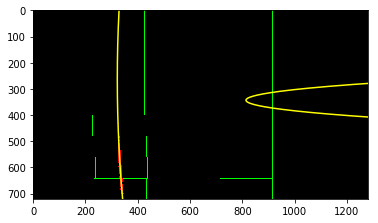

In [249]:
#image = mpimg.imread("./test_images/test1.jpg")
image = mpimg.imread("./frame.jpg")
color_image = np.copy(image)
process_image_1(color_image)


leftfit[0] leftfit[1] leftfit[2] -0.000101127678591 0.090843896939 322.013549276
rightfit[0] rightfit[1] rightfit[2] -0.145071982281 186.800664452 -59231.9844961


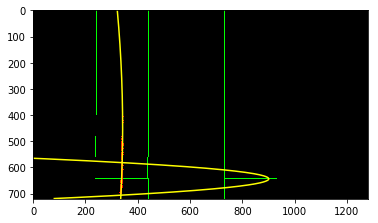

In [253]:
#image = mpimg.imread("./test_images/test1.jpg")
image = mpimg.imread("./frame1.jpg")
color_image = np.copy(image)
process_image_1(color_image)


leftfit[0] leftfit[1] leftfit[2] 3.89225355539e-05 -0.0721489935355 391.833304725
rightfit[0] rightfit[1] rightfit[2] -5.25906947267e-06 0.109661027236 782.220716906


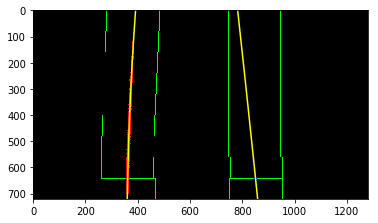

In [256]:
#image = mpimg.imread("./test_images/test1.jpg")
image = mpimg.imread("./frame2.jpg")
color_image = np.copy(image)
process_image_1(color_image)

leftfit[0] leftfit[1] leftfit[2] -6.68740783464e-05 0.150777829155 315.521965322
rightfit[0] rightfit[1] rightfit[2] -0.000350314363833 0.55100963389 662.497754125


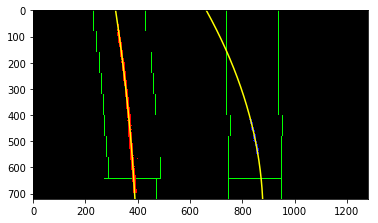

In [292]:
#image = mpimg.imread("./test_images/test1.jpg")
image = mpimg.imread("./frame3.jpg")
color_image = np.copy(image)
process_image_1(color_image)

leftfit[0] leftfit[1] leftfit[2] 0.000100606714676 -0.0552660149119 357.485187211
rightfit[0] rightfit[1] rightfit[2] 1.38517196925e-05 0.0995534425295 789.345023985


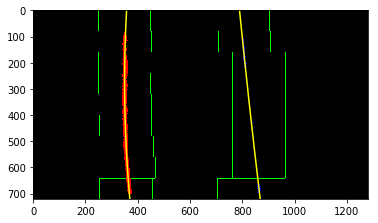

In [200]:
image = mpimg.imread("./test_images/test1.jpg")
color_image = np.copy(image)
process_image_1(color_image)

leftfit[0] leftfit[1] leftfit[2] -8.15639705726e-05 0.166170115176 315.245793998
rightfit[0] rightfit[1] rightfit[2] 1.2681485973e-05 0.247797222828 726.17557229


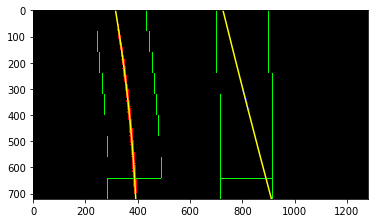

In [230]:
image = mpimg.imread("./test_images/test2.jpg")
color_image = np.copy(image)
process_image_1(color_image)

leftfit[0] leftfit[1] leftfit[2] 6.01856674587e-05 -0.0893196831339 406.02656791
rightfit[0] rightfit[1] rightfit[2] 4.52808926154e-05 0.0636632022528 812.735307826


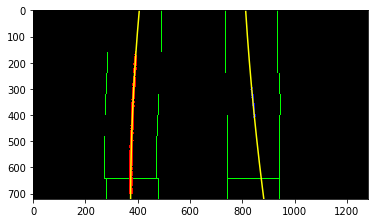

In [231]:
image = mpimg.imread("./test_images/test6.jpg")
color_image = np.copy(image)
process_image_1(color_image)

In [459]:
from collections import deque

global_leftfit = deque(maxlen=15)
global_rightfit = deque(maxlen=15)

def process_image_2(inputimage):
    #test_img_next = mpimg.imread(inputimage)
    global mtx,dist,src,dst, returned_image, global_leftfit, global_rightfit
    test_dst_next = cv2.undistort(inputimage, mtx, dist, None, mtx)
    hls = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HLS)
    gray = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(test_dst_next,cv2.COLOR_RGB2HSV)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    V = hsv[:,:,2]
    R = test_dst_next[:,:,0]
    G = test_dst_next[:,:,1]
    B = test_dst_next[:,:,2]
    
    s_thresh=(170, 255)
    s_binary = np.zeros_like(S)
    s_binary[(S >= s_thresh[0]) & (S <= s_thresh[1])] = 1
    
    v_thresh = (220,255)
    r_thresh = (220,255)
    
    
    v_binary = np.zeros_like(V)
    v_binary[(V>=v_thresh[0]) & (V <= v_thresh[1])] = 1

    r_binary = np.zeros_like(R)
    r_binary[(R>=r_thresh[0]) & (R <= r_thresh[1])] = 1
   

    combined_binary = np.zeros_like(s_binary)
    combined_binary[(s_binary == 1) & (v_binary == 1) &(r_binary == 1)] = 1
    
    mask = np.zeros_like(combined_binary)
    ignore_mask_color = 255
    #combined_binary.shape
    #cv2.fillPoly(mask,np.array([[[200,700],[550,400],[775,400],[1075,700]]]),255)
    #vertices = np.array([[200,700],[550,400],[775,400],[1075,700]], dtype=np.int32)
    #vertices = np.array([src], dtype=np.int32)
    cv2.fillPoly(mask, [src.astype('int32')], ignore_mask_color)
    #mask[combined_binary.shape[0]//2:,:] = combined_binary[combined_binary.shape[0]//2:,:]
    masked_image = cv2.bitwise_and(combined_binary, mask)
    
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (combined_binary.shape[1], combined_binary.shape[0])
    binary_warped = cv2.warpPerspective(masked_image, M, img_size, flags=cv2.INTER_LINEAR)
    
    #nonzero = binary_warped.nonzero()
    #nonzeroy = np.array(nonzero[0])
    #nonzerox = np.array(nonzero[1])
    #margin = 100
    #left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    #right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    histogram = np.sum(binary_warped[:,:],axis=0)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#out_img.shape
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    left_lane_inds = []
    right_lane_inds = []
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
     
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    if (leftx == None or lefty == None or rightx == None or righty == None):
        print("indices are None")
        avg_globalleftfit = sum(global_leftfit)/len(global_leftfit)
        avg_globalrightfit = sum(global_rightfit)/len(global_rightfit)
        left_fit = avg_globalleftfit
        right_fit = avg_globalrightfit
    elif (leftx.size == 0 or lefty.size == 0 or rightx.size == 0 or righty.size == 0):
        print("sizes are None")
        avg_globalleftfit = sum(global_leftfit)/len(global_leftfit)
        avg_globalrightfit = sum(global_rightfit)/len(global_rightfit)
        left_fit = avg_globalleftfit
        right_fit = avg_globalrightfit
    else:
    
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)

        max_polythreshold_0_right = 0.0007
        max_polythreshold_0 = 0.0007
        max_polythreshold_1 = 1.0
        #max_polythreshold_1 = 5.0
        max_polythreshold_2 = 500
        #max_polythreshold_2 = 5000
        if (len(global_leftfit) == 0):
            print ('First left fit frame. Add it')
            global_leftfit.append(left_fit)
            global_rightfit.append(right_fit)
        else:
            avg_globalleftfit = sum(global_leftfit)/len(global_leftfit)
            avg_globalrightfit = sum(global_rightfit)/len(global_rightfit)

            if((abs(left_fit[0] - avg_globalleftfit[0]) > max_polythreshold_0) or 
               (abs(left_fit[1] - avg_globalleftfit[1]) > max_polythreshold_1)
               or(abs(left_fit[2] - avg_globalleftfit[2]) > max_polythreshold_2) 
               or (abs(right_fit[0] - avg_globalrightfit[0]) > max_polythreshold_0_right) 
               or (abs(right_fit[1] - avg_globalrightfit[1]) > max_polythreshold_1) 
               or (abs(right_fit[2] - avg_globalrightfit[2]) > max_polythreshold_2)):
                #return returned_image
                print ("Above Threshold")
                left_fit = avg_globalleftfit
                right_fit = avg_globalrightfit
            else:
                global_leftfit.append(left_fit)
                global_rightfit.append(right_fit)

    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    y_eval = np.max(ploty)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    curvature_string = 'left_curve =' + str(left_curverad) + 'm' + ' right_curve =' + str(right_curverad) + 'm'
    camera_position = inputimage.shape[1]/2
    lane_center = (left_fitx[699] + right_fitx[699])/2.0
    offset = abs(camera_position - lane_center)*xm_per_pix
    offset_string = 'offset =' + str(offset) +'m' 
    print(offset)
    #print (left_fitx[719], right_fitx[719])
    #print (left_fit_cr.shape(),"m")
    Minv = cv2.getPerspectiveTransform(dst, src)
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    #print (pts_left[719], pts_right[719])
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    image_no_text = cv2.addWeighted(inputimage, 1, newwarp, 0.3, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    image_curvature = cv2.putText(image_no_text,curvature_string,(100,40), font, 1, (255,255,255), 2, cv2.LINE_AA)
    result = cv2.putText(image_curvature,offset_string,(100,100), font, 1, (255,255,255), 2, cv2.LINE_AA)
    returned_image = result
    return result


In [460]:
global_leftfit.clear()
global_rightfit.clear()
white_output = 'white.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image_2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

First left fit frame. Add it
6767.39947002 m 865.454083597 m
0.0188976668913
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

6767.39947002 m 865.454083597 m
0.0188976668913


  0%|          | 1/1261 [00:00<03:28,  6.05it/s]

5519.75966097 m 1743.93361801 m
0.0404969371601


  0%|          | 3/1261 [00:00<03:27,  6.05it/s]

4198.41294629 m 977.344611648 m
0.0392791567458


  0%|          | 4/1261 [00:00<03:21,  6.22it/s]

3430.29725754 m 987.011167609 m
0.0445643832267


  0%|          | 5/1261 [00:00<03:17,  6.37it/s]

3144.99967986 m 4443.71978172 m
0.0482031389439
3115.16193914 m 5199.73208508 m
0.0512028560551


  1%|          | 7/1261 [00:01<03:28,  6.00it/s]

3439.96302611 m 2810.3889984 m
0.0525714619069


  1%|          | 8/1261 [00:01<03:24,  6.13it/s]

3177.62738659 m 29254.0890607 m
0.0827934207163


  1%|          | 9/1261 [00:01<03:23,  6.15it/s]

3346.74638625 m 67387.0680042 m
0.0805928974261


  1%|          | 10/1261 [00:01<03:22,  6.18it/s]

3572.27294596 m 6396.51951437 m
0.0847754452066


  1%|          | 11/1261 [00:01<03:21,  6.20it/s]

3744.78477447 m 4154.2621808 m
0.0801442048619


  1%|          | 12/1261 [00:01<03:17,  6.31it/s]

3951.38314634 m 6847.53726551 m
0.0729613185576


  1%|          | 13/1261 [00:02<03:17,  6.33it/s]

3830.43673287 m 1616.74643815 m
0.0420761112468


  1%|          | 14/1261 [00:02<03:15,  6.39it/s]

3586.20112918 m 8078.12661561 m
0.061454697058


  1%|          | 15/1261 [00:02<03:13,  6.44it/s]

3345.37297201 m 23557.5926382 m
0.0548825771784


  1%|▏         | 16/1261 [00:02<03:16,  6.32it/s]

3258.63633546 m 4971.15229838 m
0.0467927783839
2957.77678749 m 2882.11238023 m
0.0407281791553


  1%|▏         | 18/1261 [00:02<03:22,  6.13it/s]

2728.10972802 m 3172.96957341 m
0.0381689023727


  2%|▏         | 19/1261 [00:03<03:19,  6.21it/s]

2779.18274405 m 5731.28272819 m
0.0398988086287


  2%|▏         | 20/1261 [00:03<03:21,  6.17it/s]

2960.52231358 m 6714.61377925 m
0.0387135490929
3923.53803277 m 26871.5642415 m
0.0600061471457


  2%|▏         | 21/1261 [00:03<03:29,  5.92it/s]

5668.02739401 m 4505.57331894 m
0.0666955688886


  2%|▏         | 23/1261 [00:03<03:27,  5.97it/s]

6455.64590061 m 3753.01883957 m
0.054085404037


  2%|▏         | 24/1261 [00:03<03:20,  6.16it/s]

9233.19592234 m 3046.60026443 m
0.0471030071575


  2%|▏         | 25/1261 [00:04<03:19,  6.20it/s]

12671.404243 m 4512.20539035 m
0.0313865354294
24353.9724986 m 1468.02476708 m
0.00438062365521


  2%|▏         | 27/1261 [00:04<03:24,  6.04it/s]

277525.367771 m 6059.84838301 m
0.0138513162491


  2%|▏         | 28/1261 [00:04<03:17,  6.23it/s]

510929.680948 m 2736.99244583 m
0.0116386379231


  2%|▏         | 29/1261 [00:04<03:14,  6.34it/s]

100592.068469 m 3157.38181738 m
0.0124403010886


  2%|▏         | 30/1261 [00:04<03:11,  6.41it/s]

9666.80091502 m 3080.88628362 m
0.0051738180093


  2%|▏         | 31/1261 [00:05<03:09,  6.49it/s]

5744.20703658 m 2689.61200854 m
0.00386820956608


  3%|▎         | 32/1261 [00:05<03:08,  6.53it/s]

4242.97660336 m 2190.22541723 m
0.000382098214587


  3%|▎         | 33/1261 [00:05<03:06,  6.57it/s]

4178.44012678 m 4016.48033304 m
0.00635184547497


  3%|▎         | 34/1261 [00:05<03:05,  6.63it/s]

3708.32049826 m 1360458.20028 m
0.0384217757763


  3%|▎         | 35/1261 [00:05<03:03,  6.67it/s]

4019.87280792 m 19657.2350774 m
0.0362550238348


  3%|▎         | 36/1261 [00:05<03:03,  6.66it/s]

3719.5989881 m 5406.22662543 m
0.0365990778062


  3%|▎         | 37/1261 [00:05<03:04,  6.62it/s]

4185.34734928 m 15867.7028547 m
0.0293892807978


  3%|▎         | 38/1261 [00:06<03:04,  6.62it/s]

3947.89037714 m 1214.06244406 m
0.00890646018784


  3%|▎         | 39/1261 [00:06<03:04,  6.62it/s]

4049.5645295 m 1399.5190496 m
0.00117060482203


  3%|▎         | 40/1261 [00:06<03:03,  6.65it/s]

3643.24509027 m 3453.40903479 m
0.0216721411236


  3%|▎         | 41/1261 [00:06<03:03,  6.66it/s]

3537.32322799 m 9915.25740218 m
0.016501279736


  3%|▎         | 42/1261 [00:06<03:03,  6.65it/s]

3573.15011988 m 3975.95723151 m
0.0189050706504
3293.04861471 m 3514.97547959 m
0.0206584497362


  3%|▎         | 43/1261 [00:06<03:23,  5.97it/s]

3136.07150356 m 2706.67697101 m
0.0199195270177


  3%|▎         | 44/1261 [00:07<03:28,  5.83it/s]

2870.43761858 m 3105.78772273 m
0.0237066768152


  4%|▎         | 45/1261 [00:07<03:35,  5.65it/s]

2818.43484525 m 46989.6895165 m
0.0647242788553


  4%|▎         | 47/1261 [00:07<03:30,  5.76it/s]

2696.62138182 m 6588.63696912 m
0.0440142731541
2667.80339605 m 11585.7128025 m
0.0463963048103


  4%|▍         | 48/1261 [00:07<03:32,  5.71it/s]

2863.15155818 m 4994.85573233 m
0.0427155400937


  4%|▍         | 49/1261 [00:07<03:30,  5.76it/s]

2941.26556952 m 629713.9788 m
0.0339682126663


  4%|▍         | 50/1261 [00:08<03:34,  5.65it/s]

2852.69925372 m 3972.98721642 m
0.0271576376678


  4%|▍         | 52/1261 [00:08<03:27,  5.82it/s]

2912.01321925 m 12532.8338592 m
0.027233533573


  4%|▍         | 53/1261 [00:08<03:24,  5.90it/s]

2904.52561822 m 4336.79143263 m
0.0295012873696
2965.73981152 m 19208.2626274 m
0.0221924526862


  4%|▍         | 54/1261 [00:08<03:30,  5.74it/s]

2943.03833113 m 2675.2927857 m
0.0205160160933


  4%|▍         | 55/1261 [00:08<03:29,  5.77it/s]

2869.90345023 m 2858.80685467 m
0.0198179390061


  4%|▍         | 56/1261 [00:09<03:36,  5.57it/s]

3055.3015636 m 3119.05451306 m
0.0212778927338


  5%|▍         | 57/1261 [00:09<03:33,  5.65it/s]

3060.01409731 m 3471.20754232 m
0.0169981608648


  5%|▍         | 59/1261 [00:09<03:31,  5.69it/s]

3542.58252703 m 7636.8370208 m
0.039812918179
4424.231387 m 40588.6393339 m
0.0324874156456


  5%|▍         | 60/1261 [00:09<03:40,  5.45it/s]

6522.39597465 m 20480.2822363 m
0.0272913768036


  5%|▍         | 61/1261 [00:10<03:35,  5.57it/s]

11053.6907327 m 22729.4832026 m
0.017736589606


  5%|▍         | 62/1261 [00:10<03:38,  5.48it/s]

14741.8387626 m 1112.12426924 m
0.0230035348129


  5%|▍         | 63/1261 [00:10<03:37,  5.50it/s]

24434.4159944 m 1695.28697521 m
0.0109094836491


  5%|▌         | 66/1261 [00:10<03:36,  5.52it/s]

29410.6161041 m 6281.35724314 m
0.00895801280635
19435.3728439 m 2162.79631345 m
0.0163960675304


  5%|▌         | 67/1261 [00:11<03:33,  5.58it/s]

31861.428604 m 3333.70586461 m
0.0194363915522
12797.5845932 m 3992.01969489 m
0.0264781479102


  6%|▌         | 70/1261 [00:11<03:25,  5.80it/s]

5992.67911444 m 9932.5738866 m
0.0312001954139
4631.57936937 m 8818.66283922 m
0.0368890529819


  6%|▌         | 72/1261 [00:12<03:27,  5.73it/s]

3632.08537305 m 31502.5826868 m
0.024418606475
2980.15834522 m 7360.76989037 m
0.0264992014968


  6%|▌         | 73/1261 [00:12<03:29,  5.66it/s]

2818.2135157 m 2511.87724631 m
0.0152078836546
2795.42343534 m 2532.95051774 m
0.0279971139762


  6%|▌         | 76/1261 [00:12<03:24,  5.78it/s]

2750.27968747 m 7230.19741791 m
0.0415330594365
2905.65968761 m 1547.8129518 m
0.0718657640526


  6%|▌         | 78/1261 [00:13<03:20,  5.89it/s]

3273.21238114 m 2696.56239979 m
0.061286143427
3669.79185482 m 10824.1978614 m
0.0522103151288


  6%|▋         | 80/1261 [00:13<03:26,  5.71it/s]

4976.15026392 m 8815.00092982 m
0.055158285258
6276.27975289 m 3709.82343864 m
0.0607516199538


  6%|▋         | 81/1261 [00:13<03:32,  5.54it/s]

11176.2735217 m 5022.594575 m
0.0636499854448


  7%|▋         | 83/1261 [00:14<03:33,  5.51it/s]

18863.0095391 m 3409.20805271 m
0.0690000864188
165022.919413 m 5060.09420393 m
0.0701300168449


  7%|▋         | 84/1261 [00:14<03:29,  5.63it/s]

111781.396288 m 43023.4011186 m
0.0461502278978
305373.840003 m 10845.4794082 m
0.0437967613174


  7%|▋         | 87/1261 [00:14<03:21,  5.81it/s]

35537.1140263 m 13032.019889 m
0.0597167727195
22527.9111059 m 8752.10881417 m
0.0665521035084


  7%|▋         | 88/1261 [00:14<03:28,  5.62it/s]

13641.1552032 m 1855.52316486 m
0.051488063237


  7%|▋         | 89/1261 [00:15<03:38,  5.37it/s]

10854.3871664 m 2854.43618984 m
0.0921405117364
9555.55732922 m 4221.68836515 m
0.080782402417


  7%|▋         | 92/1261 [00:15<03:27,  5.64it/s]

8833.58315205 m 2471.83408051 m
0.0873740175935
11420.5457805 m 2757.63376786 m
0.0821298702668


  7%|▋         | 93/1261 [00:15<03:21,  5.79it/s]

7016.09549829 m 3012.00516103 m
0.0842048283037
5787.88264413 m 4667.34952298 m
0.0816387919662


  8%|▊         | 95/1261 [00:16<03:21,  5.78it/s]

4569.44454057 m 7962.11828105 m
0.0847574293179
3804.8722412 m 64865.3583898 m
0.077507207544


  8%|▊         | 97/1261 [00:16<03:30,  5.54it/s]

3581.36524318 m 3882.97403611 m
0.0524614945196
3578.53687222 m 3419.31940909 m
0.0576837534421


  8%|▊         | 99/1261 [00:16<03:27,  5.59it/s]

3228.59090734 m 1950.34600535 m
0.0560347451454
3555.14347506 m 4490.95833746 m
0.0693951056443


  8%|▊         | 101/1261 [00:17<03:26,  5.62it/s]

3549.66394065 m 1155.66090514 m
0.113464022023
3958.08627471 m 2005.20518512 m
0.0946279198214


  8%|▊         | 104/1261 [00:17<03:22,  5.70it/s]

4378.97623039 m 52255.5223045 m
0.0779408075338
4890.48920865 m 3913.74544463 m
0.0734092057054


  8%|▊         | 105/1261 [00:17<03:37,  5.32it/s]

6261.79636438 m 3117.86136935 m
0.0659101549771


  8%|▊         | 106/1261 [00:18<03:44,  5.16it/s]

5265.54765455 m 3228.47623603 m
0.0618400540533
5619.59015782 m 2949.25545773 m
0.0562703091788


  9%|▊         | 109/1261 [00:18<03:28,  5.53it/s]

4822.83514647 m 3369.60041431 m
0.0509393867379
5030.61750894 m 4248.9421094 m
0.0354914692762


  9%|▉         | 111/1261 [00:19<03:17,  5.84it/s]

4789.17982114 m 5039.08995392 m
0.0260307833873
4648.1872324 m 6354.72155251 m
0.0348029012467


  9%|▉         | 112/1261 [00:19<03:25,  5.60it/s]

5096.46823965 m 25388.1959049 m
0.0211296863629
5012.77552603 m 74229.698068 m
0.0201180698934


  9%|▉         | 114/1261 [00:19<03:28,  5.49it/s]

4377.07108107 m 131686.856915 m
0.0188453024842
4128.27841778 m 3653.98053284 m
0.0152698855008


  9%|▉         | 116/1261 [00:19<03:29,  5.47it/s]

4200.26590242 m 5209.70373842 m
0.022740259314


  9%|▉         | 117/1261 [00:20<03:40,  5.19it/s]

4361.56355297 m 12569.6396163 m
0.0238828728944
3973.72831818 m 6151.56422227 m
0.0251473541655


 10%|▉         | 120/1261 [00:20<03:23,  5.61it/s]

3823.14220015 m 3723.28781285 m
0.0243442671398
3507.78198219 m 3330.34231876 m
0.0212619791905


 10%|▉         | 121/1261 [00:20<03:24,  5.58it/s]

3401.65789217 m 3719.84824594 m
0.0183038223249
3512.24124388 m 15790.3437123 m
0.0115681243313


 10%|▉         | 123/1261 [00:21<03:24,  5.57it/s]

3633.03993706 m 75772.555675 m
0.0130774412915
3811.97856283 m 4327.24146496 m
0.0172690854593


 10%|▉         | 126/1261 [00:21<03:17,  5.76it/s]

3846.25835657 m 7885.66759965 m
0.0128587015452
3969.7713004 m 28468.4384838 m
0.0157070933657


 10%|█         | 128/1261 [00:22<03:14,  5.83it/s]

3640.59105998 m 2421.62913384 m
0.000849878430009
3672.20047871 m 1979.7832698 m
0.0202298424866


 10%|█         | 129/1261 [00:22<03:16,  5.75it/s]

3714.33825014 m 4992.65552175 m
0.0126251800117
3329.0728112 m 2874.32341006 m
0.00955760962532


 10%|█         | 131/1261 [00:22<03:17,  5.72it/s]

3163.21129793 m 2478.07756916 m
0.0112751180663
2970.65776199 m 2591.98625627 m
0.0152699098249


 11%|█         | 133/1261 [00:23<03:21,  5.59it/s]

2853.33259541 m 2710.2195685 m
0.0205915050018
3078.15349081

 11%|█         | 134/1261 [00:23<03:34,  5.27it/s]

 m 4381.10475016 m
0.0406674742051
3024.58436107 m 4742.25309834 m
0.0446237722768


 11%|█         | 137/1261 [00:23<03:17,  5.68it/s]

3307.78282204 m 3387.63354543 m
0.031736231527
3766.54089041 m 66664.140285 m
0.0518566620924


 11%|█         | 138/1261 [00:23<03:14,  5.76it/s]

3818.13512711 m 5614.39478912 m
0.0466394587486
4078.99498 m 2569.75997841 m
0.03702262734


 11%|█         | 141/1261 [00:24<03:14,  5.76it/s]

5073.80566332 m 3494.83077931 m
0.0541686010713
7871.5298951 m 5711.30215885 m
0.047638021573


 11%|█▏        | 143/1261 [00:24<03:12,  5.81it/s]

11194.9970393 m 16254.9308817 m
0.0413538325857
7144.53456522 m 4185.63792363 m
0.0351861047863


 11%|█▏        | 144/1261 [00:24<03:17,  5.65it/s]

6374.59417848 m 3336.86559707 m
0.0277535429043
5587.10439809 m 2944.74946959 m
0.0266060844924


 12%|█▏        | 146/1261 [00:25<03:26,  5.40it/s]

4716.1682915 m 2760.96659673 m
0.0240165512971
4163.86213133 m 4401.96306234 m
0.0370672354725


 12%|█▏        | 149/1261 [00:25<03:18,  5.60it/s]

3389.1400837 m 6726.37202456 m
0.0326069057798
3228.12366726 m 7251.73094902 m
0.0457080773915


 12%|█▏        | 150/1261 [00:26<03:17,  5.62it/s]

3323.54481344 m 30091.8499283 m
0.0407406686915
3841.71229608 m 9777.75770244 m
0.0328114559291


 12%|█▏        | 152/1261 [00:26<03:16,  5.63it/s]

4039.9390333 m 4306.93812027 m
0.0244421201801
4212.28084442 m 2351.45256736 m
0.0341167559526


 12%|█▏        | 155/1261 [00:26<03:12,  5.73it/s]

6391.51383358 m 4366.67452744 m
0.0255103003804
8036.79734711 m 3009.83667773 m
0.0233612303549


 12%|█▏        | 157/1261 [00:27<03:07,  5.90it/s]

10445.5585412 m 8175.97784195 m
0.0190723543614
14899.519871 m 5621.12802049 m
0.0140608302377


 13%|█▎        | 158/1261 [00:27<03:05,  5.94it/s]

12286.0534676 m 2998.09940966 m
0.00378613973191
9002.09504002 m 1783.76839689 m
0.0366652689575


 13%|█▎        | 160/1261 [00:27<03:13,  5.69it/s]

7295.97362927 m 1842.93039036 m
0.0221991562612
5546.59159477 m 12427.6899982 m
0.0103933319369


 13%|█▎        | 162/1261 [00:28<03:16,  5.60it/s]

4855.56799847 m 3298.95203607 m
0.0136392065446
4517.91671296 m 9076.21912825 m
0.0021544162522


 13%|█▎        | 165/1261 [00:28<03:14,  5.63it/s]

4211.67571835 m 1688.44693403 m
0.0153683512
4091.63441357 m 3655.11113768 m
0.00923405920902


 13%|█▎        | 166/1261 [00:28<03:17,  5.56it/s]

4419.68084001 m 933.666638177 m
0.0205416372795
4682.52046858 m 1370.26256291 m
0.0134848853237


 13%|█▎        | 169/1261 [00:29<03:13,  5.64it/s]

4590.60562348 m 4230.08521024 m
0.0104137340567
4675.45863457 m 6531.29564128 m
0.0112844232404


 14%|█▎        | 171/1261 [00:29<03:04,  5.89it/s]

4044.26603907 m 5587.94238573 m
0.0178872163409
4207.71046499 m 13699.7169408 m
0.0247417611602


 14%|█▎        | 173/1261 [00:30<03:03,  5.94it/s]

3777.9838259 m 6984.61931875 m
0.0297924074984
3803.09069031 m 5913.00966349 m
0.0162537602516


 14%|█▍        | 174/1261 [00:30<03:06,  5.83it/s]

3710.20323295 m 4293.23299462 m
0.0246900812894
3589.02631873 m 15258.975496 m
0.035805618921


 14%|█▍        | 177/1261 [00:30<03:04,  5.88it/s]

3503.3470327 m 1323641.46872 m
0.0391690175169
3669.22621886 m 5874.09310299 m
0.040032732079


 14%|█▍        | 178/1261 [00:30<03:09,  5.71it/s]

4110.19888932 m 3645.42355922 m
0.0386799280204
5428.89860882 m 86995.7410756 m
0.0387627257211


 14%|█▍        | 180/1261 [00:31<03:08,  5.74it/s]

7377.26681193 m 3327.699051 m
0.036697264416
12591.5402465 m 2909.63042923 m
0.0363427246417


 14%|█▍        | 182/1261 [00:31<03:12,  5.59it/s]

37398.5983944 m 2097.2097442 m
0.0376872468416
30357.6012894 m 2111.72388253 m
0.0362977704457


 15%|█▍        | 184/1261 [00:32<03:15,  5.50it/s]

18498.0498845 m 2691.95642566 m
0.0240751520116
95086.0396742 m 2537.84573302 m
0.0355031757033


 15%|█▍        | 186/1261 [00:32<03:12,  5.57it/s]

7374.75522625 m 4438.4244921 m
0.0315232718258
4443.13467636 m 2523.64423217 m
0.0371475913843


 15%|█▍        | 188/1261 [00:32<03:11,  5.59it/s]

3083.10744449 m 1010.48709165 m
0.0560803673798
2349.50416411 m 1893.40404298 m
0.0401543840883


 15%|█▌        | 190/1261 [00:33<03:16,  5.45it/s]

2220.49710908 m 3276.68306746 m
0.0306267114558
2266.19940444 m 1718.8610764 m
0.0261216022693


 15%|█▌        | 192/1261 [00:33<03:14,  5.51it/s]

2251.03131492 m 2316.98808619 m
0.0193544004674
2644.75488983 m 2444.78137242 m
0.00874196449077


 15%|█▌        | 194/1261 [00:33<03:23,  5.24it/s]

3046.23062358 m 2172.82249273 m
0.00449715085314
3414.72135391 m 2566.10986027 

 15%|█▌        | 195/1261 [00:34<03:26,  5.15it/s]

m
0.000957783461346
3678.34190819 m 3134.00313421 m
0.00494495462823


 16%|█▌        | 198/1261 [00:34<03:12,  5.53it/s]

4280.12499719 m 5980.47023543 m
0.0170825814298
4004.12532807 m 9756.90760506 m
0.00830154818108


 16%|█▌        | 199/1261 [00:34<03:15,  5.44it/s]

4747.20503732 m 33393.4065504 m
0.00666336711554
4541.0511429 m 39426.1218929 m
0.00408660552978


 16%|█▌        | 202/1261 [00:35<03:03,  5.76it/s]

4503.18806239 m 2817.02702741 m
0.0140194662947
4213.16654542 m 1337.61002978 m
0.00699463356622


 16%|█▌        | 203/1261 [00:35<03:08,  5.62it/s]

4044.04680019 m 7021.70277673 m
0.0145212615096
3569.04766662 m 2804.32242847 m
0.0216277660877


 16%|█▋        | 205/1261 [00:35<03:11,  5.52it/s]

3358.20096203 m 3781.77443318 m
0.0288628986743
3641.27097085 m 3131.39510316 m
0.0280493468991


 16%|█▋        | 208/1261 [00:36<02:59,  5.87it/s]

3418.88246351 m 2591.34995016 m
0.0278348047266
3681.65260377 m 17720.6274764 m
0.0291327934573


 17%|█▋        | 209/1261 [00:36<03:10,  5.53it/s]

4769.84571203 m 3182.7734458 m
0.0173712230588
6364.02966856 m 7570.80731334 m
0.0065850615515


 17%|█▋        | 212/1261 [00:37<03:08,  5.58it/s]

8234.04488776 m 92726.4420171 m
0.00310618777427
9638.22437456 m 4196.09937764 m
0.0111488130977


 17%|█▋        | 213/1261 [00:37<03:09,  5.53it/s]

10902.4946748 m 6112.17572563 m
0.0107068206385
7055.33691668 m 19338.8051586 m
0.0136105120683


 17%|█▋        | 216/1261 [00:37<03:02,  5.74it/s]

5356.41661249 m 2396.24804832 m
0.020429090078
3696.77476414 m 5102.44360757 m
0.0343740612346


 17%|█▋        | 217/1261 [00:38<03:02,  5.73it/s]

2864.26490781 m 4746.15122924 m
0.0456360616463
2618.02858409 m 3536.99149815 m
0.0526592427818


 17%|█▋        | 219/1261 [00:38<03:01,  5.75it/s]

2439.20994687 m 2552.24479295 m
0.05588659587
2643.16945487 m 2613.34514095 m
0.0548519856852


 18%|█▊        | 222/1261 [00:38<03:00,  5.76it/s]

2855.96494223 m 1723.20906052 m
0.0703087514277
3433.80812459 m 1714.79955129 m
0.0648317488614


 18%|█▊        | 224/1261 [00:39<03:01,  5.70it/s]

3875.8307168 m 3727.83203106 m
0.0440693405437
4525.81238973 m 3238.2724962 m
0.04657601986


 18%|█▊        | 225/1261 [00:39<03:03,  5.66it/s]

4099.27919914 m 3577.35473748 m
0.0429248747235
3970.88316414 m 1025.02432529 m
0.070486280769


 18%|█▊        | 227/1261 [00:39<03:01,  5.70it/s]

3822.21019506 m 5866.13388398 m
0.0575388201138
3858.92650256 m 1962.54793149 m
0.0659160997659


 18%|█▊        | 229/1261 [00:40<03:04,  5.58it/s]

3504.84528582 m 41534.333523 m
0.0717905149151
3794.9590875 m 51973.6623921 m
0.0788234607718


 18%|█▊        | 231/1261 [00:40<02:58,  5.79it/s]

4139.58480598 m 21314.0334744 m
0.0853227171961
5637.61666919 m 6365.21049096 m
0.0940948877606


 19%|█▊        | 234/1261 [00:40<02:55,  5.84it/s]

6444.40898545 m 6438.89525392 m
0.090225888937
8464.6155907 m 9131.99554053 m
0.0884434231895


 19%|█▊        | 235/1261 [00:41<02:59,  5.70it/s]

8585.33766268 m 55579.5303287 m
0.0958005902842
6457.15063969 m 26656.2039498 m
0.100167584581


 19%|█▉        | 238/1261 [00:41<03:00,  5.68it/s]

6664.7976108 m 2495.71733906 m
0.0879640857826
6665.9703667 m 1161.43141309 m
0.137424267098


 19%|█▉        | 240/1261 [00:42<02:52,  5.91it/s]

6621.69300011 m 1361.3532999 m
0.133603017026
8723.91451214 m 2036.81680128 m
0.127053142104


 19%|█▉        | 241/1261 [00:42<03:04,  5.53it/s]

8649.78123303 m 3104.46641981 m
0.128437397796
14283.0516794 m 4396.86873183 m
0.127505414301


 19%|█▉        | 243/1261 [00:42<03:05,  5.50it/s]

12695.8501729 m 3828.05104576 m
0.130598491569
12633.1388991 m 3716.38981383 m
0.136215373576


 20%|█▉        | 246/1261 [00:43<02:55,  5.80it/s]

9859.37732464 m 2651.39104774 m
0.145338784522
7377.15433863 m 3567.94144373 m
0.141171976099


 20%|█▉        | 248/1261 [00:43<02:53,  5.84it/s]

7026.84259562 m 5554.18564732 m
0.139771143924
4763.57219599 m 14444.0882783 m
0.137247297571


 20%|█▉        | 250/1261 [00:43<02:49,  5.95it/s]

4766.29662725 m 1593.36119231 m
0.10431460394
4107.61977515 m 2840.61396499 m
0.147790302373


 20%|█▉        | 252/1261 [00:44<02:48,  5.98it/s]

4794.70728877 m 5540.20647144 m
0.145881539841
7180.65295255 m 5917.95702299 m
0.140024017048


 20%|██        | 254/1261 [00:44<02:52,  5.84it/s]

6986.28029898 m 26147.98492 m
0.146734929285
8066.28725182 m 3363.81838075 m
0.146955243646


 20%|██        | 255/1261 [00:44<02:51,  5.88it/s]

5827.94958404 m 3253.58816218 m
0.146744045163
5061.35889523 m 4063.48619442 m
0.148516492817


 20%|██        | 258/1261 [00:45<02:52,  5.81it/s]

3793.35269471 m 3657.2724867 m
0.146453083812
3442.486977 m 3309.17563928 m
0.147758747602


 21%|██        | 260/1261 [00:45<02:54,  5.73it/s]

3290.40005099 m 3337.73565961 m
0.145675027292
3493.87134506 m 256372.549011 m
0.12838076268


 21%|██        | 261/1261 [00:45<02:57,  5.63it/s]

4461.44994275 m 13185.0912166 m
0.119678214146
5701.02111595 m 3969.58859846 m
0.110665684343


 21%|██        | 263/1261 [00:46<03:05,  5.38it/s]

7483.67478479 m 1873.67295709 m
0.138276132109
10905.5735929 m 7882.12065695 m
0.126966035417


 21%|██        | 265/1261 [00:46<02:59,  5.54it/s]

10990.9529829 m 12807.7884314 m
0.127980056516
8504.24750576 m 4372.02145238 m
0.131280110027


 21%|██        | 267/1261 [00:46<03:02,  5.46it/s]

6623.64708234 m 4606.60325942 m
0.129745644668
5265.11340829 m 2980.24357504 m
0.1332520447


 21%|██▏       | 269/1261 [00:47<03:09,  5.24it/s]

4942.05632051 m 2862.06887426 m
0.132907430843
4533.70067249 m 1667.15439565 m
0.15720267742


 21%|██▏       | 271/1261 [00:47<03:04,  5.38it/s]

4759.87046539 m 2558.63417032 m
0.13055208674
4844.4365508 m 3303.16716263 m
0.121263888149


 22%|██▏       | 274/1261 [00:48<02:54,  5.65it/s]

5350.41083286 m 2246.56133256 m
0.122550371413
5440.59711806 m 910.765715345 m
0.134261644521


 22%|██▏       | 276/1261 [00:48<02:47,  5.89it/s]

5507.01430276 m 1876.24221047 m
0.113462066039
5897.64899417 m 6112.07300924 m
0.100864555447


 22%|██▏       | 277/1261 [00:48<02:49,  5.80it/s]

5746.10581442 m 8004.990583 m
0.102061672507
5460.3023215 m 8859.86573018 m
0.101787080464


 22%|██▏       | 280/1261 [00:49<02:44,  5.95it/s]

4631.97151194 m 6075.68619936 m
0.102556123364
4555.93555543 m 3506.13156997 m
0.104145301588


 22%|██▏       | 282/1261 [00:49<02:39,  6.13it/s]

4557.92559979 m 1715.1495748 m
0.139753331731
5281.52143241 m 4319.27813193 m
0.0931554755755


 22%|██▏       | 283/1261 [00:49<02:45,  5.91it/s]

5398.22766838 m 5420.77244334 m
0.0903117513741
5506.13490002 m 6692.62595962 m
0.0860875205147


 23%|██▎       | 285/1261 [00:49<02:48,  5.78it/s]

5661.75009458 m 5679.44469889 m
0.0734677108308
6111.44823585 m 1917.37710587 m
0.0790527767904


 23%|██▎       | 288/1261 [00:50<02:47,  5.81it/s]

6370.24289876 m 3339.04936855 m
0.0711753676772
6338.51827134 m 14476.9701329 m
0.0618698974952


 23%|██▎       | 290/1261 [00:50<02:43,  5.94it/s]

5742.03310651 m 12723.3374125 m
0.0610059714544
6156.10160789 m 5858.08005631 m
0.059548294478


 23%|██▎       | 291/1261 [00:50<02:39,  6.09it/s]

5926.99753575 m 5383.80800287 m
0.0571600704607
6325.88825521 m 6762.76753559 m
0.054405846721


 23%|██▎       | 293/1261 [00:51<02:51,  5.64it/s]

6737.82733404 m 1910.78150688 m
0.0978870196951


 23%|██▎       | 294/1261 [00:51<03:01,  5.32it/s]

6515.09413835 m 4485.85094291 m
0.0468765455318
7053.13859835 m 23128.1389452 m
0.03595446417


 24%|██▎       | 297/1261 [00:52<02:45,  5.83it/s]

7220.97607956 m 7811.10801244 m
0.0330076446723
8584.98930372 m 11958.3865238 m
0.0359112920931


 24%|██▎       | 298/1261 [00:52<02:46,  5.80it/s]

10790.2314903 m 1434.52418475 m
0.0613659626391
13350.2131281 m 4589.65910235 m
0.0447415193296


 24%|██▍       | 300/1261 [00:52<02:47,  5.73it/s]

16559.4998305 m 2786.09490232 m
0.0433078942062
15957.3671897 m 3076.78381791 m
0.0435314589432


 24%|██▍       | 302/1261 [00:52<02:59,  5.34it/s]

18928.6636687 m 7135.83799322 m
0.0431781057793
12717.3062489 m 6103.57853112 m
0.0448193037562


 24%|██▍       | 304/1261 [00:53<02:53,  5.50it/s]

8568.47591411 m 5308.93095382 m
0.0482741686826
7513.74341791 m 2438.99795993 m
0.0700417976741


 24%|██▍       | 306/1261 [00:53<02:53,  5.51it/s]

7439.82762099 m 3019.04724676 m
0.0565987119485
7288.59452312 m 17695.3628618 m
0.0336482836989


 24%|██▍       | 308/1261 [00:54<02:52,  5.51it/s]

7363.96782147 m 28950.9452983 m
0.0333619986644
6596.56082395 m 4387.84793986 m
0.0348047458629


 25%|██▍       | 310/1261 [00:54<02:49,  5.60it/s]

8162.83274494 m 1177.52575047 m
0.0533215167442


 25%|██▍       | 311/1261 [00:54<02:57,  5.37it/s]

11482.5437991 m 6022.60136975 m
0.0327936730149
23928.9046246 m 3990.72245812 m
0.0294527839304


 25%|██▍       | 313/1261 [00:54<02:57,  5.35it/s]

118687.731327 m 8328.49958684 m
0.0291760601933
191028.871325 m 9740.65770739 m
0.029437825442


 25%|██▍       | 315/1261 [00:55<02:52,  5.50it/s]

70094.9292146 m 11167.7445917 m
0.0297727232669


 25%|██▌       | 316/1261 [00:55<03:02,  5.17it/s]

28757.2314949 m 809821.594377 m
0.0301193307832
15835.018028 m 35265.9767666 m
0.0366821715596


 25%|██▌       | 319/1261 [00:56<02:42,  5.79it/s]

10110.0162802 m 13696.0977589 m
0.0238486405346
9431.97681091 m 3004.82184796 m
0.011082626465


 25%|██▌       | 320/1261 [00:56<02:47,  5.62it/s]

9170.28663302 m 2757.93632307 m
0.0177300233671


 25%|██▌       | 321/1261 [00:56<02:59,  5.23it/s]

12731.0529117 m 80718.1219458 m
0.0315714034489
18424.4975143 m 3055.06937449 m
0.0409898208622


 26%|██▌       | 323/1261 [00:56<03:07,  5.01it/s]

40420.9297648 m 43083.5025416 m
0.0299962918111
84166.379796 m 

 26%|██▌       | 324/1261 [00:57<03:07,  5.00it/s]

3689.93805803 m
0.0322559353745


 26%|██▌       | 325/1261 [00:57<03:18,  4.72it/s]

32535.625392 m 19247.6162354 m
0.0289328152721


 26%|██▌       | 326/1261 [00:57<03:32,  4.41it/s]

22021.4669413 m 30485.8911054 m
0.0291715533514


 26%|██▌       | 327/1261 [00:57<03:31,  4.41it/s]

18649.4661634 m 18291.7521055 m
0.0302952420177


 26%|██▌       | 328/1261 [00:58<03:35,  4.32it/s]

42238.7678739 m 7119.56814221 m
0.0334536368755


 26%|██▌       | 329/1261 [00:58<03:30,  4.43it/s]

34560.3669754 m 2947.72479724 m
0.060681830801


 26%|██▌       | 330/1261 [00:58<03:29,  4.45it/s]

39782.8827466 m 6285.48551327 m
0.0303408308143


 26%|██▌       | 331/1261 [00:58<03:32,  4.37it/s]

352008.788295 m 4782.07533505 m
0.0101725387248


 26%|██▋       | 332/1261 [00:58<03:33,  4.35it/s]

76821.328476 m 35311.540941 m
0.0257858299505


 26%|██▋       | 333/1261 [00:59<03:28,  4.46it/s]

66492.8313447 m 3975.58267145 m
0.0402887340826


 26%|██▋       | 334/1261 [00:59<03:23,  4.55it/s]

34931.8005859 m 4486.24872991 m
0.0348994976175


 27%|██▋       | 335/1261 [00:59<03:28,  4.45it/s]

24136.286671 m 63114.3234839 m
0.0278537706087


 27%|██▋       | 336/1261 [00:59<03:39,  4.22it/s]

26116.491454 m 8717.5593984 m
0.0256145410247


 27%|██▋       | 337/1261 [01:00<03:26,  4.47it/s]

20585.5776224 m 8619.02015513 m
0.0217632067037
14386.9969552 m 10415.5372507 m
0.021975030971


 27%|██▋       | 340/1261 [01:00<02:46,  5.53it/s]

17271.2578369 m 14499.4571192 m
0.0224068894725
73887.9116474 m 38617.1817369 m
0.0231400852884


 27%|██▋       | 342/1261 [01:00<02:38,  5.81it/s]

53766.9353049 m 16810.4435236 m
0.027206630782
19387.7437499 m 13344.993015 m
0.0136688946221


 27%|██▋       | 344/1261 [01:01<02:39,  5.74it/s]

15709.1711908 m 5629.90069577 m
0.0154185321942
13979.5043427 m 4652.41809032 m
0.0176447343147


 27%|██▋       | 345/1261 [01:01<02:40,  5.69it/s]

14611.7366152 m 6536.55820176 m
0.0163865471761
15821.5870358 m 16703.6698297 m
0.0169298383673


 28%|██▊       | 347/1261 [01:01<02:41,  5.67it/s]

18640.051462 m 1981.64415794 m
0.00854436115487
38851.4260124 m 4246.67589984 m
0.0141385023222


 28%|██▊       | 349/1261 [01:02<02:40,  5.69it/s]

60494.8130325 m 2624.71192525 m
0.013390708276
13733.8740765 m 10068.2571198 m
0.0164491322065


 28%|██▊       | 352/1261 [01:02<02:29,  6.07it/s]

10267.9987519 m 10837.946496 m
0.017104186585
7813.81168231 m 15032.6713276 m
0.0180010602655


 28%|██▊       | 354/1261 [01:02<02:32,  5.94it/s]

8550.76265188 m 352199.805655 m
0.0198368373973
8009.71442675 m 6427.64342414 m
0.00247773031882


 28%|██▊       | 356/1261 [01:03<02:31,  5.97it/s]

11675.0890054 m 2234.08046347 m
0.0158268131972
19332.9479658 m 1677.66768764 m
0.00665008289865


 28%|██▊       | 357/1261 [01:03<02:33,  5.88it/s]

19742.1880373 m 2433.94770737 m
0.0116412587221
87359.3400785 m 18092.3348713 m
0.0299145610903


 29%|██▊       | 360/1261 [01:03<02:30,  6.00it/s]

24112.4717306 m 7822.99539811 m
0.0271162340512
10735.082692 m 42177.350169 m
0.0273186501776


 29%|██▊       | 361/1261 [01:04<02:27,  6.12it/s]

9443.8480835 m 3686.80126523 m
0.0238712573647
7910.38468723 m 10347.1203351 m
0.0266230419347


 29%|██▉       | 363/1261 [01:04<02:29,  6.01it/s]

6486.09738391 m 12651.7169668 m
0.021486839164
6074.76646184 m 9317.66648312 m
0.0193420137928


 29%|██▉       | 366/1261 [01:04<02:28,  6.04it/s]

6342.77381263 m 2027.51142378 m
0.0648793569566
6301.40967839 m 24106.3865924 m
0.00339878825501


 29%|██▉       | 367/1261 [01:05<02:30,  5.93it/s]

8057.3116799 m 2955.10042932 m
0.0190397383127
16671.0351668 m 3078.97206117 m
0.0172412320977


 29%|██▉       | 369/1261 [01:05<02:37,  5.66it/s]

173678.800666 m 2929.69528065 m
0.0166593637407
15456.7125244 m 1393.07365682 m
0.0292073028534


 30%|██▉       | 372/1261 [01:06<02:36,  5.69it/s]

7578.20850484 m 21072.3416762 m
0.00810281888191
4999.62898779 m 21035.9179009 m
0.00943631727151


 30%|██▉       | 373/1261 [01:06<02:39,  5.56it/s]

3734.68018796 m 4756.77391935 m
0.0131338651507
3554.96048371 m 42875.5031199 m
0.0194779527939


 30%|██▉       | 375/1261 [01:06<02:40,  5.53it/s]

3599.18453728 m 1476348.51324 m
0.0251132869101
3776.92328926 m 101287.357197 m
0.0317245087358


 30%|██▉       | 378/1261 [01:07<02:35,  5.69it/s]

4350.272491 m 13722.8874234 m
0.0412568682387
5529.75270379 m 31946.0900771 m
0.0421936474559


 30%|███       | 379/1261 [01:07<02:36,  5.65it/s]

6634.48110391 m 3295.3904552 m
0.0212349660712


 30%|███       | 381/1261 [01:07<02:39,  5.52it/s]

7916.67541581 m 2445.14877333 m
0.0179601743457
9269.19712528 m 5456.56347713 m
0.0312487565251


 30%|███       | 382/1261 [01:07<02:36,  5.63it/s]

13051.9840075 m 10771.155969 m
0.0452577285361
13434.8533743 m 6770.27880387 m
0.0454867837534


 31%|███       | 385/1261 [01:08<02:30,  5.81it/s]

20692.0979773 m 2243.57489886 m
0.0478546220519
41682.0528894 m 7205.02145435 m
0.038635537139


 31%|███       | 386/1261 [01:08<02:32,  5.72it/s]

21015.5740051 m 25163.7089557 m
0.0427308506045
13734.0528091 m 22096.9660803 m
0.0399540323278


 31%|███       | 388/1261 [01:08<02:38,  5.52it/s]

8943.88159161 m 10834.7566949 m
0.0392105952858
6658.0952347 m 23492.0787021 m
0.040569874626


 31%|███       | 390/1261 [01:09<02:35,  5.61it/s]

6632.90465157 m 7659.13579762 m
0.0258991710436
7053.88039814 m 8146.74359849 m
0.0378733427821


 31%|███       | 393/1261 [01:09<02:29,  5.79it/s]

8456.43329409 m 4671.12103855 m
0.0334771667448
11596.4733313 m 4466.93667664 m
0.0313363648416


 31%|███       | 394/1261 [01:10<02:32,  5.69it/s]

88763.6506294 m 1811.14744402 m
0.0625945024497
30388.8958256 m 65955.1082824 m
0.0430257841442


 31%|███▏      | 397/1261 [01:10<02:25,  5.94it/s]

12514.2452165 m 8641.10280875 m
0.0462442288799
9452.95790826 m 6037.08152043 m
0.0445925689072


 32%|███▏      | 398/1261 [01:10<02:25,  5.93it/s]

11650.214764 m 10096.412107 m
0.0476460478048
15325.5598022 m 26974.0387993 m
0.0497338508672


 32%|███▏      | 400/1261 [01:11<02:37,  5.48it/s]

56408.1474599 m 18708.6522239 m
0.0525528039449
71947.7244059 m 31890.3383248 m
0.0539667629868


 32%|███▏      | 403/1261 [01:11<02:29,  5.75it/s]

28616.3469187 m 13327.9483171 m
0.0453419719741
15646.3001603 m 2975.82203989 m
0.0344192760545


 32%|███▏      | 405/1261 [01:11<02:23,  5.95it/s]

10323.0139713 m 4295.83575883 m
0.0544345849759
7651.50071653 m 2966.40498818 m
0.0505417585191


 32%|███▏      | 406/1261 [01:12<02:21,  6.03it/s]

7728.31471237 m 5409.98844118 m
0.076658633092


 32%|███▏      | 407/1261 [01:12<02:30,  5.66it/s]

7472.93632029 m 16885.1663384 m
0.0733705535841
11697.0090704 m 5042.45458762 m
0.0706380899444


 33%|███▎      | 410/1261 [01:12<02:31,  5.63it/s]

54620.19576 m 17383.5770676 m
0.0723098815306
93933.5401427 m 152540.6964 m
0.075180416342


 33%|███▎      | 411/1261 [01:13<02:32,  5.56it/s]

29313.3781748 m 82686.7912642 m
0.0777706873031
11731.2440336 m 73301.3483636 m
0.0793128969951


 33%|███▎      | 413/1261 [01:13<02:29,  5.67it/s]

8262.0350197 m 224017.601929 m
0.0832602930346
8854.67493629 m 87037.4169164 m
0.0889888420263


 33%|███▎      | 415/1261 [01:13<02:32,  5.54it/s]

19554.7038859 m 112400.634679 m
0.0946864925674
31665.7443629 m 6283.77351649 m
0.0924291037903


 33%|███▎      | 418/1261 [01:14<02:30,  5.62it/s]

31646.2963463 m 5754.58927158 m
0.0935064047844
30681.2242703 m 1664.42168413 m
0.124644016544


 33%|███▎      | 419/1261 [01:14<02:31,  5.55it/s]

112043.000201 m 10587.2950233 m
0.101468366092
47070.9891703 m 4606.18805937 m
0.101588627458


 33%|███▎      | 422/1261 [01:14<02:22,  5.88it/s]

200027.92391 m 3291.92418006 m
0.104043081755
53336.2066463 m 34256.3687806 m
0.109382947441


 34%|███▎      | 423/1261 [01:15<02:21,  5.92it/s]

28320.7447981 m 599640.368565 m
0.113071016375
22140.7477194 m 379207.32017 m
0.11650185839


 34%|███▍      | 426/1261 [01:15<02:21,  5.89it/s]

18180.88391 m 9387.74366046 m
0.119273622898
13643.9953025 m 81164.3266864 m
0.127211144907


 34%|███▍      | 427/1261 [01:15<02:28,  5.63it/s]

11257.5423975 m 5881.17116228 m
0.113870031086
12540.9209216 m 2358.44622031 m
0.108899556387


 34%|███▍      | 429/1261 [01:16<02:27,  5.63it/s]

17330.1151376 m 5178.72050132 m
0.128531641202
21082.8570762 m 4433.98636956 m
0.12704845973


 34%|███▍      | 432/1261 [01:16<02:27,  5.63it/s]

24444.9364328 m 3310.44636754 m
0.130007590007
30384.9433277 m 1556.38179719 m
0.128999783858


 34%|███▍      | 433/1261 [01:16<02:26,  5.66it/s]

305791.307664 m 2862.14216088 m
0.13627519749
43522.2704348 m 20423.9448335 m
0.140483809752


 34%|███▍      | 435/1261 [01:17<02:26,  5.62it/s]

50943.1349225 m 16752.1832012 m
0.142604677036
35336.1476621 m 30474.6480014 m
0.143778682786


 35%|███▍      | 437/1261 [01:17<02:30,  5.47it/s]

66334.6445947 m 1133.89596808 m
0.0178340474337
102120.881213 m 98603.6374376 m
0.153699486753


 35%|███▍      | 439/1261 [01:17<02:23,  5.73it/s]

59075.9289898 m 4881.64307034 m
0.132131542036
149033.859113 m 3583.87865945 m
0.138492966782


 35%|███▍      | 441/1261 [01:18<02:32,  5.38it/s]

55787.8557686 m 4799.74081275 m
0.141946672164
934364.650703 m 6952.67406758 m
0.155141443292


 35%|███▌      | 443/1261 [01:18<02:30,  5.45it/s]

115142.556444 m 3863.12208436 m
0.14952880673
151095.989739 m 6062.83087007 m
0.155246678043


 35%|███▌      | 445/1261 [01:19<02:25,  5.61it/s]

28767.0329462 m 85472.3953331 m
0.15862548892
23974.2031932 m 15602.4694996 m
0.160939249628


 35%|███▌      | 447/1261 [01:19<02:23,  5.66it/s]

14842.8565466 m 13978.9394548 m
0.162516327359
9517.2206252 m 59345.9220144 m
0.163138244341


 36%|███▌      | 450/1261 [01:19<02:21,  5.72it/s]

8708.00159963 m 3184.02248124 m
0.115994094027
7595.54739728 m 4127.5991619 m
0.142906588238


 36%|███▌      | 451/1261 [01:20<02:19,  5.79it/s]

8416.63928071 m 4882.67629219 m
0.150239590927
9018.0449437 m 4382.7465572 m
0.161053397216


 36%|███▌      | 453/1261 [01:20<02:20,  5.74it/s]

11478.5940041 m 2915.55045072 m
0.156466524261
17029.5814356 m 1576.17612699 m
0.191418521339


 36%|███▌      | 455/1261 [01:20<02:18,  5.84it/s]

49803.5237373 m 2967.45407862 m
0.178142808258
36632.8527718 m 5519.09673546 m
0.166382028819


 36%|███▌      | 457/1261 [01:21<02:16,  5.90it/s]

35347.7741411 m 6604.4223869 m
0.16427113834
46171.9670022 m 15170.0698954 m
0.161977036319


 36%|███▋      | 459/1261 [01:21<02:17,  5.84it/s]

29891.7401985 m 57393.5530805 m
0.159373571357
26879.2637751 m 45520.8033965 m
0.160064643409


 37%|███▋      | 461/1261 [01:21<02:21,  5.66it/s]

17268.672227 m 3509.25206411 m
0.190002241204
11698.6216477 m 15423.790156 m
0.158796026605


 37%|███▋      | 463/1261 [01:22<02:22,  5.59it/s]

12606.3991312 m 4718.53578013 m
0.135065065301
14488.7261582 m 3718.61389004 m
0.143560764637


 37%|███▋      | 466/1261 [01:22<02:18,  5.72it/s]

24713.9832219 m 6175.60675818 m
0.148736819462
52349.179025 m 4154.55870352 m
0.162800291679


 37%|███▋      | 468/1261 [01:23<02:21,  5.61it/s]

275756.00917 m 21940.6945866 m
0.159086401806
43761.7790796 m 20507.3008561 m
0.15506027882


 37%|███▋      | 469/1261 [01:23<02:22,  5.58it/s]

114306.213594 m 18887.13232 m
0.153538783574
46706.1432298 m 18067.2043448 m
0.154562016287


 37%|███▋      | 472/1261 [01:23<02:16,  5.78it/s]

32184.4891473 m 62020.9760925 m
0.153171787771
22523.452497 m 22817.9880298 m
0.153455815039


 38%|███▊      | 473/1261 [01:24<02:19,  5.64it/s]

14722.1050558 m 9072.12090093 m
0.170069068711
9888.60035835 m 11040.9614254 m
0.164260108465


 38%|███▊      | 475/1261 [01:24<02:21,  5.57it/s]

7284.45250207 m 3897.86536568 m
0.13830136366
7461.93190537 m 10240.1961517 m
0.151299271505


 38%|███▊      | 477/1261 [01:24<02:22,  5.51it/s]

7395.57706972 m 4777.59163036 m
0.140963860922
8348.76191189 m 3852.9758026 m
0.154201944606


 38%|███▊      | 479/1261 [01:25<02:22,  5.50it/s]

8847.17443052 m 21660.5058862 m
0.144390643453
13665.861338 m 12080.7400741 m
0.140317175954


 38%|███▊      | 481/1261 [01:25<02:23,  5.45it/s]

28951.767162 m 6867.94711874 m
0.138085198823
223937.898689 m 15502.6555848 m
0.138147807537


 38%|███▊      | 483/1261 [01:25<02:18,  5.60it/s]

30057.5542381 m 39524.4524263 m
0.139252307719
14765.9813536 m 20827.9014443 m
0.139627549961


 38%|███▊      | 485/1261 [01:26<02:15,  5.75it/s]

9186.70970601 m 3406.53052352 m
0.168769344658
10096.7170349 m 20820.2352048 m
0.120951755849


 39%|███▊      | 488/1261 [01:26<02:10,  5.91it/s]

9701.68144713 m 15146.8839484 m
0.130182752421
11394.1300612 m 6821.28003007 m
0.126940676453


 39%|███▉      | 489/1261 [01:26<02:12,  5.84it/s]

35172.4128189 m 29130.8578338 m
0.133041568285
121174.364113 m 1036.18358281 m
0.16656771241


 39%|███▉      | 491/1261 [01:27<02:18,  5.57it/s]

26684.2321338 m 3107.03558034 m
0.141054330134
31198.7687065 m 3076.07558549 m
0.136075451475


 39%|███▉      | 493/1261 [01:27<02:20,  5.46it/s]

49489.4324797 m 2618.78910522 m
0.133808685639
282704.745837 m 39146.6946568 m
0.131189985977


 39%|███▉      | 495/1261 [01:27<02:17,  5.55it/s]

45803.2164971 m 11324.906346 m
0.129643983842
23754.5328519 m 10481.4296338 m
0.132636155236


 39%|███▉      | 497/1261 [01:28<02:21,  5.39it/s]

34536.453601 m 3297.25911769 m
0.165340917463
35045.2332222 m 3140.60285921 m
0.155888453275


 40%|███▉      | 500/1261 [01:28<02:11,  5.78it/s]

59882.5804895 m 13754.8666027 m
0.138648623401
116349.508019 m 5779.57197661 m
0.14373098622


 40%|███▉      | 501/1261 [01:29<02:08,  5.90it/s]

785963.804768 m 1522.44907631 m
0.0920482756293
35457.7161332 m 2251.64424231 m
0.137645616639


 40%|███▉      | 503/1261 [01:29<02:14,  5.62it/s]

221297.817699 m 98662.8518764 m
0.118774945349
23763.6073488 m 3017.30640149 m
0.118918293407


 40%|████      | 505/1261 [01:29<02:13,  5.67it/s]

28692.9222083 m 8452.4665564 m
0.1161768787
22732.6652775 m 22219.7438267 m
0.115785267315


 40%|████      | 508/1261 [01:30<02:12,  5.70it/s]

32720.1699579 m 50744.6820393 m
0.116653538246
37383.4297604 m 66498.5710893 m
0.118514299956


 40%|████      | 510/1261 [01:30<02:13,  5.64it/s]

121033.195477 m 23383.2846639 m
0.129940970448
62537.0484955 m 2907.90970459 m
0.0814235543481


 41%|████      | 511/1261 [01:30<02:11,  5.71it/s]

1835645.82769 m 2879.80608527 m
0.0963801083595
99762.5214585 m 3061.48901374 m
0.108059672942


 41%|████      | 514/1261 [01:31<02:12,  5.63it/s]

333098.689552 m 2414.98508389 m
0.110562676768
95482.4898465 m 2591.34264641 m
0.14213934931


 41%|████      | 515/1261 [01:31<02:12,  5.62it/s]

13219.6860074 m 8167.43010539 m
0.13514720325
20938.3158779 m 7697.94354656 m
0.129938530662


 41%|████      | 517/1261 [01:31<02:12,  5.63it/s]

17934.1120357 m 10145.5872318 m
0.131406421198
20073.7506557 m 44922.6822769 m
0.13198876381


 41%|████      | 519/1261 [01:32<02:14,  5.53it/s]

32826.8556728 m 32747.240682 m
0.129609564034
77206.944212 m 7784.71126218 m
0.129187744751


 41%|████▏     | 521/1261 [01:32<02:12,  5.58it/s]

16082.9270366 m 3488.75708502 m
0.155716504321
10378.734014 m 16248.4609962 m
0.111093553742


 41%|████▏     | 523/1261 [01:32<02:11,  5.61it/s]

9709.51113916 m 17099.9477154 m
0.104994384418
14973.6514548 m 8722.39419086 m
0.108784521481


 42%|████▏     | 525/1261 [01:33<02:13,  5.51it/s]

225551.307118 m 17409.1597273 m
0.117991953569


 42%|████▏     | 526/1261 [01:33<02:20,  5.25it/s]

52931.134357 m 1621.62677706 m
0.143777373237
73724.3774946 m 22025.3376658 m
0.128380972565


 42%|████▏     | 528/1261 [01:33<02:18,  5.29it/s]

59809.6863168 m 7060.05783149 m
0.124399700877
13616.581472 m 3495.06540872 m
0.122145960979


 42%|████▏     | 531/1261 [01:34<02:05,  5.80it/s]

37572.3768401 m 51416.6387306 m
0.126684887665
20961.6843725 m 28447.8277787 m
0.127441720615


 42%|████▏     | 532/1261 [01:34<02:05,  5.82it/s]

21224.2146533 m 7960.07270825 m
0.128022460053
28662.7751958 m 1186.05235428 m
0.228156656772


 42%|████▏     | 535/1261 [01:35<02:01,  5.98it/s]

24197.9591187 m 106460.110249 m
0.109209592455
16199.9198276 m 3423.70933677 m
0.13645766093


 43%|████▎     | 536/1261 [01:35<02:01,  5.98it/s]

19403.4065998 m 11573.8042767 m
0.106737156605
22069.1109431 m 8533.09776395 m
0.100915501925


 43%|████▎     | 538/1261 [01:35<02:08,  5.64it/s]

39064.9885884 m 2549.82770679 m
0.0869121382022
246827.792845 m 7182.78961458 m
0.0994172671873


 43%|████▎     | 540/1261 [01:35<02:08,  5.62it/s]

10503.3114028 m 18378.6438873 m
0.103666682021
14220.7652028 m 94597.3203005 m
0.105080679336


 43%|████▎     | 542/1261 [01:36<02:07,  5.66it/s]

47489.2665398 m 117230.645354 m
0.112417528391


 43%|████▎     | 543/1261 [01:36<02:13,  5.39it/s]

19468.4194061 m 25314.4616573 m
0.114288390388
50615.0572245 m 21716.7211847 m
0.113487084783


 43%|████▎     | 545/1261 [01:36<02:09,  5.53it/s]

29340.1861562 m 10203.7579035 m
0.108012153562
29826.5086697 m 4647.14466817 m
0.105127795228


 43%|████▎     | 547/1261 [01:37<02:09,  5.52it/s]

307599.791704 m 3340.86039062 m
0.0933233053433
15329.4884639 m 2732.21520532 m
0.0975022205134


 44%|████▎     | 549/1261 [01:37<02:06,  5.62it/s]

17594.5418977 m 2910.82372877 m
0.104409923893
14357.9497435 m 5694.53310794 m
0.109709187277


 44%|████▎     | 551/1261 [01:38<02:09,  5.47it/s]

6998.76351258 m 7557.78974171 m
0.115975510294
4156.90102376 m 25879.6553426 m
0.119254836431


 44%|████▍     | 553/1261 [01:38<02:10,  5.44it/s]

8508.04334471 m 43440.3261168 m
0.113370454722
7376.39786364 m 25893.0358872 m
0.115225059058


 44%|████▍     | 555/1261 [01:38<02:09,  5.46it/s]

12695.8701679 m 24443.8465495 m
0.110771294072


 44%|████▍     | 556/1261 [01:38<02:12,  5.31it/s]

25411.7226588 m 6084.41987383 m
0.0959552982766
9789.99817718 m 25801.4213356 m
0.104426213348


 44%|████▍     | 559/1261 [01:39<02:09,  5.42it/s]

8927.94362095 m 1277.40098188 m
0.0802825066596
9489.12723456 m 1229.67216812 m
0.0842140047696


 44%|████▍     | 560/1261 [01:39<02:16,  5.13it/s]

4496.32103793 m 1199.37121104 m
0.075940787246
3375.9891914 m 2012.56699318 m
0.0962201943826


 45%|████▍     | 562/1261 [01:40<02:13,  5.24it/s]

2530.88144581 m 4246.419211 m
0.0988115964117
23382.1460858 m 4444.96179801 m
0.115546428948


 45%|████▍     | 564/1261 [01:40<02:07,  5.46it/s]

16366.2231728 m 9749.07393185 m
0.118496399184
10298.6240211 m 37643.1871192 m
0.119955950168


 45%|████▍     | 566/1261 [01:40<02:09,  5.38it/s]

6520.64098828 m 2683.61503032 m
0.0961753563192
46880.2779848 m 4139.47995842 m
0.109723627984


 45%|████▌     | 568/1261 [01:41<02:08,  5.38it/s]

108979.625198 m 4265.71536532 m
0.110993347784
124997.026079 m 2053.38932911 m
0.0892458681316


 45%|████▌     | 570/1261 [01:41<02:09,  5.32it/s]

41594.4112772 m 4144.05990584 m
0.0964832938003
31969.8177262 m 1557.04805047 m
0.098721406852


 45%|████▌     | 572/1261 [01:41<02:07,  5.41it/s]

62805.398021 m 7996.84454087 m
0.10729758004
51591.3147406 m 1547.14182022 m
0.108193763699


 46%|████▌     | 574/1261 [01:42<02:10,  5.28it/s]

67387.3809378 m 25017.245613 m
0.10329014228
8232.44970905 m 3455.47660015 m
0.109425207389


 46%|████▌     | 576/1261 [01:42<02:05,  5.46it/s]

42522.3145349 m 12512.4534534 m
0.101478106615
46305.8979719 m 5569.98080357 m

 46%|████▌     | 577/1261 [01:42<02:10,  5.26it/s]


0.107504075041
58828.3195996 m 6461.76766591 m
0.103896167743


 46%|████▌     | 579/1261 [01:43<02:08,  5.30it/s]

46498.1206 m 25063.4328639 m
0.0944208857714
15437.7398143 m 7664.31241957 m
0.0915269268139


 46%|████▌     | 581/1261 [01:43<02:08,  5.31it/s]

8659.40301358 m 3992.45026375 m
0.070937963391
12708.4910044 m 3453.08058293 m
0.0831495499648


 46%|████▌     | 583/1261 [01:44<02:05,  5.42it/s]

10811.6375123 m 933.24231152 m
0.076699061898
25380.4552849 m 946.278636171 m
0.0900329054125


 46%|████▋     | 585/1261 [01:44<02:10,  5.19it/s]

20136.2129241 m 955.768083935 m
0.104301204533
101329.210455 m 3967.54576487 m
0.104062911438


 47%|████▋     | 587/1261 [01:44<01:58,  5.66it/s]

11153.6870435 m 1507.05544756 m
0.110347307891


 47%|████▋     | 588/1261 [01:44<02:07,  5.29it/s]

14351.51058 m 6354.12658708 m
0.101818702248


 47%|████▋     | 589/1261 [01:45<02:09,  5.20it/s]

10069.839944 m 1037.77566001 m
0.0481164928734
5019.93637636 m 938.002922979 m
0.0588265657719


 47%|████▋     | 591/1261 [01:45<02:08,  5.20it/s]

20002.2834275 m 11261.5962652 m
0.104676090054
39390.4689467 m 2728.62263503 m
0.109618332439


 47%|████▋     | 593/1261 [01:45<02:04,  5.36it/s]

10873.1438672 m 910.36599363 m
0.176133451831
7811.19169131 m 3155.44061924 m
0.145971941382


 47%|████▋     | 595/1261 [01:46<02:01,  5.49it/s]

5924.22564383 m 1650.60359863 m
0.128700140065
10806.1434713 m 4551.51775298 m
0.134679531854


 47%|████▋     | 597/1261 [01:46<02:08,  5.17it/s]

12705.5204661 m 1162.36390573 m
0.140344373559


 47%|████▋     | 598/1261 [01:46<02:12,  4.99it/s]

30889.6219523 m 2828.60946605 m
0.14250856034


 48%|████▊     | 599/1261 [01:47<02:11,  5.02it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446
Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 601/1261 [01:47<02:07,  5.16it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446
Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 603/1261 [01:47<01:58,  5.56it/s]

Above Threshold
71585.7563622 m 7400.0626214 m
0.113342567446


 48%|████▊     | 604/1261 [01:48<02:04,  5.26it/s]

13862.6121289 m 3833.79251996 m
0.162132984417
25232.3697852 m 771.810125566 m
0.103279895887


 48%|████▊     | 606/1261 [01:48<02:02,  5.34it/s]

Above Threshold
80089.0363447 m 15638.0633191 m
0.118081152137
9972.51907967 m 571.620198411 m
0.155791069504


 48%|████▊     | 608/1261 [01:48<02:02,  5.35it/s]

6062.01059164 m 8387.15459684 m
0.179233223145
3875.47197032 m 2556.25928021 m
0.186695642196


 48%|████▊     | 610/1261 [01:49<01:59,  5.47it/s]

Above Threshold
80419.7327221 m 4694.31726229 m
0.131780553021
Above Threshold
80419.7327221 m 4694.31726229 m
0.131780553021


 49%|████▊     | 612/1261 [01:49<01:53,  5.73it/s]

3774.01306283 m 1.07667926782e+12 m
0.220250957938
sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▊     | 614/1261 [01:49<02:01,  5.34it/s]

Above Threshold
84389.5332587 m 6722.46599458 m
0.143256184026
sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 616/1261 [01:50<01:57,  5.50it/s]

Above Threshold
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 617/1261 [01:50<02:04,  5.18it/s]

sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 618/1261 [01:50<02:08,  5.00it/s]

sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026
sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 620/1261 [01:51<02:06,  5.08it/s]

sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026
sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 622/1261 [01:51<01:57,  5.43it/s]

sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026


 49%|████▉     | 624/1261 [01:51<01:58,  5.38it/s]

sizes are None
84389.5332587 m 6722.46599458 m
0.143256184026
Above Threshold
84389.5332587 m 6722.46599458 m
0.143256184026


 50%|████▉     | 625/1261 [01:51<01:57,  5.42it/s]

Above Threshold
84389.5332587 m 6722.46599458 m
0.143256184026
Above Threshold
84389.5332587 m 6722.46599458 m
0.143256184026


 50%|████▉     | 627/1261 [01:52<01:58,  5.35it/s]

4988.67246562 m 499.193678263 m
0.188048210806
Above Threshold
84979.4987844 m 17887.5346896 m
0.151870960361


 50%|████▉     | 629/1261 [01:52<02:04,  5.08it/s]

sizes are None
84979.4987844 m 17887.5346896 m
0.151870960361
Above Threshold
84979.4987844 m 17887.5346896 m
0.151870960361


 50%|█████     | 631/1261 [01:53<01:59,  5.28it/s]

2792.33255598 m 517.57562119 m
0.00538385833894
3024.65606446 m 11512.108091 m
0.261614564133


 50%|█████     | 633/1261 [01:53<01:57,  5.33it/s]

3993.33402306 m 483.831687377 m
0.0689079834349
5985.28767722 m 2688.7533292 m
0.139035152941


 50%|█████     | 635/1261 [01:53<01:55,  5.41it/s]

Above Threshold
12244.2192009 m 3400.11791618 m
0.147055895459
4444.19754398 m 2185.01402093 m
0.19350340474


 51%|█████     | 637/1261 [01:54<01:56,  5.34it/s]

3244.78908344 m 931.580948075 m
0.169300484932
3422.37603148 m 311.873843421 m
0.160802298651


 51%|█████     | 639/1261 [01:54<01:53,  5.49it/s]

Above Threshold
6274.73486235 m 1633.1184105 m
0.155048038315
Above Threshold
6274.73486235 m 1633.1184105 m
0.155048038315


 51%|█████     | 641/1261 [01:54<01:55,  5.37it/s]

Above Threshold
6274.73486235 m 1633.1184105 m
0.155048038315


 51%|█████     | 642/1261 [01:55<02:00,  5.12it/s]

5907.70359043 m 3525.32435789 m
0.182451907017
6410.14104449 m 4280.0049578 m
0.155579921311


 51%|█████     | 644/1261 [01:55<02:01,  5.10it/s]

5394.43754561 m 1489.41961302 m
0.119780379036


 51%|█████     | 645/1261 [01:55<02:00,  5.13it/s]

5278.22175585 m 2000.29334988 m
0.118805029376
4403.0778942 m 8281.69258331 m
0.120506531049


 51%|█████▏    | 647/1261 [01:56<01:52,  5.47it/s]

4162.26036107 m 12019.7243311 m
0.125670353795
4761.84569828 m 1237.7951278 m
0.0971275918173


 51%|█████▏    | 649/1261 [01:56<01:53,  5.41it/s]

5368.08788533 m 10412.7911836 m
0.110875435705
6312.57058982 m 2824.02237859 m
0.110066415876


 52%|█████▏    | 651/1261 [01:56<02:06,  4.83it/s]

7432.1302967 m 232430.088281 m
0.106321295278
10808.5469625 m 8614.59371602 m
0.107867210457


 52%|█████▏    | 653/1261 [01:57<01:59,  5.08it/s]

18857.9741278 m 79395.1268494 m
0.100798814344
16189.0951636 m 2955.10324558 m
0.128985162338


 52%|█████▏    | 655/1261 [01:57<01:56,  5.22it/s]

16293.8549817 m 441.079814835 m
0.117170162674
11800.1965743 m 2956.33802255 m
0.0786998400081


 52%|█████▏    | 657/1261 [01:58<01:53,  5.32it/s]

11688.989317 m 2433.98541855 m
0.0712332414113
8956.94797602 m 2723.81526821 m
0.0632714424631


 52%|█████▏    | 660/1261 [01:58<01:50,  5.46it/s]

7641.57718432 m 2428.9857868 m
0.0681841589043
5847.83050168 m 7489.98095978 m
0.0825244040812


 52%|█████▏    | 661/1261 [01:58<01:48,  5.51it/s]

4498.76909875 m 1574.98831882 m
0.069118013968
4407.67335242 m 1578.10924184 m
0.0690251553324


 53%|█████▎    | 663/1261 [01:59<01:52,  5.30it/s]

4003.57883314 m 6821.05031046 m
0.0711612766198
3568.91037627 m 4934.95328466 m
0.0688534636834


 53%|█████▎    | 665/1261 [01:59<01:49,  5.43it/s]

3313.06495633 m 7489.76422987 m
0.067738528229
3365.55216908 m 5082.83243304 m
0.0697656687098


 53%|█████▎    | 667/1261 [01:59<01:52,  5.26it/s]

3668.64407272 m 654.983577431 m
0.310197333416
3857.91830919 m 2884.67831547 m
0.0618492949023


 53%|█████▎    | 669/1261 [02:00<01:55,  5.12it/s]

3890.44670427 m 1840.48024791 m
0.0518638202613


 53%|█████▎    | 670/1261 [02:00<02:01,  4.88it/s]

3919.72067162 m 1837.36046339 m
0.0414481485523


 53%|█████▎    | 671/1261 [02:00<01:59,  4.94it/s]

4137.70144069 m 1264.6325412 m
0.110023681196


 53%|█████▎    | 672/1261 [02:00<02:10,  4.52it/s]

4049.86557155 m 2169.63271509 m
0.089313987131


 53%|█████▎    | 673/1261 [02:01<02:21,  4.16it/s]

3994.10230649 m 1057.87424507 m
0.0492036606651


 53%|█████▎    | 674/1261 [02:01<02:25,  4.04it/s]

4232.55681899 m 3973.14258579 m
0.0663015202839


 54%|█████▎    | 675/1261 [02:01<02:31,  3.87it/s]

4046.21224282 m 4760.20626169 m
0.0626419843909


 54%|█████▎    | 676/1261 [02:02<02:30,  3.88it/s]

4363.48450037 m 21331.2970413 m
0.0603086946976


 54%|█████▎    | 677/1261 [02:02<02:31,  3.84it/s]

4798.5304295 m 10016.8903515 m
0.057779371748


 54%|█████▍    | 678/1261 [02:02<02:36,  3.72it/s]

5687.28319039 m 7586.60471615 m
0.0547930179753


 54%|█████▍    | 679/1261 [02:02<02:37,  3.70it/s]

5616.26742401 m 4881.99415797 m
0.0889184069059


 54%|█████▍    | 680/1261 [02:03<02:32,  3.81it/s]

6815.15992161 m 1119.54849722 m
0.167347727571


 54%|█████▍    | 681/1261 [02:03<02:32,  3.79it/s]

6803.11014448 m 2358.2428358 m
0.0389050501652


 54%|█████▍    | 682/1261 [02:03<02:38,  3.65it/s]

7803.68488203 m 2526.73064913 m
0.0515740260873


 54%|█████▍    | 683/1261 [02:03<02:37,  3.68it/s]

9087.59473181 m 3306.89056908 m
0.0413546964822


 54%|█████▍    | 684/1261 [02:04<02:36,  3.68it/s]

10615.0277019 m 5177.67741561 m
0.0576600917744


 54%|█████▍    | 685/1261 [02:04<02:34,  3.73it/s]

12290.4415267 m 2013.29898292 m
0.0407216795269


 54%|█████▍    | 686/1261 [02:04<02:36,  3.66it/s]

9734.14609339 m 2768.76314485 m
0.0391856536691


 54%|█████▍    | 687/1261 [02:05<02:33,  3.73it/s]

8485.19650691 m 2609.98737824 m
0.0431449459448


 55%|█████▍    | 688/1261 [02:05<02:32,  3.76it/s]

7239.05144367 m 7394.23537375 m
0.0459496118377


 55%|█████▍    | 689/1261 [02:05<02:37,  3.64it/s]

5932.67060763 m 11616.5631829 m
0.0450191726257


 55%|█████▍    | 690/1261 [02:05<02:37,  3.63it/s]

5922.35392912 m 4390.38963823 m
0.0428767033501


 55%|█████▍    | 691/1261 [02:06<02:38,  3.59it/s]

5599.35809169 m 6786.94241432 m
0.0477509452359


 55%|█████▍    | 692/1261 [02:06<02:35,  3.66it/s]

6710.79704009 m 30775.9358401 m
0.0554387978863


 55%|█████▍    | 693/1261 [02:06<02:37,  3.61it/s]

7901.73600903 m 2931.23486182 m
0.0378180994932


 55%|█████▌    | 694/1261 [02:06<02:30,  3.76it/s]

8333.06698279 m 1939.21298166 m
0.0407401068245


 55%|█████▌    | 695/1261 [02:07<02:26,  3.87it/s]

10527.0437708 m 14079.1403167 m
0.0491061892403


 55%|█████▌    | 696/1261 [02:07<02:26,  3.86it/s]

11146.8155718 m 2279.99976018 m
0.0754841640781


 55%|█████▌    | 697/1261 [02:07<02:29,  3.78it/s]

8866.20762152 m 1022.31590755 m
0.0305457576767


 55%|█████▌    | 698/1261 [02:07<02:28,  3.79it/s]

6351.36646738 m 1408.05914947 m
0.0410654192597


 55%|█████▌    | 699/1261 [02:08<02:20,  4.00it/s]

4933.4717986 m 7344.67216743 m
0.0514300512174


 56%|█████▌    | 700/1261 [02:08<02:21,  3.97it/s]

3931.82184187 m 6385.89711037 m
0.0473761466065


 56%|█████▌    | 701/1261 [02:08<02:18,  4.06it/s]

3184.37486705 m 8142.39204087 m
0.0471336358612


 56%|█████▌    | 702/1261 [02:08<02:27,  3.79it/s]

2629.20349939 m 19965.3843576 m
0.0466083677123


 56%|█████▌    | 703/1261 [02:09<02:21,  3.93it/s]

2798.79172032 m 468690.667638 m
0.050363440491


 56%|█████▌    | 704/1261 [02:09<02:28,  3.76it/s]

2836.76330459 m 5555.54345674 m
0.0679985393732


 56%|█████▌    | 705/1261 [02:09<02:32,  3.63it/s]

2891.44650496 m 32934.3593283 m
0.0634736958284


 56%|█████▌    | 706/1261 [02:10<02:25,  3.81it/s]

3150.12319909 m 3570.48228089 m
0.0457914913736


 56%|█████▌    | 707/1261 [02:10<02:35,  3.57it/s]

3374.15299702 m 10616.8786092 m
0.050946407924


 56%|█████▌    | 708/1261 [02:10<02:34,  3.58it/s]

3708.34489544 m 5209.74593919 m
0.0654885192182


 56%|█████▌    | 709/1261 [02:10<02:28,  3.72it/s]

4614.35015654 m 3156.94751457 m
0.0573409913319


 56%|█████▋    | 710/1261 [02:11<02:23,  3.84it/s]

5543.24022814 m 1756.97426933 m
0.0573906326187


 56%|█████▋    | 711/1261 [02:11<02:13,  4.11it/s]

6263.82901132 m 2707.81384535 m
0.0614882939958


 56%|█████▋    | 712/1261 [02:11<02:18,  3.96it/s]

7266.34433365 m 2152.05227585 m
0.0646582913537


 57%|█████▋    | 713/1261 [02:11<02:20,  3.90it/s]

6367.14620193 m 3096.23491792 m
0.0666289154927


 57%|█████▋    | 714/1261 [02:12<02:16,  4.00it/s]

4641.24534958 m 4780.95678378 m
0.0656582954564


 57%|█████▋    | 715/1261 [02:12<02:18,  3.95it/s]

4339.61174264 m 4594.18487437 m
0.0680894360164


 57%|█████▋    | 716/1261 [02:12<02:22,  3.82it/s]

3839.23125867 m 4027.65791964 m
0.0654111248259


 57%|█████▋    | 717/1261 [02:12<02:19,  3.89it/s]

3615.3282709 m 2745.94568194 m
0.0510676044731


 57%|█████▋    | 718/1261 [02:13<02:17,  3.96it/s]

4009.20436418 m 2755.04086429 m
0.0619757727251


 57%|█████▋    | 719/1261 [02:13<02:31,  3.58it/s]

4134.6326789 m 2166.6275951 m
0.0552618029722


 57%|█████▋    | 720/1261 [02:13<02:31,  3.58it/s]

4314.81682364 m 7703.06792551 m
0.0624349041045


 57%|█████▋    | 721/1261 [02:14<02:31,  3.57it/s]

5017.54777022 m 4619.94324113 m
0.0592289983684


 57%|█████▋    | 722/1261 [02:14<02:27,  3.66it/s]

5489.91495735 m 1141.21746368 m
0.0459330465076


 57%|█████▋    | 723/1261 [02:14<02:22,  3.77it/s]

6160.94036381 m 5447.94934454 m
0.0538648997545


 57%|█████▋    | 724/1261 [02:14<02:24,  3.71it/s]

6353.59678807 m 5306.34301685 m
0.0529294610873


 57%|█████▋    | 725/1261 [02:15<02:23,  3.73it/s]

6711.61690679 m 4893.53906433 m
0.0502852017004


 58%|█████▊    | 726/1261 [02:15<02:21,  3.78it/s]

5484.12824186 m 6892.38308876 m
0.046735880742


 58%|█████▊    | 727/1261 [02:15<02:15,  3.93it/s]

5627.33844786 m 5867.01478728 m
0.0423048466619


 58%|█████▊    | 728/1261 [02:15<02:17,  3.87it/s]

6121.01135959 m 6584.4774277 m
0.0364555913788


 58%|█████▊    | 729/1261 [02:16<02:13,  3.98it/s]

6919.89791842 m 3716.11583955 m
0.0274455078718


 58%|█████▊    | 730/1261 [02:16<02:07,  4.18it/s]

6651.90782836 m 1804.76343831 m
0.00463928378178


 58%|█████▊    | 731/1261 [02:16<02:07,  4.14it/s]

5595.26561984 m 1889.59209139 m
0.006499417245


 58%|█████▊    | 732/1261 [02:16<02:02,  4.33it/s]

4730.23638658 m 2910.84694946 m
0.0141120911968


 58%|█████▊    | 733/1261 [02:16<02:00,  4.39it/s]

3903.63744105 m 2520.41107635 m
0.0146911833485
3652.8831292 m 1296.07589565 m
0.00560959165814


 58%|█████▊    | 735/1261 [02:17<01:47,  4.89it/s]

3616.88664087 m 1357.71787089 m
0.00802037544238
3862.90278791 m 4394.47448589 m
0.0119708817459


 58%|█████▊    | 737/1261 [02:17<01:39,  5.25it/s]

3937.65636246 m 5042.81630933 m
0.012580049769
4039.66620219 m 5795.87448946 m
0.0100534067537


 59%|█████▊    | 739/1261 [02:18<01:37,  5.36it/s]

3851.00534308 m 11140.7518081 m
0.00665119833114


 59%|█████▊    | 740/1261 [02:18<01:39,  5.21it/s]

3894.76951487 m 4302.59446917 m
0.0186913025877


 59%|█████▉    | 741/1261 [02:18<01:48,  4.77it/s]

3550.43965228 m 2063.73192109 m
0.0299546497789


 59%|█████▉    | 742/1261 [02:18<01:55,  4.48it/s]

3777.40061533 m 1728.26627083 m
0.0250649246825


 59%|█████▉    | 743/1261 [02:19<02:04,  4.18it/s]

4037.4953387 m 1810.48030316 m
0.0232690071177


 59%|█████▉    | 744/1261 [02:19<02:07,  4.05it/s]

3965.41299955 m 2493.96018881 m
0.0188604919566


 59%|█████▉    | 745/1261 [02:19<02:11,  3.94it/s]

4323.39006697 m 3157.46092085 m
0.0117020441859


 59%|█████▉    | 746/1261 [02:19<02:12,  3.88it/s]

4731.55788576 m 1739.96998269 m
0.0166740587586


 59%|█████▉    | 747/1261 [02:20<02:10,  3.93it/s]

4759.21918801 m 2534.37128404 m
0.0194442321902


 59%|█████▉    | 748/1261 [02:20<02:16,  3.77it/s]

4849.3948237 m 5217.46431745 m
0.0222855076189


 59%|█████▉    | 749/1261 [02:20<02:10,  3.91it/s]

4724.6038267 m 5086.67490798 m
0.0258358376363
4014.80192796 m 8184.32600437 m
0.0309795908283


 60%|█████▉    | 751/1261 [02:20<01:52,  4.54it/s]

3438.53760865 m 5820.31176384 m
0.0370854419908
4176.22686711 m 12918.1225795 m
0.0301001465405


 60%|█████▉    | 753/1261 [02:21<01:51,  4.55it/s]

4452.21845836 m 1703.44307747 m
0.0753053369955


 60%|█████▉    | 754/1261 [02:21<01:53,  4.47it/s]

5702.1134969 m 1442.98234391 m
0.072034082922


 60%|█████▉    | 755/1261 [02:21<01:58,  4.28it/s]

7125.60281932 m 1743.79764293 m
0.0705289433982
8213.24055057 m 1706.30188403 m
0.0687751073451


 60%|██████    | 757/1261 [02:22<01:47,  4.71it/s]

7184.70950823 m 1450.72050249 m
0.0750442589475
5990.66737865 m 1169.2349303 m
0.0783944771541


 60%|██████    | 759/1261 [02:22<01:41,  4.94it/s]

5331.32951645 m 1399.77877406 m
0.0778819071964
4759.17056756 m 1417.71731611 m
0.0816397775207


 60%|██████    | 761/1261 [02:23<01:36,  5.17it/s]

4232.20215254 m 1513.36496332 m
0.0834486300625


 61%|██████    | 763/1261 [02:23<01:34,  5.27it/s]

4187.28325848 m 744.986317498 m
0.088292260934
Above Threshold
4937.13364294 m 1836.70976234 m
0.0611754204727


 61%|██████    | 764/1261 [02:23<01:38,  5.02it/s]

Above Threshold
4937.13364294 m 1836.70976234 m
0.0611754204727
8349.01850464 m 2697.10416991 m
0.112034362759


 61%|██████    | 766/1261 [02:24<01:39,  4.98it/s]

9322.64907253 m 1852.6680334 m
0.117294715951
9318.74864538 m 2425.50367993 m
0.110341650793


 61%|██████    | 768/1261 [02:24<01:42,  4.80it/s]

7369.30965128 m 3285.49020354 m
0.104593923207


 61%|██████    | 769/1261 [02:24<01:49,  4.48it/s]

5995.87775978 m 3801.33201801 m
0.0866817085994


 61%|██████    | 770/1261 [02:24<01:49,  4.50it/s]

4760.02301526 m 60542.9190627 m
0.10296157863


 61%|██████    | 771/1261 [02:25<01:49,  4.47it/s]

4183.81869758 m 12122.3725025 m
0.110495075324
3694.54568847 m 13883.8735087 m
0.115561801043


 61%|██████▏   | 773/1261 [02:25<01:39,  4.90it/s]

3330.54617282 m 6022.21944827 m
0.11404537795
3190.37365899 m 1334.83262509 m
0.116580577441


 62%|██████▏   | 776/1261 [02:26<01:29,  5.39it/s]

Above Threshold
4983.34881597 m 3062.44824748 m
0.100016521638
sizes are None
4983.34881597 m 3062.44824748 m
0.100016521638


 62%|██████▏   | 777/1261 [02:26<01:33,  5.16it/s]

sizes are None
4983.34881597 m 3062.44824748 m
0.100016521638


 62%|██████▏   | 778/1261 [02:26<01:35,  5.04it/s]

3152.22401437 m 4409.17412432 m
0.125802218703
3257.34369424 m 10640.4049731 m
0.122061433201


 62%|██████▏   | 780/1261 [02:26<01:33,  5.14it/s]

3546.31969216 m 4398.55379164 m
0.121648002005


 62%|██████▏   | 781/1261 [02:27<01:34,  5.08it/s]

3733.02214182 m 12276.8762532 m
0.111152955055
4148.91314616 m 12767.2289737 m
0.112457765218


 62%|██████▏   | 783/1261 [02:27<01:32,  5.14it/s]

4645.73745648 m 13932.6826474 m
0.11220910246
5387.79427059 m 1294624.26187 m
0.112559270285


 62%|██████▏   | 785/1261 [02:27<01:28,  5.40it/s]

6491.56684709 m 15668.1358994 m
0.112468598971
6012.78306946 m 1656634.78343 m
0.115653034313


 62%|██████▏   | 787/1261 [02:28<01:27,  5.39it/s]

7852.96942509 m 1118.8847613 m
0.11458145092


 62%|██████▏   | 788/1261 [02:28<01:29,  5.27it/s]

6998.56490051 m 1569.33814678 m
0.142686824565
5559.61092969 m 3686.49601245 m
0.122949690979


 63%|██████▎   | 790/1261 [02:28<01:29,  5.27it/s]

4861.6521202 m 3200.60383403 m
0.127137594398
4426.89163195 m 6260.5918308 m
0.126021883875


 63%|██████▎   | 792/1261 [02:29<01:26,  5.43it/s]

4700.52946604 m 172276.893493 m
0.110971164149
5269.33741851 m 1740.59078465 m
0.130190809296


 63%|██████▎   | 794/1261 [02:29<01:29,  5.21it/s]

6584.52818681 m 2946.11324285 m
0.117948996612
8133.59872788 m 1808.94348306 m
0.115566676192


 63%|██████▎   | 796/1261 [02:29<01:28,  5.25it/s]

7360.76878767 m 6191.27300272 m
0.113725256499
6609.17503506 m 7217.81246259 m
0.113148298181


 63%|██████▎   | 799/1261 [02:30<01:22,  5.63it/s]

4623.38853993 m 5320.1918762 m
0.116103717374
4071.32983085 m 9380.85524976 m
0.116404163479


 63%|██████▎   | 800/1261 [02:30<01:23,  5.54it/s]

3755.35116843 m 4895.82727854 m
0.122260951296
3938.71265016 m 3737.25115035 m
0.126234542392


 64%|██████▎   | 802/1261 [02:30<01:22,  5.56it/s]

4680.91222765 m 3560.83422488 m
0.119096468412
8358.50305726 m 10455.6268046 m
0.110373304606


 64%|██████▍   | 804/1261 [02:31<01:21,  5.61it/s]

26675.7998594 m 2236.9954565 m
0.117960379072
28646.42171 m 1211.38587308 m
0.118466749437


 64%|██████▍   | 806/1261 [02:31<01:23,  5.46it/s]

14762.7136883 m 1946.33148515 m
0.105355868831
15479.8191796 m 1346.83509791 m
0.103892694106


 64%|██████▍   | 808/1261 [02:32<01:24,  5.39it/s]

118061.966541 m 7875.74527076 m
0.101680121341
11613.3568527 m 7656.56044885 m
0.106115105191


 64%|██████▍   | 810/1261 [02:32<01:33,  4.83it/s]

5691.4245403 m 11802.5717643 m
0.105591652915
5650.89171275 m 28084.2288578 m
0.103741502726


 64%|██████▍   | 812/1261 [02:32<01:34,  4.75it/s]

5187.05818642 m 5445.06979748 m
0.118766641424
5496.11281563 m 4741.12897685 m
0.10759658439


 65%|██████▍   | 814/1261 [02:33<01:36,  4.62it/s]

6123.72787772 m 3152.60783591 m
0.104989452598


 65%|██████▍   | 816/1261 [02:33<01:28,  5.02it/s]

7909.08225759 m 3734.34739725 m
0.0938252546002
9765.40322925 m 6754.20362296 m
0.0803762138243


 65%|██████▍   | 817/1261 [02:33<01:27,  5.10it/s]

8147.9534865 m 1934.81621424 m
0.081237407058
6428.27548383 m 11695.3905576 m
0.0699404547774


 65%|██████▍   | 819/1261 [02:34<01:31,  4.85it/s]

4997.33731771 m 2023.35325686 m
0.0718106656796
4005.14612627 m 58093.0486974 m
0.0649474395031


 65%|██████▌   | 821/1261 [02:34<01:33,  4.70it/s]

3141.76263935 m 95334.4758419 m
0.0626560480629
2979.98737869 m 5348.96782911 m
0.0595038682419


 65%|██████▌   | 823/1261 [02:35<01:38,  4.44it/s]

3128.81219453 m 5539.99906643 m
0.0371513441005
3275.12863636 m 3899.97332873 m
0.0418099133061


 65%|██████▌   | 825/1261 [02:35<01:30,  4.82it/s]

3641.11637765 m 1794.10484398 m
0.0466468756668


 66%|██████▌   | 826/1261 [02:35<01:35,  4.56it/s]

4453.83326466 m 1651.74690092 m
0.0312568609597


 66%|██████▌   | 827/1261 [02:36<01:37,  4.44it/s]

4958.83944573 m 2010.79984884 m
0.0158050288584


 66%|██████▌   | 828/1261 [02:36<01:39,  4.37it/s]

5949.56804965 m 2237.68106978 m
0.00310367525384


 66%|██████▌   | 829/1261 [02:36<01:37,  4.42it/s]

8868.32920347 m 1046.63950427 m
0.0059836785143


 66%|██████▌   | 830/1261 [02:36<01:41,  4.26it/s]

15245.1530643 m 1524.73412552 m
0.0100777042588


 66%|██████▌   | 831/1261 [02:37<01:47,  3.99it/s]

17174.5740891 m 1716.47574262 m
0.0151899925859


 66%|██████▌   | 832/1261 [02:37<01:49,  3.91it/s]

10952.235651 m 4307.7272482 m
0.0184517762008


 66%|██████▌   | 833/1261 [02:37<01:52,  3.82it/s]

7975.05939491 m 5169.87414768 m
0.0219501235709


 66%|██████▌   | 834/1261 [02:37<01:55,  3.68it/s]

6691.00979304 m 6227.69998612 m
0.0239800989941


 66%|██████▌   | 835/1261 [02:38<01:58,  3.59it/s]

7723.56113879 m 6275.39881242 m
0.0391295776033


 66%|██████▋   | 836/1261 [02:38<01:57,  3.61it/s]

6772.66207232 m 6019.74373337 m
0.0287871550788


 66%|██████▋   | 837/1261 [02:38<01:56,  3.65it/s]

6042.44564032 m 4518.38948319 m
0.0341219431501


 66%|██████▋   | 838/1261 [02:39<01:56,  3.64it/s]

5075.25473607 m 2058.12585511 m
0.031078550897


 67%|██████▋   | 839/1261 [02:39<01:58,  3.55it/s]

4628.80091912 m 2503.57820155 m
0.0413535579237


 67%|██████▋   | 840/1261 [02:39<01:58,  3.54it/s]

5120.12025239 m 19140.478916 m
0.0641291471859


 67%|██████▋   | 841/1261 [02:39<01:57,  3.56it/s]

5505.17881534 m 2809.46175894 m
0.0632395823937


 67%|██████▋   | 842/1261 [02:40<02:01,  3.44it/s]

5378.00280371 m 26535.7223559 m
0.0732177119321


 67%|██████▋   | 843/1261 [02:40<01:58,  3.52it/s]

4954.09642032 m 3037.14236013 m
0.0790452208019


 67%|██████▋   | 844/1261 [02:40<01:54,  3.63it/s]

4756.23116516 m 3923.97360127 m
0.0846525446297


 67%|██████▋   | 845/1261 [02:41<01:51,  3.72it/s]

3897.51013129 m 3815.12873437 m
0.0917461119696


 67%|██████▋   | 846/1261 [02:41<01:50,  3.77it/s]

3845.87469659 m 5391.88832641 m
0.0976129259311


 67%|██████▋   | 847/1261 [02:41<01:43,  3.99it/s]

3519.69818835 m 2522.68276443 m
0.0795598337037


 67%|██████▋   | 848/1261 [02:41<01:40,  4.11it/s]

3440.69425382 m 2283.47291236 m
0.0815078847187


 67%|██████▋   | 849/1261 [02:41<01:39,  4.16it/s]

3254.02773735 m 2137.3109252 m
0.0911332885133


 67%|██████▋   | 850/1261 [02:42<01:37,  4.22it/s]

3338.23449683 m 1655.627173 m
0.0971161805631


 67%|██████▋   | 851/1261 [02:42<01:34,  4.33it/s]

4029.5145054 m 3957.9955132 m
0.117481238176


 68%|██████▊   | 852/1261 [02:42<01:31,  4.47it/s]

4220.70801148 m 5515.75683953 m
0.133476896709
4447.3731164 m 2301.8251811 m
0.120086548655


 68%|██████▊   | 854/1261 [02:43<01:29,  4.55it/s]

4341.86304907 m 41189.1599967 m
0.122480968762
3843.35578953 m 34242.4168034 m
0.119793536484


 68%|██████▊   | 856/1261 [02:43<01:23,  4.86it/s]

3326.41328898 m 7749.94670635 m
0.116951664244


 68%|██████▊   | 857/1261 [02:43<01:22,  4.89it/s]

2977.45245709 m 7322.16279496 m
0.114953386523
3862.51515037 m 15780.0177944 m
0.121102106589


 68%|██████▊   | 859/1261 [02:44<01:21,  4.94it/s]

5065.46387701 m 3049.60330023 m
0.0950605412657


 68%|██████▊   | 860/1261 [02:44<01:23,  4.81it/s]

6979.1087779 m 4259.1345798 m
0.117749283476
11299.2532176 m 2471.19169602 m
0.108025645624


 68%|██████▊   | 862/1261 [02:44<01:24,  4.73it/s]

16482.7234478 m 2801.7634552 m
0.11191763706


 68%|██████▊   | 863/1261 [02:44<01:28,  4.52it/s]

23929.5163881 m 5218.08250983 m
0.133735888944
24946.7231809 m 19856.5706453 m
0.119402775715


 69%|██████▊   | 865/1261 [02:45<01:28,  4.46it/s]

19812.8193 m 3854.27651163 m
0.113491968335


 69%|██████▊   | 866/1261 [02:45<01:29,  4.42it/s]

9520.97444866 m 5790.80439524 m
0.111756536463


 69%|██████▉   | 867/1261 [02:45<01:29,  4.41it/s]

5867.62772491 m 26941.8490155 m
0.109349603623
4341.53184012 m 5321.42332944 m
0.108630993419


 69%|██████▉   | 869/1261 [02:46<01:24,  4.63it/s]

3362.78330219 m 4160.28206828 m
0.106678442408


 69%|██████▉   | 870/1261 [02:46<01:23,  4.70it/s]

3813.64967826 m 4077.68860249 m
0.109299363665


 69%|██████▉   | 871/1261 [02:46<01:25,  4.54it/s]

3742.14458872 m 2688.71528965 m
0.0937472042817


 69%|██████▉   | 872/1261 [02:46<01:31,  4.24it/s]

4147.50227524 m 2199.0259314 m
0.094889631009


 69%|██████▉   | 873/1261 [02:47<01:33,  4.16it/s]

6892.72465014 m 1742.35809452 m
0.0993344383711


 69%|██████▉   | 874/1261 [02:47<01:27,  4.42it/s]

11638.4403734 m 2669.377565 m
0.113978983162
21349.6459183 m 6762.99093426 m
0.136267449767


 69%|██████▉   | 876/1261 [02:47<01:24,  4.55it/s]

27378.4059587 m 2681.22485401 m
0.117920565501


 70%|██████▉   | 877/1261 [02:48<01:32,  4.16it/s]

17337.7800604 m 2309.00619785 m
0.113269505118


 70%|██████▉   | 878/1261 [02:48<01:32,  4.12it/s]

8682.43983146 m 1709.7705505 m
0.109914104519


 70%|██████▉   | 879/1261 [02:48<01:34,  4.02it/s]

4926.28155027 m 5575.59257645 m
0.107251451056


 70%|██████▉   | 880/1261 [02:48<01:30,  4.23it/s]

3685.20357579 m 8997.70793795 m
0.103293400327
3091.0058971 m 17246.2226741 m
0.101415364302


 70%|██████▉   | 882/1261 [02:49<01:18,  4.80it/s]

3994.57218467 m 3374.49379942 m
0.0814335039921
4068.92045892 m 2915.95863891 m
0.0844306131537


 70%|███████   | 884/1261 [02:49<01:18,  4.78it/s]

4644.532616 m 2855.21102749 m
0.0959414704027


 70%|███████   | 885/1261 [02:49<01:21,  4.61it/s]

4666.67079318 m 2041.00515438 m
0.0960707333314


 70%|███████   | 886/1261 [02:50<01:26,  4.34it/s]

5580.79823146 m 2370.38389556 m
0.101233315677


 70%|███████   | 887/1261 [02:50<01:30,  4.15it/s]

5022.12538359 m 7771.99128234 m
0.121636345452


 70%|███████   | 888/1261 [02:50<01:28,  4.21it/s]

3559.62803153 m 9845.24451132 m
0.112595459392


 70%|███████   | 889/1261 [02:50<01:27,  4.24it/s]

2981.80621159 m 5859.30173236 m
0.110171037187


 71%|███████   | 890/1261 [02:51<01:25,  4.34it/s]

2800.84072206 m 43489.7051942 m
0.106380645826


 71%|███████   | 891/1261 [02:51<01:23,  4.44it/s]

3139.7112944 m 13444.2330238 m
0.103931042028


 71%|███████   | 892/1261 [02:51<01:27,  4.23it/s]

3683.9591982 m 6987.33927338 m
0.1007421691


 71%|███████   | 893/1261 [02:51<01:28,  4.15it/s]

4652.76074452 m 7665.02410014 m
0.104296493061


 71%|███████   | 894/1261 [02:52<01:30,  4.05it/s]

12207.1647982 m 1625.16625002 m
0.0543520298807


 71%|███████   | 895/1261 [02:52<01:29,  4.09it/s]

43275.2966524 m 1405.65724095 m
0.0551855040189


 71%|███████   | 896/1261 [02:52<01:32,  3.95it/s]

348866.55934 m 1175.4333884 m
0.0572353628737


 71%|███████   | 897/1261 [02:52<01:27,  4.18it/s]

31343.2481268 m 1170.87367431 m
0.0602772101646


 71%|███████   | 898/1261 [02:52<01:26,  4.19it/s]

11295.1288048 m 1733.4523961 m
0.0763711977432


 71%|███████▏  | 899/1261 [02:53<01:30,  4.00it/s]

6861.0845854 m 3417.33031475 m
0.0872539130657


 71%|███████▏  | 900/1261 [02:53<01:33,  3.88it/s]

6623.10716508 m 1280.81225633 m
0.0742059264239


 71%|███████▏  | 901/1261 [02:53<01:34,  3.81it/s]

10974.0090205 m 2259.08327405 m
0.0812361384127


 72%|███████▏  | 902/1261 [02:53<01:28,  4.06it/s]

27603.5204458 m 4136.52015513 m
0.0801920276502
37992.2852751 m 22924.6193062 m
0.080187101394


 72%|███████▏  | 904/1261 [02:54<01:19,  4.49it/s]

23569.9899882 m 14828.869857 m
0.0712630145236


 72%|███████▏  | 905/1261 [02:54<01:23,  4.29it/s]

12489.104048 m 7489.43951199 m
0.0676643186728


 72%|███████▏  | 906/1261 [02:54<01:27,  4.06it/s]

7757.83524104 m 2501.52144738 m
0.0251100250753


 72%|███████▏  | 907/1261 [02:55<01:27,  4.04it/s]

4942.26846365 m 2244.99165825 m
0.0270999342393
4799.42213308 m 1809.16533267 m
0.042969072952


 72%|███████▏  | 910/1261 [02:55<01:09,  5.07it/s]

5069.97745912 m 1523.9707794 m
0.0489412147446
7127.07012871 m 11265.4399321 m
0.0888491998351


 72%|███████▏  | 912/1261 [02:56<01:04,  5.43it/s]

9516.33739103 m 5609.55580896 m
0.0890548235
12032.0343104 m 5028.48098901 m
0.078446154933


 72%|███████▏  | 913/1261 [02:56<01:03,  5.52it/s]

13726.2952668 m 4104.87561652 m
0.0812864150224


 72%|███████▏  | 914/1261 [02:56<01:09,  4.99it/s]

11935.5953119 m 45496.8186725 m
0.0827619861284


 73%|███████▎  | 915/1261 [02:56<01:10,  4.91it/s]

10317.027531 m 4100.20168238 m
0.0819409341349


 73%|███████▎  | 916/1261 [02:56<01:11,  4.83it/s]

6226.25981416 m 2874.60729562 m
0.076394383659


 73%|███████▎  | 917/1261 [02:57<01:15,  4.55it/s]

6144.71984024 m 4338.24269286 m
0.0806183681394


 73%|███████▎  | 918/1261 [02:57<01:15,  4.55it/s]

4842.12259082 m 2936.77367086 m
0.0747246412673


 73%|███████▎  | 919/1261 [02:57<01:17,  4.41it/s]

4289.40352327 m 3277.30276719 m
0.0846681712106


 73%|███████▎  | 920/1261 [02:57<01:13,  4.65it/s]

3555.42722178 m 2408.32099048 m
0.0864712147274


 73%|███████▎  | 921/1261 [02:58<01:17,  4.39it/s]

3370.35635839 m 2279.28916231 m
0.0895470970937


 73%|███████▎  | 922/1261 [02:58<01:16,  4.46it/s]

3571.24653654 m 4482.14343579 m
0.122932582328


 73%|███████▎  | 923/1261 [02:58<01:16,  4.44it/s]

3874.28768512 m 29268.0106169 m
0.115229390311


 73%|███████▎  | 924/1261 [02:58<01:14,  4.50it/s]

4226.96729474 m 2798.5002926 m
0.106943564994
4271.97138433 

 73%|███████▎  | 925/1261 [02:58<01:11,  4.67it/s]

m 3803.3792813 m
0.111750939588


 73%|███████▎  | 926/1261 [02:59<01:11,  4.68it/s]

3839.06020775 m 5417.64354243 m
0.112582845386
3374.52786824 m 4781.8442396 m
0.11216081854


 74%|███████▎  | 928/1261 [02:59<01:10,  4.69it/s]

2890.09742784 m 8988.07799801 m
0.111874362011


 74%|███████▎  | 929/1261 [02:59<01:11,  4.61it/s]

2939.93187199 m 9937.12240288 m
0.112617283757


 74%|███████▍  | 930/1261 [03:00<01:15,  4.39it/s]

2907.4510056 m 86836.3406281 m
0.113961971539


 74%|███████▍  | 931/1261 [03:00<01:16,  4.32it/s]

3274.58773868 m 3846.63178749 m
0.0975315849488


 74%|███████▍  | 932/1261 [03:00<01:15,  4.35it/s]

4414.05170412 m 3282.69452242 m
0.0994435973233


 74%|███████▍  | 933/1261 [03:00<01:18,  4.18it/s]

7190.24351771 m 3121.76301022 m
0.099428570327


 74%|███████▍  | 934/1261 [03:00<01:15,  4.31it/s]

10811.6099546 m 1408.99972818 m
0.137446609378


 74%|███████▍  | 935/1261 [03:01<01:15,  4.34it/s]

12919.1734008 m 19104.3396409 m
0.106626223817
12187.2383058 m 7920.64383538 m
0.0997897553836


 74%|███████▍  | 937/1261 [03:01<01:08,  4.76it/s]

9292.00055385 m 16785.8674692 m
0.0917437496281
8210.02457921 m 5025.42520592 m
0.0864279841472


 74%|███████▍  | 939/1261 [03:01<01:02,  5.15it/s]

6967.22363032 m 4685.58752778 m
0.0858418633629
7463.41192242 m 4226.11659461 m
0.0864224585333


 75%|███████▍  | 941/1261 [03:02<00:57,  5.54it/s]

8665.43306395 m 1465.51368583 m
0.0195507222309
12520.3276727 m 3144.05928456 m
0.0699092668316


 75%|███████▍  | 943/1261 [03:02<00:57,  5.51it/s]

12296.2275199 m 1862.37783683 m
0.0650722366613
11965.6330343 m 1674.87216786 m
0.0706330974982


 75%|███████▍  | 945/1261 [03:02<00:58,  5.40it/s]

8288.6109515 m 1581.22064311 m
0.073454602342
5640.11553467 m 1440.80325674 m
0.0689701520738


 75%|███████▌  | 947/1261 [03:03<01:01,  5.08it/s]

4508.00856038 m 1086.78823344 m
0.0687621357909


 75%|███████▌  | 948/1261 [03:03<01:02,  5.02it/s]

3542.75108323 m 3443.62786942 m
0.0818705890132
3074.5939647 m 1440.66419196 m
0.0808303204725


 75%|███████▌  | 950/1261 [03:03<00:58,  5.33it/s]

2724.59079949 m 3668.16287082 m
0.0854046992753
2652.22635885 m 6224.77545148 m
0.0882912120578


 76%|███████▌  | 953/1261 [03:04<00:55,  5.59it/s]

2721.25681337 m 5952.45254216 m
0.0884646102197
3367.09789104 m 2249.47618485 m
0.0610591950487


 76%|███████▌  | 954/1261 [03:04<00:56,  5.46it/s]

4132.57960698 m 2818.74580952 m
0.0730367592629
5035.77732622 m 1719.80614804 m
0.0722787815413


 76%|███████▌  | 956/1261 [03:05<00:53,  5.70it/s]

7861.11602571 m 1981.3394093 m
0.0772928316097
10657.9432763 m 1472.49727155 m
0.131251660228


 76%|███████▌  | 958/1261 [03:05<00:58,  5.20it/s]

9314.63314099 m 52875.9470791 m
0.092542165932


 76%|███████▌  | 959/1261 [03:05<01:02,  4.82it/s]

8368.51243877 m 1832.73184974 m
0.0692506847279


 76%|███████▌  | 960/1261 [03:05<01:06,  4.54it/s]

5600.21157882 m 4096.31436698 m
0.0675713675544


 76%|███████▌  | 961/1261 [03:06<01:05,  4.58it/s]

5035.0225323 m 2796652.93795 m
0.0577176468849


 76%|███████▋  | 962/1261 [03:06<01:03,  4.72it/s]

4860.02221998 m 12700.2490166 m
0.0482072891106
4068.46052546 m 13764.1132438 m
0.0410296050759


 76%|███████▋  | 964/1261 [03:06<01:00,  4.93it/s]

3924.62199942 m 7117.88242719 m
0.0325003566202
4918.90767682 m 11307.2782775 m
0.0269057631779


 77%|███████▋  | 966/1261 [03:07<00:56,  5.18it/s]

5472.13491836 m 9032.63021652 m
0.0162434163508
6367.18798455 m 2746.24127667 m
0.00551202173509


 77%|███████▋  | 968/1261 [03:07<00:54,  5.38it/s]

7324.07546365 m 7425.99824594 m
0.00508611780952
5457.41895136 m 2252.36727088 m
0.0254233127624


 77%|███████▋  | 970/1261 [03:07<00:52,  5.51it/s]

5859.40526103 m 6022.68022109 m
0.000972050766878


 77%|███████▋  | 971/1261 [03:08<00:55,  5.21it/s]

6192.44125904 m 4409.46079401 m
0.00310355612436
6479.01525767 m 3528.71672988 m
0.00451185997906


 77%|███████▋  | 973/1261 [03:08<00:55,  5.23it/s]

6826.48934376 m 7454.94756865 m
0.00259562422685
7352.59618 m 8119.85073665 m
0.00632239412427


 77%|███████▋  | 975/1261 [03:08<00:53,  5.37it/s]

4171.72412431 m 24488.0124766 m
0.00497757968435
5364.0038686 m 4082.04134684 m
0.0077473113057


 77%|███████▋  | 977/1261 [03:09<00:50,  5.62it/s]

7122.00362331 m 1271.90340344 m
0.061969461666
7102.32504666 m 1234.87172084 m
0.037304979824


 78%|███████▊  | 979/1261 [03:09<00:51,  5.48it/s]

8162.33444445 m 1096.5958847 m
0.0406187271993


 78%|███████▊  | 980/1261 [03:09<00:56,  4.94it/s]

9013.18034484 m 2073.8988562 m
0.0200975237565


 78%|███████▊  | 981/1261 [03:09<00:59,  4.67it/s]

26921.2893555 m 1104.8453764 m
0.0384489729424


 78%|███████▊  | 982/1261 [03:10<01:02,  4.43it/s]

8840.98694228 m 2966.50521953 m
0.00614847078328


 78%|███████▊  | 983/1261 [03:10<01:01,  4.50it/s]

36485.2094961 m 1019.69890099 m
0.00105777684263
311540.228313 m 1249.88031295 m
0.0160019500514


 78%|███████▊  | 985/1261 [03:10<01:02,  4.41it/s]

11662.3530615 m 2283.53991929 m
0.0258205044646


 78%|███████▊  | 986/1261 [03:11<01:04,  4.24it/s]

2635.51492928 m 70345.8882237 m
0.0367085953604


 78%|███████▊  | 987/1261 [03:11<01:04,  4.27it/s]

2361.66366435 m 17094.4944147 m
0.0368337702433


 78%|███████▊  | 988/1261 [03:11<01:03,  4.33it/s]

3049.91972913 m 4156.3475166 m
0.0250263616724


 78%|███████▊  | 989/1261 [03:11<01:03,  4.31it/s]

4066.94794336 m 1653.60750365 m
0.00739281155531
91770.2842509 m 1472.45554626 m
0.0233806898577


 79%|███████▊  | 991/1261 [03:12<01:01,  4.38it/s]

5809.30563718 m 2742.8962412 m
0.00281683204208


 79%|███████▊  | 992/1261 [03:12<01:00,  4.45it/s]

3179.83199196 m 3073.08486724 m
3.832600713e-05


 79%|███████▊  | 993/1261 [03:12<01:02,  4.29it/s]

3334.81208697 m 2034.2383688 m
0.00111445466834


 79%|███████▉  | 994/1261 [03:12<01:02,  4.29it/s]

5121.92519604 m 496.769804986 m
0.061797835202


 79%|███████▉  | 995/1261 [03:13<01:04,  4.12it/s]

38794.4036316 m 841.655608742 m
0.0347563038672


 79%|███████▉  | 996/1261 [03:13<01:04,  4.10it/s]

3539.4516212 m 563.577194022 m
0.0159829645911


 79%|███████▉  | 997/1261 [03:13<01:05,  4.04it/s]

2530.68118227 m 836.657362756 m
0.00829365953068


 79%|███████▉  | 998/1261 [03:13<01:03,  4.13it/s]

2545.68139256 m 717.965099335 m
0.0119133168141


 79%|███████▉  | 999/1261 [03:14<01:05,  4.02it/s]

2150.64024652 m 535.407991053 m
0.0266869714831


 79%|███████▉  | 1000/1261 [03:14<01:02,  4.19it/s]

2174.18114176 m 2333.48908522 m
0.0609893684396


 79%|███████▉  | 1001/1261 [03:14<00:59,  4.36it/s]

2822.93352477 m 27147.8850647 m
0.0416163267636
4958.29001335 m 6433.33974651 m
0.0574373991992


 80%|███████▉  | 1003/1261 [03:15<00:57,  4.47it/s]

6676.17222924 m 5938.75899551 m
0.0751521185737


 80%|███████▉  | 1004/1261 [03:15<00:59,  4.35it/s]

4722.35557058 m 3872.65942244 m
0.0638518653442


 80%|███████▉  | 1005/1261 [03:15<00:59,  4.32it/s]

6108.92159591 m 4780.4000548 m
0.0678299214077


 80%|███████▉  | 1006/1261 [03:15<01:00,  4.20it/s]

3737.32542189 m 2123.44074551 m
0.0593511850996


 80%|███████▉  | 1007/1261 [03:16<01:03,  4.02it/s]

4072.68893425 m 1579.84586753 m
0.0479754923509


 80%|███████▉  | 1008/1261 [03:16<01:01,  4.15it/s]

4387.94459625 m 5871.25592868 m
0.0921891876831


 80%|████████  | 1009/1261 [03:16<01:03,  3.95it/s]

6167.96895906 m 3204.16155529 m
0.0945790123687


 80%|████████  | 1010/1261 [03:16<01:03,  3.97it/s]

7731.83366407 m 2135.09802547 m
0.110916628862


 80%|████████  | 1011/1261 [03:17<01:01,  4.04it/s]

8096.27472797 m 1627.40171184 m
0.122615439999


 80%|████████  | 1012/1261 [03:17<01:01,  4.04it/s]

20594.1487024 m 5378.8152302 m
0.141499609136


 80%|████████  | 1013/1261 [03:17<01:03,  3.90it/s]

48091.6713915 m 3799.98053726 m
0.153311491992


 80%|████████  | 1014/1261 [03:17<01:06,  3.73it/s]

32555.705485 m 3265.18971109 m
0.150965009274


 80%|████████  | 1015/1261 [03:18<01:05,  3.78it/s]

92015.0413188 m 2955.41978622 m
0.157209043825


 81%|████████  | 1016/1261 [03:18<01:06,  3.68it/s]

29100.0822135 m 3722.3153406 m
0.162901766084


 81%|████████  | 1017/1261 [03:18<01:03,  3.86it/s]

11696.4683552 m 3575.05451136 m
0.165959679637


 81%|████████  | 1018/1261 [03:18<01:04,  3.76it/s]

21111.8915666 m 3748.94489967 m
0.173079502825


 81%|████████  | 1019/1261 [03:19<01:06,  3.65it/s]

9255.32927284 m 2822.91956178 m
0.17016712342


 81%|████████  | 1020/1261 [03:19<01:07,  3.55it/s]

7789.10134063 m 1140.03347909 m
0.145707404878


 81%|████████  | 1021/1261 [03:19<01:09,  3.47it/s]

8023.43692624 m 1321.15811384 m
0.159336639589


 81%|████████  | 1022/1261 [03:20<01:07,  3.52it/s]

8464.75870159 m 1470.92052006 m
0.168639177122


 81%|████████  | 1023/1261 [03:20<01:08,  3.50it/s]

9861.65002798 m 1256.72562591 m
0.1814450629


 81%|████████  | 1024/1261 [03:20<01:07,  3.51it/s]

6306.23889766 m 35897.082927 m
0.187880898018


 81%|████████▏ | 1025/1261 [03:21<01:09,  3.40it/s]

4893.78968452 m 109953.267851 m
0.187254071145


 81%|████████▏ | 1026/1261 [03:21<01:06,  3.53it/s]

10875.1715255 m 10150.0721122 m
0.188592159442


 81%|████████▏ | 1027/1261 [03:21<01:05,  3.56it/s]

4093.27047945 m 2238.1959379 m
0.156774944138


 82%|████████▏ | 1028/1261 [03:21<01:04,  3.63it/s]

3495.64824045 m 2951.36576249 m
0.176530380273


 82%|████████▏ | 1029/1261 [03:22<01:01,  3.77it/s]

7143.43445715 m 1990.81301912 m
0.171244791113


 82%|████████▏ | 1030/1261 [03:22<00:58,  3.96it/s]

11389.9571366 m 2792.11090483 m
0.184002091254


 82%|████████▏ | 1031/1261 [03:22<00:56,  4.08it/s]

12683.738794 m 4111.11649375 m
0.195752730441


 82%|████████▏ | 1032/1261 [03:22<00:54,  4.22it/s]

8216.80430149 m 1689.36182369 m
0.195438384666


 82%|████████▏ | 1033/1261 [03:22<00:53,  4.30it/s]

11350.6641559 m 5682.83759225 m
0.206444854617


 82%|████████▏ | 1034/1261 [03:23<00:53,  4.22it/s]

9905.06804905 m 6108.12873786 m
0.199056702658
1682.75348167 m 33933.3132952 m
0.192850906094


 82%|████████▏ | 1036/1261 [03:23<00:52,  4.25it/s]

2052.55592247 m 23235.4322015 m
0.195168604838
2454.13951435 m 792.697723661 m
0.197393292158


 82%|████████▏ | 1038/1261 [03:24<00:51,  4.35it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 82%|████████▏ | 1039/1261 [03:24<00:49,  4.46it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 82%|████████▏ | 1040/1261 [03:24<00:50,  4.35it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1041/1261 [03:24<00:49,  4.42it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1042/1261 [03:24<00:48,  4.52it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1043/1261 [03:25<00:47,  4.61it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1044/1261 [03:25<00:48,  4.46it/s]

sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1045/1261 [03:25<00:47,  4.58it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584
sizes are None
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1047/1261 [03:26<00:44,  4.78it/s]

Above Threshold
4972.18050248 m 5852.16288196 m
0.187721991584


 83%|████████▎ | 1048/1261 [03:26<00:45,  4.65it/s]

1275.57415854 m 465.720296676 m
0.211420393504
1467.55488944 m 984.715600346 m
0.0543387789886


 83%|████████▎ | 1050/1261 [03:26<00:45,  4.62it/s]

1817.99907137 m 872.968595662 m
0.0842387877312


 83%|████████▎ | 1051/1261 [03:26<00:45,  4.63it/s]

2172.6805338 m 1054.40382602 m
0.342049175953


 83%|████████▎ | 1052/1261 [03:27<00:47,  4.38it/s]

2023.35263522 m 1396.74564399 m
0.203033085794
2366.29669732 m 2607.49554693 m
0.232992173928


 84%|████████▎ | 1054/1261 [03:27<00:51,  4.06it/s]

2217.0340033 m 1973.26058484 m
0.220375354894


 84%|████████▎ | 1055/1261 [03:27<00:53,  3.83it/s]

2368.01550476 m 1506.79705437 m
0.20837402831


 84%|████████▎ | 1056/1261 [03:28<00:54,  3.74it/s]

3120.23933031 m 4113.32680587 m
0.210767383913


 84%|████████▍ | 1057/1261 [03:28<00:55,  3.68it/s]

4384.53135314 m 7578.98764504 m
0.20642584443


 84%|████████▍ | 1058/1261 [03:28<00:53,  3.79it/s]

10858.9836279 m 14180.1904499 m
0.202268717881


 84%|████████▍ | 1059/1261 [03:29<00:55,  3.62it/s]

17041.5415168 m 8188.48659173 m
0.18939688365


 84%|████████▍ | 1060/1261 [03:29<00:57,  3.48it/s]

100572.066928 m 3725.62158495 m
0.168833289973


 84%|████████▍ | 1061/1261 [03:29<00:56,  3.54it/s]

18084.2146773 m 4521.76839468 m
0.163017928155


 84%|████████▍ | 1062/1261 [03:29<00:54,  3.64it/s]

10435.2107616 m 2724.49955377 m
0.141191509464
7282.69431907 m 3172.8635161 m
0.125789167419


 84%|████████▍ | 1064/1261 [03:30<00:47,  4.16it/s]

7250.21308818 m 3392.74573954 m
0.122061470853


 84%|████████▍ | 1065/1261 [03:30<00:47,  4.17it/s]

7410.68836834 m 12487.8551344 m
0.125095939299


 85%|████████▍ | 1066/1261 [03:30<00:47,  4.07it/s]

7543.88150993 m 1558.31566538 m
0.108765186008


 85%|████████▍ | 1067/1261 [03:31<00:48,  4.00it/s]

9620.20054305 m 3278.92970111 m
0.112602362677


 85%|████████▍ | 1068/1261 [03:31<00:46,  4.11it/s]

8735.62023967 m 2320.15585934 m
0.10797195391


 85%|████████▍ | 1069/1261 [03:31<00:44,  4.30it/s]

5341.50924978 m 2670.60674924 m
0.102862711797


 85%|████████▍ | 1070/1261 [03:31<00:44,  4.30it/s]

5317.2223047 m 7428.99809 m
0.100551415373


 85%|████████▍ | 1071/1261 [03:32<00:45,  4.21it/s]

4861.98719601 m 44604.2077682 m
0.0974311453788
5531.82085563 m 5726.94160994 m
0.124878719326


 85%|████████▌ | 1073/1261 [03:32<00:43,  4.32it/s]

5869.83138846 m 2054.85593495 m
0.0678603485175


 85%|████████▌ | 1074/1261 [03:32<00:43,  4.32it/s]

6325.55990421 m 3944.48807345 m
0.0794270897968


 85%|████████▌ | 1075/1261 [03:32<00:43,  4.25it/s]

9128.20298915 m 2393.99700743 m
0.0743352801388


 85%|████████▌ | 1076/1261 [03:33<00:42,  4.40it/s]

13061.6463517 m 1683.46079038 m
0.0619116273518


 85%|████████▌ | 1077/1261 [03:33<00:41,  4.42it/s]

17782.9459044 m 7167.13113545 m
0.0793608516635


 85%|████████▌ | 1078/1261 [03:33<00:41,  4.45it/s]

20793.031179 m 657.072788207 m
0.0490926400593


 86%|████████▌ | 1079/1261 [03:33<00:41,  4.40it/s]

19015.232568 m 1384.91376443 m
0.0614558051591


 86%|████████▌ | 1080/1261 [03:34<00:40,  4.45it/s]

12725.0903461 m 1289.99921439 m
0.0555175550235


 86%|████████▌ | 1081/1261 [03:34<00:41,  4.32it/s]

13866.0277193 m 4613.95739491 m
0.0535470080008


 86%|████████▌ | 1082/1261 [03:34<00:40,  4.37it/s]

8944.61160013 m 12247.0423979 m
0.0532891320887


 86%|████████▌ | 1083/1261 [03:34<00:41,  4.27it/s]

6481.85584417 m 725132.013536 m
0.0478426507592


 86%|████████▌ | 1084/1261 [03:34<00:41,  4.31it/s]

4978.55167246 m 11374.8666435 m
0.0182803738082


 86%|████████▌ | 1085/1261 [03:35<00:40,  4.34it/s]

4109.06372052 m 2049.07519054 m
0.0057409944657


 86%|████████▌ | 1086/1261 [03:35<00:39,  4.42it/s]

3762.59526125 m 1830.66285594 m
0.000472190194425


 86%|████████▌ | 1087/1261 [03:35<00:38,  4.53it/s]

3782.1353302 m 1721.86389923 m
0.0111669989382


 86%|████████▋ | 1088/1261 [03:35<00:38,  4.50it/s]

4792.63067678 m 5248.83123732 m
0.0339623091558


 86%|████████▋ | 1089/1261 [03:36<00:37,  4.60it/s]

6798.43814999 m 2358.77402132 m
0.0299131821257


 86%|████████▋ | 1090/1261 [03:36<00:39,  4.28it/s]

11899.9934532 m 8314.11817671 m
0.0412382603726


 87%|████████▋ | 1091/1261 [03:36<00:40,  4.20it/s]

11445.9850999 m 72032.4258234 m
0.0353497191115


 87%|████████▋ | 1092/1261 [03:36<00:43,  3.88it/s]

8457.57315339 m 6248.29184259 m
0.0301594598322


 87%|████████▋ | 1093/1261 [03:37<00:43,  3.86it/s]

10952.1953229 m 5772.67825029 m
0.0271411582397


 87%|████████▋ | 1094/1261 [03:37<00:42,  3.95it/s]

7751.22881218 m 12333.8303517 m
0.0252377616698


 87%|████████▋ | 1095/1261 [03:37<00:43,  3.83it/s]

5313.2556429 m 5788.47045631 m
0.0186784202192


 87%|████████▋ | 1096/1261 [03:37<00:42,  3.84it/s]

4614.69669466 m 1983.03237789 m
0.000778466903986


 87%|████████▋ | 1097/1261 [03:38<00:41,  3.96it/s]

4096.91226555 m 1733.56043354 m
0.00432924881065


 87%|████████▋ | 1098/1261 [03:38<00:42,  3.88it/s]

4279.97443364 m 1769.9478465 m
0.00804249171662


 87%|████████▋ | 1099/1261 [03:38<00:42,  3.81it/s]

4566.56261457 m 1654.62936438 m
0.00581283056308


 87%|████████▋ | 1100/1261 [03:38<00:42,  3.82it/s]

5345.05492079 m 2283.79592623 m
0.0171220280987


 87%|████████▋ | 1101/1261 [03:39<00:42,  3.81it/s]

7107.43066914 m 1296.56901215 m
0.0125770223546


 87%|████████▋ | 1102/1261 [03:39<00:42,  3.77it/s]

9861.79021643 m 1811.34823762 m
0.0135017628601


 87%|████████▋ | 1103/1261 [03:39<00:44,  3.59it/s]

27196.9746775 m 4570.66671867 m
0.0109944012913


 88%|████████▊ | 1104/1261 [03:40<00:43,  3.64it/s]

46288.888407 m 3047.43901182 m
0.00838321183356


 88%|████████▊ | 1105/1261 [03:40<00:45,  3.42it/s]

17414.5579623 m 18148.1419354 m
0.00347746584186


 88%|████████▊ | 1106/1261 [03:40<00:44,  3.48it/s]

22718.5809848 m 5881.9473014 m
0.000508565005231


 88%|████████▊ | 1107/1261 [03:40<00:44,  3.48it/s]

52339.1058006 m 4000.70009348 m
0.00624791023042


 88%|████████▊ | 1108/1261 [03:41<00:43,  3.50it/s]

36066.8842408 m 5868.17634504 m
0.0302446540064


 88%|████████▊ | 1109/1261 [03:41<00:44,  3.40it/s]

13161.5329695 m 8887.45122775 m
0.0364502489972


 88%|████████▊ | 1110/1261 [03:41<00:45,  3.28it/s]

9917.00156421 m 8647.0092687 m
0.0366742053416


 88%|████████▊ | 1111/1261 [03:42<00:45,  3.31it/s]

8234.02975952 m 1366.72351266 m
0.0039122503622


 88%|████████▊ | 1112/1261 [03:42<00:44,  3.33it/s]

8596.41102199 m 30756.3995378 m
0.0193471540257


 88%|████████▊ | 1113/1261 [03:42<00:44,  3.34it/s]

6732.28923145 m 3516.82007265 m
0.0168232422798


 88%|████████▊ | 1114/1261 [03:43<00:45,  3.26it/s]

5525.35685994 m 5330.5383369 m
0.0166618260399


 88%|████████▊ | 1115/1261 [03:43<00:44,  3.27it/s]

4610.21959608 m 7083.41114692 m
0.0170014906151


 89%|████████▊ | 1116/1261 [03:43<00:45,  3.17it/s]

4420.76086924 m 3817.60847773 m
0.0128151591745


 89%|████████▊ | 1117/1261 [03:44<00:45,  3.15it/s]

3619.983311 m 3777.41689417 m
0.00795186204174


 89%|████████▊ | 1118/1261 [03:44<00:47,  3.03it/s]

3374.57260884 m 2074.43525336 m
0.0286513662978


 89%|████████▊ | 1119/1261 [03:44<00:45,  3.12it/s]

3913.34655822 m 3186.68495714 m
0.00274094352263


 89%|████████▉ | 1120/1261 [03:45<00:43,  3.22it/s]

5295.45071102 m 1729.4649178 m
0.0122998105945


 89%|████████▉ | 1121/1261 [03:45<00:42,  3.32it/s]

8446.29257494 m 1842.31447285 m
0.00018944404046


 89%|████████▉ | 1122/1261 [03:45<00:42,  3.27it/s]

18107.8225283 m 5888.34811947 m
0.0335207681856


 89%|████████▉ | 1123/1261 [03:45<00:43,  3.14it/s]

215361.662796 m 1837.96879814 m
0.0106171316287


 89%|████████▉ | 1124/1261 [03:46<00:46,  2.98it/s]

53281.4944315 m 1135.87054834 m
0.00993215076981


 89%|████████▉ | 1125/1261 [03:46<00:44,  3.09it/s]

64362.8184372 m 1517.45766149 m
0.0159890651307


 89%|████████▉ | 1126/1261 [03:46<00:41,  3.23it/s]

41525.3632563 m 1681.13441494 m
0.016067302622


 89%|████████▉ | 1127/1261 [03:47<00:38,  3.44it/s]

27423.7629569 m 3462.97129604 m
0.0207664328178


 89%|████████▉ | 1128/1261 [03:47<00:37,  3.54it/s]

15685.0560242 m 165815.926447 m
0.0225457854702
13595.9485123 m 5444.97276685 m
0.0112385092362


 90%|████████▉ | 1130/1261 [03:47<00:32,  4.04it/s]

10247.1384129 m 5936.98033151 m
0.0121158253443
8904.3912904 m 2233.31983349 m
0.00187644612591


 90%|████████▉ | 1132/1261 [03:48<00:29,  4.32it/s]

6044.10163939 m 2382.39526248 m
0.00876404121681


 90%|████████▉ | 1133/1261 [03:48<00:29,  4.37it/s]

4759.26442851 m 1982.28208383 m
0.00870691548253


 90%|████████▉ | 1134/1261 [03:48<00:28,  4.40it/s]

3980.88923924 m 2344.98639271 m
0.0231890973007


 90%|█████████ | 1135/1261 [03:48<00:29,  4.31it/s]

3536.58927792 m 790.775508413 m
0.0116715234171


 90%|█████████ | 1136/1261 [03:49<00:29,  4.29it/s]

3299.16306783 m 1257.53996988 m
0.0279185305093


 90%|█████████ | 1137/1261 [03:49<00:28,  4.40it/s]

3162.26004078 m 1242.29843282 m
0.0321146811296


 90%|█████████ | 1138/1261 [03:49<00:28,  4.29it/s]

3339.27265107 m 4958.49564998 m
0.0367291623886


 90%|█████████ | 1139/1261 [03:49<00:31,  3.91it/s]

5112.8476469 m 6369.57039452 m
0.0437146329628


 90%|█████████ | 1140/1261 [03:50<00:32,  3.74it/s]

6102.46660816 m 7529.3559215 m
0.0444475643421


 90%|█████████ | 1141/1261 [03:50<00:32,  3.74it/s]

7273.16316531 m 6005.7786557 m
0.0327067425491


 91%|█████████ | 1142/1261 [03:50<00:32,  3.68it/s]

7622.59831351 m 3404.87589519 m
0.0282168058467


 91%|█████████ | 1143/1261 [03:51<00:29,  3.95it/s]

8857.07268661 m 3170.4407893 m
0.0315467965864
10023.289582 m 4436.8145727 m
0.0317962389085


 91%|█████████ | 1145/1261 [03:51<00:27,  4.24it/s]

12372.2708316 m 2104.83845854 m
0.0582561182796
18216.7055703 m 68051.7184571 m
0.0381375942143


 91%|█████████ | 1147/1261 [03:51<00:25,  4.45it/s]

36953.8674789 m 6695.84704005 m
0.037528185219
29822.8656978 m 183891.857214 m
0.034438482249


 91%|█████████ | 1149/1261 [03:52<00:24,  4.57it/s]

18245.8852228 m 4509.8153368 m
0.0298931350197


 91%|█████████ | 1150/1261 [03:52<00:25,  4.43it/s]

51960.6471229 m 4960.0424401 m
0.0343859995312


 91%|█████████▏| 1151/1261 [03:52<00:24,  4.46it/s]

19804.8572853 m 9746.35823984 m
0.0364982782316
10161.4540479 m 1915.35891408 m
0.00667454569849


 91%|█████████▏| 1153/1261 [03:53<00:24,  4.41it/s]

6832.37959315 m 2577.22287357 m
0.0154758774426


 92%|█████████▏| 1154/1261 [03:53<00:24,  4.35it/s]

5719.52396743 m 2063.64500881 m
0.0155350232043


 92%|█████████▏| 1155/1261 [03:53<00:23,  4.47it/s]

5410.80597938 m 1423.98131925 m
0.0179080100612


 92%|█████████▏| 1156/1261 [03:53<00:23,  4.41it/s]

4657.80269233 m 4451.8333414 m
0.0448846005741


 92%|█████████▏| 1157/1261 [03:54<00:23,  4.42it/s]

5159.37979028 m 4505.60295719 m
0.0432376175585
5088.57371235 m 1994.87135419 m
0.0401014637357


 92%|█████████▏| 1159/1261 [03:54<00:21,  4.79it/s]

6143.85880447 m 4290.90448094 m
0.0454604095967
6238.17673438

 92%|█████████▏| 1160/1261 [03:54<00:21,  4.61it/s]

 m 5891.02847125 m
0.0479997428992


 92%|█████████▏| 1161/1261 [03:55<00:23,  4.26it/s]

12575.9271532 m 4258.67401548 m
0.0532885839504


 92%|█████████▏| 1162/1261 [03:55<00:24,  4.03it/s]

16631.1426696 m 5500.95869675 m
0.0557915613842


 92%|█████████▏| 1163/1261 [03:55<00:23,  4.08it/s]

13847.6191395 m 3708.67441958 m
0.041309919348


 92%|█████████▏| 1164/1261 [03:55<00:26,  3.70it/s]

10561.344407 m 2012.78256581 m
0.0276608875388


 92%|█████████▏| 1165/1261 [03:56<00:24,  3.87it/s]

7477.24073401 m 1965.78639758 m
0.0359145064817


 92%|█████████▏| 1166/1261 [03:56<00:24,  3.88it/s]

4405.07324493 m 1450.01270592 m
0.033100713049


 93%|█████████▎| 1167/1261 [03:56<00:25,  3.75it/s]

3417.31629825 m 1795.09875348 m
0.0426481955179


 93%|█████████▎| 1168/1261 [03:56<00:26,  3.53it/s]

2668.19161443 m 2356.773105 m
0.0561159969662


 93%|█████████▎| 1169/1261 [03:57<00:25,  3.62it/s]

2463.91494985 m 1130.26913159 m
0.0527295068285


 93%|█████████▎| 1170/1261 [03:57<00:24,  3.66it/s]

2706.14355926 m 1737.3829543 m
0.0615370889336


 93%|█████████▎| 1171/1261 [03:57<00:25,  3.56it/s]

3035.76364199 m 1735.64465474 m
0.0665715096215


 93%|█████████▎| 1172/1261 [03:58<00:24,  3.59it/s]

3642.18155749 m 4311.96001227 m
0.069767846138


 93%|█████████▎| 1173/1261 [03:58<00:23,  3.72it/s]

5694.19677581 m 6850.4818157 m
0.0728404993767


 93%|█████████▎| 1174/1261 [03:58<00:23,  3.66it/s]

6476.33650473 m 3446.02781255 m
0.0695639722965


 93%|█████████▎| 1175/1261 [03:58<00:23,  3.73it/s]

8279.95948226 m 1780.86605254 m
0.0294548731824


 93%|█████████▎| 1176/1261 [03:59<00:22,  3.79it/s]

8973.85388215 m 1864.78806941 m
0.0437670576937


 93%|█████████▎| 1177/1261 [03:59<00:21,  3.85it/s]

7621.53447358 m 1373.08433783 m
0.0368444077674


 93%|█████████▎| 1178/1261 [03:59<00:21,  3.88it/s]

6511.75167609 m 1724.82590363 m
0.0404832133351


 93%|█████████▎| 1179/1261 [03:59<00:20,  3.95it/s]

6750.45423043 m 8136.08146101 m
0.0562050261537


 94%|█████████▎| 1180/1261 [04:00<00:20,  3.89it/s]

9285.17952319 m 1419.30706817 m
0.0397074391837


 94%|█████████▎| 1181/1261 [04:00<00:20,  3.92it/s]

13490.4958311 m 2794.80651382 m
0.0386399157555


 94%|█████████▎| 1182/1261 [04:00<00:20,  3.85it/s]

12828.481171 m 5543.47393273 m
0.0313912691686


 94%|█████████▍| 1183/1261 [04:00<00:20,  3.77it/s]

9260.79098539 m 1697.52286969 m
0.0229881813808


 94%|█████████▍| 1184/1261 [04:01<00:20,  3.72it/s]

16132.6930941 m 65642.4655581 m
0.0190550294769


 94%|█████████▍| 1185/1261 [04:01<00:19,  3.85it/s]

13556.2952873 m 5829.66093566 m
0.0117194477258


 94%|█████████▍| 1186/1261 [04:01<00:18,  4.10it/s]

13689.0662132 m 9677.40823516 m
0.0279396522194


 94%|█████████▍| 1187/1261 [04:01<00:19,  3.89it/s]

11219.1490892 m 9184.17596236 m
0.0171997977803


 94%|█████████▍| 1188/1261 [04:02<00:18,  3.88it/s]

9218.77822729 m 1941.64955212 m
0.0394441244073


 94%|█████████▍| 1189/1261 [04:02<00:18,  3.99it/s]

10182.4534946 m 2697.39522203 m
0.0338741195671


 94%|█████████▍| 1190/1261 [04:02<00:18,  3.75it/s]

11251.7061459 m 398885.90935 m
0.0159692680657


 94%|█████████▍| 1191/1261 [04:02<00:18,  3.84it/s]

12584.2182814 m 3717.34519394 m
0.0204819533509


 95%|█████████▍| 1192/1261 [04:03<00:18,  3.83it/s]

13122.4328402 m 16985.2799225 m
0.0148409022825


 95%|█████████▍| 1193/1261 [04:03<00:18,  3.73it/s]

9195.79653626 m 4531.58382881 m
0.0182771514872


 95%|█████████▍| 1194/1261 [04:03<00:18,  3.71it/s]

6178.09723575 m 3142.98342416 m
0.0231778704106


 95%|█████████▍| 1195/1261 [04:04<00:17,  3.79it/s]

6242.70513824 m 2862.37426238 m
0.0183993823494


 95%|█████████▍| 1196/1261 [04:04<00:17,  3.62it/s]

4782.516241 m 5238.55253778 m
0.0138771466921


 95%|█████████▍| 1197/1261 [04:04<00:17,  3.72it/s]

4094.60669067 m 3847.56385336 m
0.0286759834186


 95%|█████████▌| 1198/1261 [04:04<00:16,  3.79it/s]

3701.17427622 m 2587.92721725 m
0.0353630452904


 95%|█████████▌| 1199/1261 [04:05<00:17,  3.61it/s]

3548.3123668 m 45688.3673039 m
0.022906802828


 95%|█████████▌| 1200/1261 [04:05<00:16,  3.64it/s]

3923.20374152 m 6764.19775269 m
0.0274044280786


 95%|█████████▌| 1201/1261 [04:05<00:16,  3.64it/s]

4310.00010111 m 2466.94987197 m
0.00824158188094


 95%|█████████▌| 1202/1261 [04:05<00:16,  3.63it/s]

5012.54767676 m 3526.94762335 m
0.0440219829366


 95%|█████████▌| 1203/1261 [04:06<00:15,  3.71it/s]

5324.36758185 m 3518.67000327 m
0.0305104544213
5497.64069197 m 3110.17381022 m
0.0410617664487


 96%|█████████▌| 1205/1261 [04:06<00:14,  3.81it/s]

5603.99658518 m 161596.282376 m
0.0439208732669


 96%|█████████▌| 1206/1261 [04:07<00:15,  3.64it/s]

5179.42535373 m 1316.35755254 m
0.0491477711039


 96%|█████████▌| 1207/1261 [04:07<00:13,  3.87it/s]

8433.59651033 m 23679.3753474 m
0.0461706359336


 96%|█████████▌| 1208/1261 [04:07<00:13,  4.01it/s]

11611.7307381 m 4108.5857738 m
0.0626920874166


 96%|█████████▌| 1209/1261 [04:07<00:12,  4.17it/s]

10072.2383786 m 2034.89867278 m
0.0739197183956


 96%|█████████▌| 1210/1261 [04:07<00:12,  4.17it/s]

8345.10642137 m 2393.12576985 m
0.0540277283897


 96%|█████████▌| 1211/1261 [04:08<00:11,  4.42it/s]

5520.12290459 m 1701.79051766 m
0.0663901857172


 96%|█████████▌| 1212/1261 [04:08<00:11,  4.17it/s]

4156.8307542 m 18446.5086614 m
0.0362274849247
3253.88435503 m 4819.5067796 m
0.0551470855996


 96%|█████████▋| 1214/1261 [04:08<00:10,  4.39it/s]

3225.88924977 m 1366.2716499 m
0.0666621811466


 96%|█████████▋| 1215/1261 [04:09<00:10,  4.41it/s]

3260.99821888 m 1847.00887018 m
0.0575971249928


 96%|█████████▋| 1216/1261 [04:09<00:09,  4.52it/s]

3292.66739526 m 1898.83838234 m
0.057545981087


 97%|█████████▋| 1217/1261 [04:09<00:10,  4.17it/s]

3581.20937187 m 3631.74767295 m
0.0559412508429


 97%|█████████▋| 1218/1261 [04:09<00:10,  4.21it/s]

5800.66695791 m 6674.65627348 m
0.0498695565897


 97%|█████████▋| 1219/1261 [04:10<00:10,  4.13it/s]

6923.91248516 m 4230.56879708 m
0.0530822408728


 97%|█████████▋| 1220/1261 [04:10<00:09,  4.17it/s]

6937.36187253 m 310.388717517 m
0.057627413205


 97%|█████████▋| 1221/1261 [04:10<00:09,  4.24it/s]

6571.56301065 m 1318.38423475 m
0.0934588430283
6463.07211623 m 3843.42555547 m
0.0825634614913


 97%|█████████▋| 1223/1261 [04:10<00:08,  4.50it/s]

6429.4158675 m 4168.35265207 m
0.0807931705903
6300.69884768 m 27428.6404497 m
0.0721518674472


 97%|█████████▋| 1225/1261 [04:11<00:07,  4.69it/s]

4912.34459256 m 21105.8061467 m
0.076921105652


 97%|█████████▋| 1226/1261 [04:11<00:08,  4.17it/s]

4936.2892617 m 116679.387049 m
0.0815907555851


 97%|█████████▋| 1227/1261 [04:11<00:08,  4.19it/s]

4658.32282906 m 10183.7257112 m
0.0860081309182


 97%|█████████▋| 1228/1261 [04:12<00:08,  4.10it/s]

4250.65290612 m 4989.93093218 m
0.0873490974566
7937.00212151 m 2812.19863662 m
0.0827482579196


 98%|█████████▊| 1230/1261 [04:12<00:07,  4.35it/s]

Above Threshold
5078.22797145 m 22778.7709232 m
0.0639995620846


 98%|█████████▊| 1231/1261 [04:12<00:06,  4.44it/s]

Above Threshold
5078.22797145 m 22778.7709232 m
0.0639995620846


 98%|█████████▊| 1232/1261 [04:12<00:06,  4.38it/s]

sizes are None
5078.22797145 m 22778.7709232 m
0.0639995620846


 98%|█████████▊| 1233/1261 [04:13<00:06,  4.50it/s]

25036.6511892 m 2113.59507522 m
0.10954146463


 98%|█████████▊| 1234/1261 [04:13<00:06,  4.43it/s]

12101.9530547 m 2665.96308328 m
0.10283441808


 98%|█████████▊| 1235/1261 [04:13<00:05,  4.54it/s]

9261.95481146 m 3567.56445603 m
0.101313812039


 98%|█████████▊| 1236/1261 [04:13<00:05,  4.43it/s]

5534.99871305 m 72247.8570913 m
0.0973008142121


 98%|█████████▊| 1237/1261 [04:14<00:05,  4.36it/s]

4672.53416035 m 97849.9440534 m
0.100364395593


 98%|█████████▊| 1238/1261 [04:14<00:05,  4.16it/s]

4221.78365122 m 4105.24750855 m
0.105023667919


 98%|█████████▊| 1239/1261 [04:14<00:05,  3.87it/s]

3948.95348045 m 4147.91087076 m
0.104910871183


 98%|█████████▊| 1240/1261 [04:14<00:05,  4.00it/s]

5929.40391801 m 4087.2742789 m
0.10051429785
10009.6883691 m 681.44530128 m
0.0993304259533


 98%|█████████▊| 1242/1261 [04:15<00:04,  4.35it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▊| 1243/1261 [04:15<00:04,  4.46it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▊| 1244/1261 [04:15<00:03,  4.41it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▊| 1245/1261 [04:15<00:03,  4.42it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▉| 1246/1261 [04:16<00:03,  4.45it/s]

sizes are None
5941.36388265 m 960406.837714 m
0.093860225496


 99%|█████████▉| 1247/1261 [04:16<00:03,  4.50it/s]

14259.418312 m 9552.43246868 m
0.123784197824


 99%|█████████▉| 1248/1261 [04:16<00:02,  4.39it/s]

Above Threshold
6157.4132675 m 178901.934877 m
0.0973023808544


 99%|█████████▉| 1249/1261 [04:16<00:02,  4.44it/s]

6288.03201139 m 1695.62251026 m
0.13191553174


 99%|█████████▉| 1250/1261 [04:17<00:02,  4.25it/s]

5737.82514866 m 3984.84538713 m
0.131979826345
sizes are None
6347.18070043 m 32505.308468 m
0.104327947311


 99%|█████████▉| 1252/1261 [04:17<00:01,  4.53it/s]

sizes are None
6347.18070043 m 32505.308468 m
0.104327947311


 99%|█████████▉| 1253/1261 [04:17<00:01,  4.65it/s]

sizes are None
6347.18070043 m 32505.308468 m
0.104327947311
sizes are None

 99%|█████████▉| 1254/1261 [04:17<00:01,  4.66it/s]


6347.18070043 m 32505.308468 m
0.104327947311


100%|█████████▉| 1255/1261 [04:18<00:01,  4.69it/s]

930589.045726 m 1139103.71091 m
0.111609287845
26933.4285701 m 8130.86597745 m
0.101135891826


100%|█████████▉| 1257/1261 [04:18<00:00,  4.89it/s]

16117.1818015 m 4959.93936207 m
0.114389833483
11725.4171913 m 45532.2341469 m
0.102917247675


100%|█████████▉| 1259/1261 [04:19<00:00,  4.82it/s]

10664.6575372 m 61424.0823962 m
0.100591860462
11869.4416778 m 28431.7170715 m
0.0981103231187


100%|█████████▉| 1260/1261 [04:19<00:00,  4.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 6min 52s, sys: 4.54 s, total: 6min 56s
Wall time: 4min 21s


In [416]:
global_leftfit.clear()
global_rightfit.clear()

In [419]:
white_output = 'white1.mp4'
clip1 = VideoFileClip("project_video.mp4")
my_clip = VideoFileClip("project_video.mp4").subclip(38, 42)
white_clip = my_clip.fl_image(process_image_2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

First left fit frame. Add it
1992.14266863 m 2810.8789027 m
0.0888971323988
[MoviePy] >>>> Building video white1.mp4
[MoviePy] Writing video white1.mp4


  0%|          | 0/101 [00:00<?, ?it/s]

1992.14266863 m 2810.8789027 m
0.0888971323988


  3%|▎         | 3/101 [00:00<00:16,  5.96it/s]

2128.47320316 m 2837.16018529 m
0.0895535192987
2525.40920128 m 1130.15658863 m
0.0545905232288


  5%|▍         | 5/101 [00:00<00:15,  6.24it/s]

2941.61634068 m 1490.4001418 m
0.069659481586
3149.73255735 m 966.146880834 m
0.0693982082494


  7%|▋         | 7/101 [00:01<00:14,  6.35it/s]

3424.12902016 m 2333.61082524 m
0.0823051514546
3620.49480319 m 3349.45891563 m
0.0885803722683


  9%|▉         | 9/101 [00:01<00:14,  6.45it/s]

3374.22264301 m 5998.61462107 m
0.0875029494742
3124.48662219 m 5300.5601292 m
0.0755827030351


 11%|█         | 11/101 [00:01<00:13,  6.57it/s]

2791.63519944 m 4845.27496797 m
0.0676116190811
2701.1473258 m 5248.14846299 m
0.0566911412029


 13%|█▎        | 13/101 [00:02<00:13,  6.59it/s]

2670.70270414 m 5417.34734379 m
0.0474351869651
2509.61948244 m 8914.81361463 m
0.0396426532502


 15%|█▍        | 15/101 [00:02<00:12,  6.67it/s]

2442.50034585 m 19838.7787486 m
0.0311391931014
2825.32695737 m 22234.7879296 m
0.0230212081524


 17%|█▋        | 17/101 [00:02<00:12,  6.61it/s]

3230.92963423 m 5353.56733564 m
0.0159317492109
3750.9533914 m 3329.31823657 m
0.0109615800963


 19%|█▉        | 19/101 [00:02<00:12,  6.65it/s]

3998.76920717 m 2706.32535248 m
0.0033354891427
3504.57940166 m 2198.51371277 m
0.00594543700182


 21%|██        | 21/101 [00:03<00:12,  6.55it/s]

3568.28542623 m 3023.39714946 m
0.00090200359857
3639.24068236 m 2671.82880847 m
0.00594332373702


 23%|██▎       | 23/101 [00:03<00:11,  6.56it/s]

3758.50643495 m 3090.29038795 m
0.0048200286855
4537.32532577 m 3394.51566461 m
0.00293702435938


 25%|██▍       | 25/101 [00:03<00:11,  6.57it/s]

4871.78417127 m 2944.47907132 m
0.00719147781836
2899.48289134 m 5098.70351663 m
0.00668017542038


 27%|██▋       | 27/101 [00:04<00:11,  6.67it/s]

3146.00277646 m 2412.81896657 m
0.00837163384451
4619.12665087 m 585.819579157 m
0.0840142746409


 29%|██▊       | 29/101 [00:04<00:10,  6.62it/s]

4758.4916803 m 628.491427773 m
0.0479850214826
10010.591498 m 3323.2981604 m
0.0187725963153


 31%|███       | 31/101 [00:04<00:10,  6.67it/s]

13923.6732957 m 5283.36566867 m
0.0127209559681
8512.78492047 m 4509.84351476 m
0.00806229952897


 33%|███▎      | 33/101 [00:05<00:10,  6.53it/s]

5701.91209882 m 4076.54905023 m
0.000193544088918
4124.87418208 m 6103.67136199 m
0.0126662396487


 35%|███▍      | 35/101 [00:05<00:09,  6.63it/s]

3716.41317269 m 6050.18547267 m
0.0239438787104
3701.6660937 m 6397.5170879 m
0.0257240982228


 37%|███▋      | 37/101 [00:05<00:09,  6.68it/s]

5442.62367228 m 4636.82013589 m
0.0253803507572
7279.53707422 m 3513.6726228 m
0.0229469218061


 39%|███▊      | 39/101 [00:05<00:09,  6.79it/s]

15028.9321548 m 1980.471551 m
0.0189058943658
7850.79730618 m 947.619998789 m
0.0202175681397


 41%|████      | 41/101 [00:06<00:08,  6.70it/s]

22171.9006163 m 1041.46978815 m
0.0082957656445
40663.7620783 m 1673.56853179 m
0.00619438650864


 42%|████▏     | 42/101 [00:06<00:08,  6.72it/s]

42059.3529737 m 1882.30824078 m
0.011537140722
15200.6634738 m 1248.09183164 m
0.00686008815188


 44%|████▎     | 44/101 [00:06<00:09,  5.80it/s]

24518.0184127 m 823.355094046 m
0.04466536889
4257.03829925 m 969.923093536 m
0.0176391735499


 47%|████▋     | 47/101 [00:07<00:08,  6.10it/s]

2526.04350418 m 980.307571677 m
0.00922086504872
1493.77989891 m 1323.17044373 m
0.000971854068692


 49%|████▊     | 49/101 [00:07<00:08,  5.88it/s]

1311.08488358 m 1421.53658367 m
0.017660280681
1277.24533271 m 3160.94717992 m
0.0383448630043


 50%|████▉     | 50/101 [00:07<00:08,  5.80it/s]

1583.82479525 m 12959.3090165 m
0.0622315049656
1856.94878044 m 997.775412434 m
0.00961152576159


 51%|█████▏    | 52/101 [00:08<00:08,  5.57it/s]

2448.0093805 m 1493.31736862 m
0.0354735077801
3497.59242715 m 1752.84457407 m
0.0650063674615


 53%|█████▎    | 54/101 [00:08<00:08,  5.48it/s]

3700.28664524 m 1351.09369033 m
0.0584201097772
3049.28351563 m 1544.8087467 m
0.0627716505208


 55%|█████▌    | 56/101 [00:08<00:08,  5.52it/s]

3539.98649682 m 1221.2810677 m
0.0595400479998
3921.29127763 m 2524.49172946 m
0.075986904584


 57%|█████▋    | 58/101 [00:09<00:08,  5.24it/s]

3079.10464939 m 1757.952345 m
0.080129669036
3446.6794672 m 1577.95556318 m
0.0861751181357


 59%|█████▉    | 60/101 [00:09<00:07,  5.57it/s]

3562.88016577 m 1887.50641265 m
0.108150729764


 60%|██████    | 61/101 [00:09<00:07,  5.22it/s]

2914.68805533 m 1986.86958547 m
0.120631959913
15068.5170018 m 2171.16981551 m
0.137092357893


 62%|██████▏   | 63/101 [00:10<00:07,  5.14it/s]

27167.6732325 m 1847.55155968 m
0.152294336911
12758.6920059 m 1556.13466574 m
0.150626413227


 64%|██████▍   | 65/101 [00:10<00:06,  5.26it/s]

13702.58031 m 1644.17049825 m
0.157884048681
36386.3680294 m 2015.93724613 m
0.162500321857


 66%|██████▋   | 67/101 [00:11<00:06,  5.42it/s]

8028.94742152 m 2052.52810247 m
0.164343237005
6375.69534202 m 1926.60029098 m
0.167806217677


 68%|██████▊   | 69/101 [00:11<00:05,  5.46it/s]

4914.0785056 m 3126.01202865 m
0.17348181915
4742.79217269 m 3518.57289868 m
0.171357957414


 70%|███████   | 71/101 [00:11<00:05,  5.39it/s]

4432.66036745 m 2877.84290935 m
0.168648346584
5615.36984972 m 3367.44069442 m
0.17299515515


 72%|███████▏  | 73/101 [00:12<00:04,  5.62it/s]

6220.82875433 m 4458.01822706 m
0.183609128055


 73%|███████▎  | 74/101 [00:12<00:05,  5.31it/s]

4333.67120791 m 6688.89174167 m
0.186447255068
4496.68235254 m 4814.14837471 m
0.185975867621


 75%|███████▌  | 76/101 [00:12<00:04,  5.27it/s]

5445.21488883 m 5209.14262398 m
0.188108631087
2983.17673386 m 1263.72683219 m
0.156568810622


 77%|███████▋  | 78/101 [00:13<00:04,  5.28it/s]

2265.38017166 m 1563.84514256 m
0.172301001539


 79%|███████▉  | 80/101 [00:13<00:03,  5.39it/s]

4198.40036344 m 1141.36611498 m
0.16803558538
5326.97947991 m 2394.89776406 m
0.187751028957


 80%|████████  | 81/101 [00:13<00:03,  5.29it/s]

4707.01202979 m 3418.74434468 m
0.196385986609
4158.9371516 m 1040.30388993 m
0.193517096616


 82%|████████▏ | 83/101 [00:13<00:03,  5.36it/s]

6805.99232149 m 2829.62536145 m
0.205315594594


 83%|████████▎ | 84/101 [00:14<00:03,  5.05it/s]

12149.671361 m 4508.82573209 m
0.199203813866
1223.60906288 m 4836.58082376 m
0.193298336605


 85%|████████▌ | 86/101 [00:14<00:02,  5.26it/s]

1354.92883181 m 40323.6384642 m
0.195129839632
1598.25687655 m 577.840934266 m
0.197233027088


 87%|████████▋ | 88/101 [00:14<00:02,  5.17it/s]

1375.52676201 m 1568.73508501 m
0.195220401108
1375.52676201 m 1568.73508501 m
0.195220401108


 90%|█████████ | 91/101 [00:15<00:01,  5.74it/s]

1375.52676201 m 1568.73508501 m
0.195220401108


 92%|█████████▏| 93/101 [00:15<00:01,  6.03it/s]

1375.52676201 m 1568.73508501 m
0.195220401108


 93%|█████████▎| 94/101 [00:15<00:01,  5.68it/s]

1375.52676201 m 1568.73508501 m
0.195220401108
1375.52676201 m 1568.73508501 m
0.195220401108


 95%|█████████▌| 96/101 [00:16<00:00,  5.70it/s]

1375.52676201 m 1568.73508501 m
0.195220401108
452.061005826 m 397.583546893 m
0.161806684231


 98%|█████████▊| 99/101 [00:16<00:00,  5.66it/s]

838.320290688 m 3656.65758001 m
0.0768520608295
980.696840596 m 469.272553267 m
0.0381377976333


 99%|█████████▉| 100/101 [00:17<00:00,  5.33it/s]

981.377870735 m 393.96828988 m
0.0439761713149


[MoviePy] Done.
[MoviePy] >>>> Video ready: white1.mp4 

CPU times: user 30.8 s, sys: 464 ms, total: 31.2 s
Wall time: 20.1 s


In [453]:
white_output = 'white2.mp4'
clip1 = VideoFileClip("project_video.mp4")
my_clip_2 = VideoFileClip("project_video.mp4").subclip(23, 26)
white_clip_2 = my_clip_2.fl_image(process_image_2) #NOTE: this function expects color images!!
%time white_clip_2.write_videofile(white_output, audio=False)

First left fit frame. Add it
42522.3145349 m 12512.4534534 m
0.101478106615
[MoviePy] >>>> Building video white2.mp4
[MoviePy] Writing video white2.mp4


  0%|          | 0/76 [00:00<?, ?it/s]

42522.3145349 m 12512.4534534 m
0.101478106615


  3%|▎         | 2/76 [00:00<00:13,  5.59it/s]

46305.8979719 m 5569.98080357 m
0.107504075041
58828.3195996 m 6461.76766591 m
0.103896167743


  7%|▋         | 5/76 [00:00<00:11,  6.02it/s]

46498.1206 m 25063.4328639 m
0.0944208857714
15437.7398143 m 7664.31241957 m
0.0915269268139


  9%|▉         | 7/76 [00:01<00:10,  6.35it/s]

8659.40301358 m 3992.45026375 m
0.070937963391
12708.4910044 m 3453.08058293 m
0.0831495499648


 12%|█▏        | 9/76 [00:01<00:10,  6.46it/s]

10811.6375123 m 933.24231152 m
0.076699061898
25380.4552849 m 946.278636171 m
0.0900329054125


 14%|█▍        | 11/76 [00:01<00:09,  6.59it/s]

20136.2129241 m 955.768083935 m
0.104301204533
101329.210455 m 3967.54576487 m
0.104062911438


 17%|█▋        | 13/76 [00:02<00:09,  6.75it/s]

11153.6870435 m 1507.05544756 m
0.110347307891
14351.51058 m 6354.12658708 m
0.101818702248


 20%|█▉        | 15/76 [00:02<00:09,  6.74it/s]

10069.839944 m 1037.77566001 m
0.0481164928734
5019.93637636 m 938.002922979 m
0.0588265657719


 22%|██▏       | 17/76 [00:02<00:08,  6.63it/s]

20002.2834275 m 11261.5962652 m
0.104676090054
39390.4689467 m 2728.62263503 m
0.109618332439


 25%|██▌       | 19/76 [00:02<00:08,  6.59it/s]

10873.1438672 m 910.36599363 m
0.176133451831
7811.19169131 m 3155.44061924 m
0.145971941382


 28%|██▊       | 21/76 [00:03<00:08,  6.63it/s]

5924.22564383 m 1650.60359863 m
0.128700140065
10806.1434713 m 4551.51775298 m
0.134679531854


 30%|███       | 23/76 [00:03<00:08,  6.56it/s]

12705.5204661 m 1162.36390573 m
0.140344373559
30889.6219523 m 2828.60946605 m
0.14250856034


 33%|███▎      | 25/76 [00:03<00:07,  6.62it/s]

Above Threshold
27080.6769642 m 14662.224488 m
0.118957548017
Above Threshold
27080.6769642 m 14662.224488 m
0.118957548017


 36%|███▌      | 27/76 [00:04<00:07,  6.71it/s]

Above Threshold
27080.6769642 m 14662.224488 m
0.118957548017
Above Threshold
27080.6769642 m 14662.224488 m
0.118957548017


 38%|███▊      | 29/76 [00:04<00:06,  6.75it/s]

159848.923635 m 212.638746673 m
0.265804361727
13862.6121289 m 3833.79251996 m
0.162132984417


 41%|████      | 31/76 [00:04<00:06,  6.72it/s]

25232.3697852 m 771.810125566 m
0.103279895887
16889.0637787 m 227.609004331 m
0.0711656649097


 43%|████▎     | 33/76 [00:05<00:06,  6.59it/s]

9972.51907967 m 571.620198411 m
0.155791069504
6062.01059164 m 8387.15459684 m
0.179233223145


 46%|████▌     | 35/76 [00:05<00:06,  6.67it/s]

3875.47197032 m 2556.25928021 m
0.186695642196
Above Threshold
33421.4500544 m 8343.0742382 m
0.154163530754


 49%|████▊     | 37/76 [00:05<00:05,  6.73it/s]

Above Threshold
33421.4500544 m 8343.0742382 m
0.154163530754
3774.01306283 m 1.07667926782e+12 m
0.220250957938


 51%|█████▏    | 39/76 [00:05<00:05,  6.75it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
Above Threshold
78871.5016959 m 10216.0239605 m
0.162720673362


 54%|█████▍    | 41/76 [00:06<00:05,  6.80it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
Above Threshold
78871.5016959 m 10216.0239605 m
0.162720673362


 55%|█████▌    | 42/76 [00:06<00:04,  6.84it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362


 58%|█████▊    | 44/76 [00:06<00:05,  5.97it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362


 62%|██████▏   | 47/76 [00:07<00:04,  6.15it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362


 63%|██████▎   | 48/76 [00:07<00:04,  5.84it/s]

sizes are None
78871.5016959 m 10216.0239605 m
0.162720673362
Above Threshold
78871.5016959 m 10216.0239605 m
0.162720673362


 66%|██████▌   | 50/76 [00:07<00:04,  5.56it/s]

Above Threshold
78871.5016959 m 10216.0239605 m
0.162720673362
Above Threshold
78871.5016959 m 10216.0239605 m
0.162720673362


 68%|██████▊   | 52/76 [00:08<00:04,  5.49it/s]

4988.67246562 m 499.193678263 m
0.188048210806
Above Threshold
24634.1336416 m 60942.8410338 m
0.167491057087


 72%|███████▏  | 55/76 [00:08<00:03,  5.71it/s]

sizes are None
24634.1336416 m 60942.8410338 m
0.167491057087
Above Threshold
24634.1336416 m 60942.8410338 m
0.167491057087


 74%|███████▎  | 56/76 [00:08<00:03,  5.60it/s]

2792.33255598 m 517.57562119 m
0.00538385833894


 76%|███████▋  | 58/76 [00:09<00:03,  5.67it/s]

3024.65606446 m 11512.108091 m
0.261614564133
3993.33402306 m 483.831687377 m
0.0689079834349


 78%|███████▊  | 59/76 [00:09<00:03,  5.47it/s]

5985.28767722 m 2688.7533292 m
0.139035152941
Above Threshold
6641.05369028 m 1223.75768077 m
0.146535861067


 80%|████████  | 61/76 [00:09<00:02,  5.46it/s]

4444.19754398 m 2185.01402093 m
0.19350340474
3244.78908344 m 931.580948075 m
0.169300484932


 83%|████████▎ | 63/76 [00:10<00:02,  5.46it/s]

3422.37603148 m 311.873843421 m
0.160802298651
Above Threshold
4705.48950472 m 1507.41303397 m
0.158277484143


 86%|████████▌ | 65/76 [00:10<00:01,  5.55it/s]

Above Threshold
4705.48950472 m 1507.41303397 m
0.158277484143


 87%|████████▋ | 66/76 [00:10<00:01,  5.38it/s]

Above Threshold
4705.48950472 m 1507.41303397 m
0.158277484143
5907.70359043 m 3525.32435789 m
0.182451907017


 89%|████████▉ | 68/76 [00:11<00:01,  5.42it/s]

6410.14104449 m 4280.0049578 m
0.155579921311
5394.43754561 m 1489.41961302 m
0.119780379036


 93%|█████████▎| 71/76 [00:11<00:00,  5.87it/s]

5278.22175585 m 2000.29334988 m
0.118805029376
4403.0778942 m 8281.69258331 m
0.120506531049


 95%|█████████▍| 72/76 [00:11<00:00,  5.84it/s]

4162.26036107 m 12019.7243311 m
0.125670353795
4761.84569828 m 1237.7951278 m
0.0971275918173


 97%|█████████▋| 74/76 [00:12<00:00,  5.48it/s]

5368.08788533 m 10412.7911836 m
0.110875435705
6312.57058982 m 2824.02237859 m
0.110066415876


 99%|█████████▊| 75/76 [00:12<00:00,  5.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white2.mp4 

CPU times: user 22.5 s, sys: 528 ms, total: 23.1 s
Wall time: 14.7 s


sizes are None


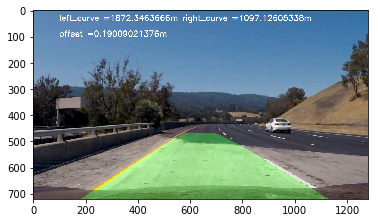

In [436]:
global_leftfit.clear()
global_rightfit.clear()
image = mpimg.imread("./frame6.jpg")
color_image = np.copy(image)
returned_image = process_image_2(color_image)
#process_image_1(color_image)
plt.imshow(returned_image)

In [430]:
print()